__Autor__: Carlos Alberto C. da Purificação (geofisico2007@gmail.com)

# Desafio para participar do Aceleradev Data Science da Codenation em abril de 2020

Neste notebook, vamos prever as notas de matemática dos estudantes que fizeram a prova do ENEM de 2016, em função de alguns atributos dados.

__Objetivo do desafio:__ Gerar um modelo a partir dos dados de treino e fazer a predição das notas de matemática (`NU_NOTA_MT`) no dado de teste, de modo que não temos a variável `NU_NOTA_MT` no dado de teste, para podermos inferir se nosso modelo ficou realmente bom em dados "não vistos". Após, enviar o resultado para a Codenation em um arquivo answer.csv com duas colunas: `NU_INSCRICAO` e `NU_NOTA_MT` (nota de matemática predita)! Eles detêm a da nota verdadeira e fazem a avaliaçao da nossa nota predita com a nota verdadeira, atribuindo-nos uma nota percental, que creio eu, varie de 0 à 100.

Neste desafio mostrarei manobras para a EDA, além da transformação das variáveis categóricas em numéricas (que dependerá de serem nominais ou ordinais) e quantitativas discretas. Após, serão aplicados dois algoritmos poderosíssimos:

- *Random Forest*
- *Extreme Gradient Boosting (XGboost)*
 - Esse algoritmo me proporcionou um score de 94% (dado pela Codenation), me colocando dentro do Aceleradev Data Science

## Requisitos

Você precisará de python 3.6 (ou superior) e do gerenciador de pacotes pip.

Para instalar os requisitos, execute o comando como no exemplo abaixo:

    
```bash
$ pip install -r requirements.txt
```

## Detalhes

O contexto do desafio gira em torno dos resultados do ENEM 2016 (disponíveis no arquivo train.csv). Qualquer dúvida a respeito das colunas, consulte o arquivo __Dicionario_Microdados_Enem_2016.xlsx__, no folder __datasets__.

In [1]:
#Importação das bibliotecas úteis na EDA (Exploratory Data Analysis)
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Setando ambiente para que todas as colunas do DataFrame sejam exibidas.
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("train.csv", index_col=0)

In [4]:
df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_MACA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,NO_ENTIDADE_CERTIFICACAO,CO_UF_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,4314902,Porto Alegre,43,RS,1,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,399.4,ABACCABDBEDEDEEDDDBBBDAABABECDCCCAAABCBEEABCA,BBEBCAEBCEDBDDEBCACDBCBDABDDCDBEDCEAEABCAADAC,99999DCABCABCBBCADBCBBABAEADBEEBEDAAABAEAECCBB...,AECCCBABDCADDBCBCCADADBBAADEBCEEBABCDDEAABCAA,1,BCADBCEDCCBADBDCADBEBDBEADCCAEACDBEDBCACAEBEE,BCBCCADCCBEDDBEEADBDCECCBBECAEEDDADCDDACAADBA,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,B,B,3,C,A,B,B,B,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2304707,Granja,23,CE,1,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,459.8,EDAAABDABADBCCAEDCDDECABADBEECBBAEEDCABCAABBC,ADCAABAADCEDAACDACEEDACBDCBACEDEDBACAADADABDC,99999ACBACDBDBCEADDAEEADCCEACEEDBECAAAACBECDAC...,AEDACBDECEDAEEAEDDEBDECDCECACADCACACAABDACEAB,1,EBEECADBCABECDDBEADCCABDEABEBCADBADDCCCEDBBCA,DCECBAAADCBBECAEDCEDDACCBDDACEDDBADBCADBCBCEE,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0

In [5]:
df.reset_index(drop=True, inplace=True)

In [6]:
n_row_treino = df.shape[0]
print(f'Número inicial de linhas nos dados de treino: {n_row_treino}')

Número inicial de linhas nos dados de treino: 13730


Abaixo, é possível ver que 60 variáveis estão classificadas como objeto; ou seja; categorias!

In [7]:
df.dtypes.value_counts()

int64      78
object     60
float64    28
dtype: int64

__Variáveis qualitativas__: São aquelas que se baseiam em qualidades e não podem ser mensuradas numericamente. Uma variável é qualitativa quando seus possíveis valores são categorias. 

* Escala ordinal: quando as variáveis podem ser colocadas em ordem, mas não é possível quantificar a diferença entre os resultados. Exemplo: classe social (A, B, C, D, ou E).
* Escala nominal: quando as variáveis  não podem ser hierarquizadas ou ordenadas, sendo comparadas apenas por igualdade ou diferença. Exemplos: cor dos olhos, local de nascimento ou de residência, género, carreira, religião.
* Escala intervalar: quando é possível quantificar as diferenças entre as medidas, mas não há um ponto zero absoluto. Exemplo: temperatura mínima e máxima.

__Variáveis quantitativas__: São aquelas que são numericamente mensuráveis, ou seja, seus possíveis valores são numéricos ou resultantes de contagem.

Variáveis quantitativas podem ser:

* Discretas: quando o conjunto de resultados possíveis é finito ou enumerável. Exemplo: número de filhos, alunos numa escola etc.
* Contínuas: quando os valores são expressos como intervalo ou união de números reais. Exemplo: peso, massa, altura, pressão sistólica, idade, nível de açúcar no sangue.


In [8]:
teste = pd.read_csv('test.csv')

In [9]:
teste.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0,D,H,H,C,B,A,NaN,A


In [10]:
teste.dtypes.value_counts()

int64      20
object     15
float64    12
dtype: int64

In [11]:
n_row_teste = teste.shape[0]
n_row_teste

4576

In [12]:
# Verificar se feature do dado de teste estão nos dados de treino
print(set(teste.columns).issubset(set(df.columns)))

True


In [13]:
for column in df.columns:
    print(f"{column}: valores únicos {df[column].nunique()}")
    print("===========================================")

NU_INSCRICAO: valores únicos 13730
NU_ANO: valores únicos 1
CO_MUNICIPIO_RESIDENCIA: valores únicos 2709
NO_MUNICIPIO_RESIDENCIA: valores únicos 2632
CO_UF_RESIDENCIA: valores únicos 27
SG_UF_RESIDENCIA: valores únicos 27
NU_IDADE: valores únicos 55
TP_SEXO: valores únicos 2
TP_ESTADO_CIVIL: valores únicos 4
TP_COR_RACA: valores únicos 6
TP_NACIONALIDADE: valores únicos 5
CO_MUNICIPIO_NASCIMENTO: valores únicos 2403
NO_MUNICIPIO_NASCIMENTO: valores únicos 2343
CO_UF_NASCIMENTO: valores únicos 27
SG_UF_NASCIMENTO: valores únicos 27
TP_ST_CONCLUSAO: valores únicos 4
TP_ANO_CONCLUIU: valores únicos 11
TP_ESCOLA: valores únicos 4
TP_ENSINO: valores únicos 3
IN_TREINEIRO: valores únicos 2
CO_ESCOLA: valores únicos 3333
CO_MUNICIPIO_ESC: valores únicos 1502
NO_MUNICIPIO_ESC: valores únicos 1475
CO_UF_ESC: valores únicos 27
SG_UF_ESC: valores únicos 27
TP_DEPENDENCIA_ADM_ESC: valores únicos 4
TP_LOCALIZACAO_ESC: valores únicos 2
TP_SIT_FUNC_ESC: valores únicos 2
IN_BAIXA_VISAO: valores únicos

Q010: valores únicos 5
Q011: valores únicos 5
Q012: valores únicos 5
Q013: valores únicos 5
Q014: valores únicos 5
Q015: valores únicos 5
Q016: valores únicos 5
Q017: valores únicos 5
Q018: valores únicos 2
Q019: valores únicos 5
Q020: valores únicos 2
Q021: valores únicos 2
Q022: valores únicos 5
Q023: valores únicos 2
Q024: valores únicos 5
Q025: valores únicos 2
Q026: valores únicos 3
Q027: valores únicos 13
Q028: valores únicos 5
Q029: valores únicos 6
Q030: valores únicos 6
Q031: valores únicos 6
Q032: valores únicos 6
Q033: valores únicos 6
Q034: valores únicos 6
Q035: valores únicos 6
Q036: valores únicos 6
Q037: valores únicos 6
Q038: valores únicos 6
Q039: valores únicos 6
Q040: valores únicos 6
Q041: valores únicos 6
Q042: valores únicos 8
Q043: valores únicos 4
Q044: valores únicos 3
Q045: valores únicos 4
Q046: valores únicos 4
Q047: valores únicos 5
Q048: valores únicos 4
Q049: valores únicos 3
Q050: valores únicos 4


É possível ver que algumas features possuem valores únicos. Tais features não acrescentam informação alguma em algoritmos de machine learning.

## Análise da presença no dado de treino

In [14]:
df.TP_PRESENCA_MT.value_counts()

1    10133
0     3592
2        5
Name: TP_PRESENCA_MT, dtype: int64

In [15]:
df.TP_PRESENCA_LC.value_counts()

1    10133
0     3592
2        5
Name: TP_PRESENCA_LC, dtype: int64

In [16]:
df.TP_PRESENCA_CH.value_counts()

1    10341
0     3380
2        9
Name: TP_PRESENCA_CH, dtype: int64

In [17]:
df.TP_PRESENCA_CN.value_counts()

1    10341
0     3380
2        9
Name: TP_PRESENCA_CN, dtype: int64

## Análise da presença no dado de teste

In [18]:
teste.TP_PRESENCA_LC.value_counts()

1    3377
0    1195
2       4
Name: TP_PRESENCA_LC, dtype: int64

In [19]:
teste.TP_PRESENCA_CH.value_counts()

1    3442
0    1134
Name: TP_PRESENCA_CH, dtype: int64

In [20]:
teste.TP_PRESENCA_CN.value_counts()

1    3442
0    1134
Name: TP_PRESENCA_CN, dtype: int64

Nos dados de teste não há **TP_PRESENCA_MT**. No dado de treino, sim. Quem estava presente na prova de LC, também estava presente para matemática, pois foram no mesmo dia, como pode ser visto acima. Os valore de presença são 0, 1 e 2, onde:
0. Faltou à prova
1. Presente na prova
2. Eliminado na prova

Podemos, assim, considerar apenas dados de **TP_PRESENCA_LC** com valor 1, no dado de teste.

In [21]:
teste = teste[(teste.TP_PRESENCA_LC == 1)]

In [22]:
df = df[df.TP_PRESENCA_MT == 1]

In [23]:
#usar apenas features do treino que existem no teste
nota_mat = df.NU_NOTA_MT.values
df = df[teste.columns]

In [24]:
df.loc[:,'NU_NOTA_MT'] = nota_mat

In [25]:
print('NU_INSCRICAO é única') if df.shape[0] == df.NU_INSCRICAO.nunique() else print( 'oops')

NU_INSCRICAO é única


In [26]:
print('Os dados de treino são compostos de {} linhas e {} características'.format(df.shape[0], df.shape[1]))

Os dados de treino são compostos de 10133 linhas e 48 características


In [27]:
null = []
for col in df.columns:
    if df[col].isnull().sum() != 0:
        null.append(col)
        
null2 = []
for col in teste.columns:
    if teste[col].isnull().sum() != 0:
        null2.append(col)

In [28]:
print('Há {} features com dados faltantes no treino e {} no teste.'.format(len(null), len(null2)))

Há 5 features com dados faltantes no treino e 5 no teste.


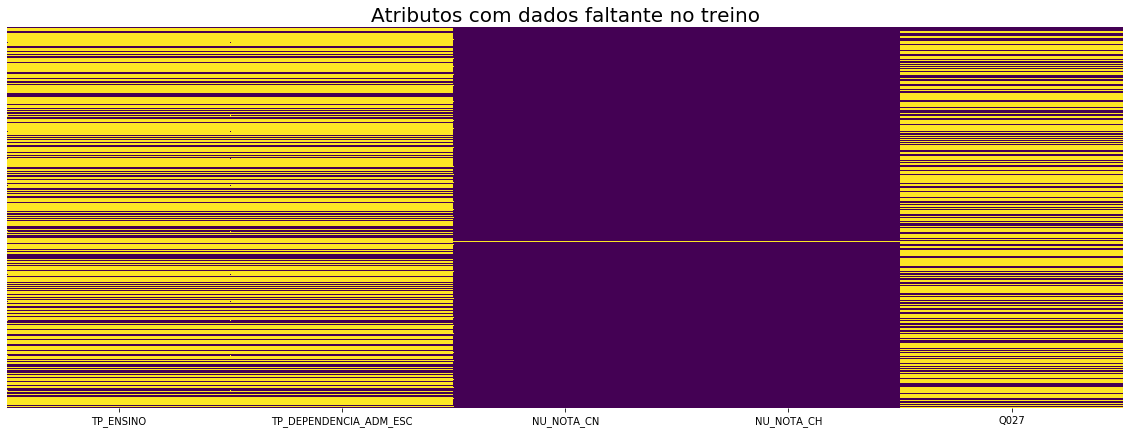

In [29]:
#heatmap das features com dados faltantes

f, ax = plt.subplots(figsize = (20,7))

sns.heatmap(df[null].isnull(), annot=False, yticklabels=False, cmap='viridis', ax = ax, cbar=False)

ax.set_title( 'Atributos com dados faltante no treino', fontsize = 20)

plt.show()

In [30]:
#Análise percentual e quantitativa dos dados de treino faltantes.
aux = pd.DataFrame({'feature': df.columns.values,
                    'tipo': df.dtypes.values,
                    'Nans_absoluto': df.isnull().sum().values,
                    'Nans_percentual': df.isnull().sum().values*100 / df.shape[0]})

In [31]:
aux.sort_values(by='Nans_percentual', ascending=False).head()

,feature,tipo,Nans_absoluto,Nans_percentual
12,TP_DEPENDENCIA_ADM_ESC,float64,6494,64.087634
10,TP_ENSINO,float64,6494,64.087634
45,Q027,object,6126,60.455936
28,NU_NOTA_CN,float64,36,0.355275
29,NU_NOTA_CH,float64,36,0.355275


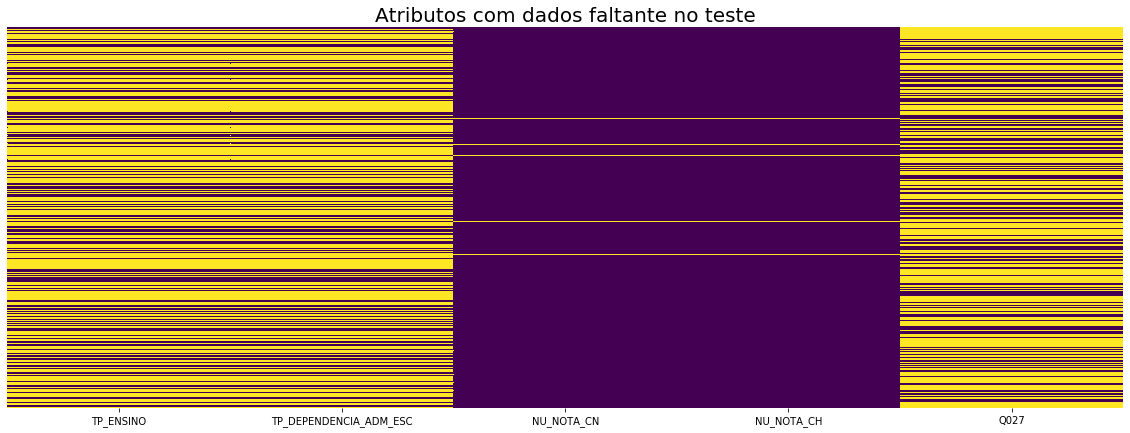

In [32]:
#heatmap das features com dados faltantes

f, ax = plt.subplots(figsize = (20,7))

sns.heatmap(teste[null2].isnull(), annot=False, yticklabels=False, cmap='viridis', ax = ax, cbar=False)

ax.set_title( 'Atributos com dados faltante no teste', fontsize = 20)

plt.show()

In [33]:
#Análise percentual e quantitativa dos dados de treino faltantes.
aux2 = pd.DataFrame({'feature': teste.columns.values,
                    'tipo': teste.dtypes.values,
                    'Nans_absoluto': teste.isnull().sum().values,
                    'Nans_percentual': teste.isnull().sum().values*100 / teste.shape[0]})

In [34]:
aux2.sort_values(by='Nans_percentual', ascending=False).head()

,feature,tipo,Nans_absoluto,Nans_percentual
12,TP_DEPENDENCIA_ADM_ESC,float64,2126,62.955286
10,TP_ENSINO,float64,2126,62.955286
45,Q027,object,2062,61.060113
28,NU_NOTA_CN,float64,17,0.503405
29,NU_NOTA_CH,float64,17,0.503405


Eliminaremos esses 3 features com mais de 60 % de dados faltantes, tanto no treino quanto no teste.

In [35]:
aux[aux.Nans_percentual > 60].feature.values

array(['TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC', 'Q027'], dtype=object)

In [36]:
df.drop(aux[aux.Nans_percentual > 60].feature.values, axis=1, inplace=True)
teste.drop(aux[aux.Nans_percentual > 60].feature.values, axis=1, inplace=True)

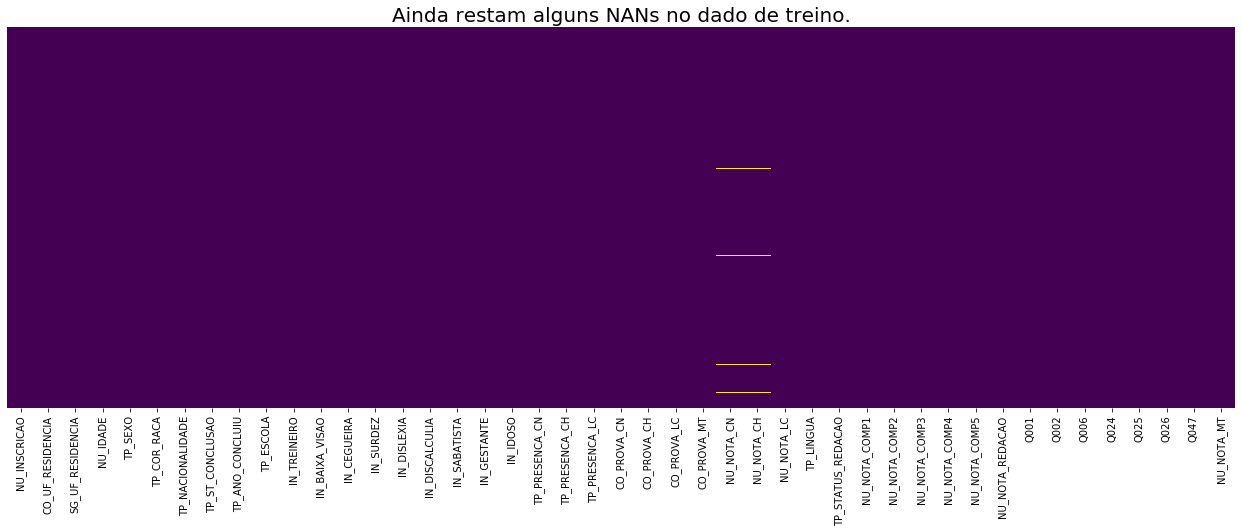

In [37]:
f, ax = plt.subplots(figsize = (22,7))

sns.heatmap(df.isnull(), annot=False, yticklabels=False, cmap='viridis', ax = ax, cbar=False, )
ax.set_title('Ainda restam alguns NANs no dado de treino.', fontsize = 20)
plt.setp(ax.get_xticklabels(), fontsize=10, fontweight="normal", horizontalalignment="center")
plt.show()

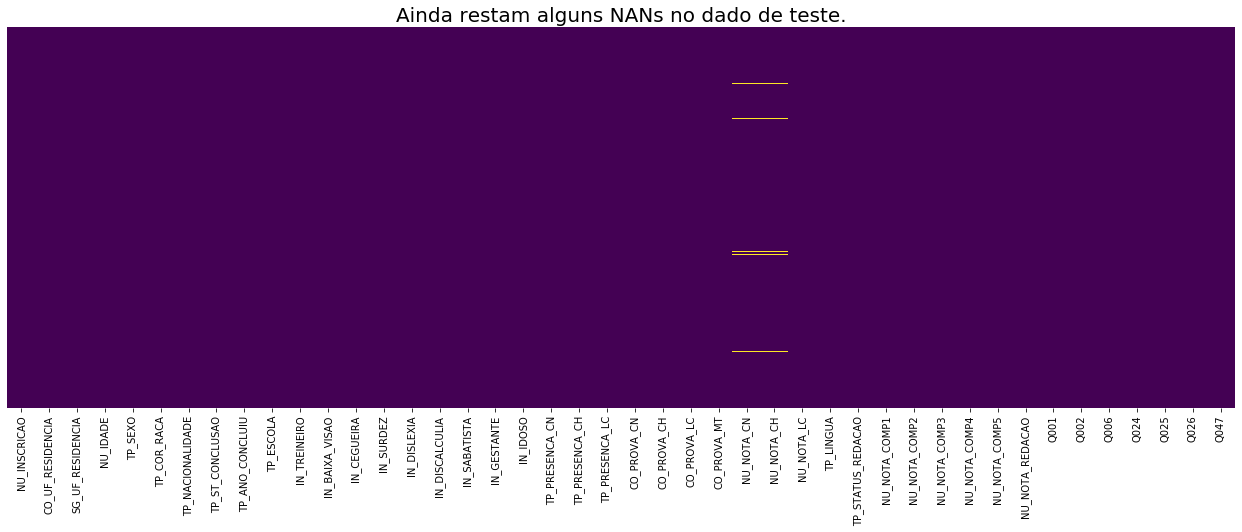

In [38]:
f, ax = plt.subplots(figsize = (22,7))

sns.heatmap(teste.isnull(), annot=False, yticklabels=False, cmap='viridis', ax = ax, cbar=False, )
ax.set_title('Ainda restam alguns NANs no dado de teste.', fontsize = 20)
plt.setp(ax.get_xticklabels(), fontsize=10, fontweight="normal", horizontalalignment="center")
plt.show()

# Substituindo NaNs pela média, tanto no treino, quanto no teste, para as notas de Ciências humanas e Ciências naturais

In [39]:
df['NU_NOTA_CN'].fillna(df['NU_NOTA_CN'].mean(), inplace=True)
df['NU_NOTA_CH'].fillna(df['NU_NOTA_CH'].mean(), inplace=True)

teste['NU_NOTA_CN'].fillna(teste['NU_NOTA_CN'].mean(), inplace=True)
teste['NU_NOTA_CH'].fillna(teste['NU_NOTA_CH'].mean(), inplace=True)

In [40]:
print('A quantidade de linhas reduziu {} %, em relação à quantidade de linhas inicial, no dado de treino.'.format(
    round((1 - df.shape[0]/n_row_treino), 2)*100))

A quantidade de linhas reduziu 26.0 %, em relação à quantidade de linhas inicial, no dado de treino.


In [41]:
print('A quantidade de linhas reduziu {} %, em relação à quantidade de linhas inicial, no dado deteste.'.format(
    round((1 - teste.shape[0]/n_row_teste), 2)*100))

A quantidade de linhas reduziu 26.0 %, em relação à quantidade de linhas inicial, no dado deteste.


In [42]:
print(f"{df.NU_NOTA_MT.isin([0]).sum()} candidatos tiraram zero em matemática.")

10 candidatos tiraram zero em matemática.


In [43]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10133 entries, 0 to 13729
Columns: 45 entries, NU_INSCRICAO to NU_NOTA_MT
dtypes: float64(11), int64(20), object(14)
memory usage: 3.6+ MB


In [44]:
#apenas features numéricas para a matriz de correlação
numericas = df.select_dtypes(exclude=['object'])

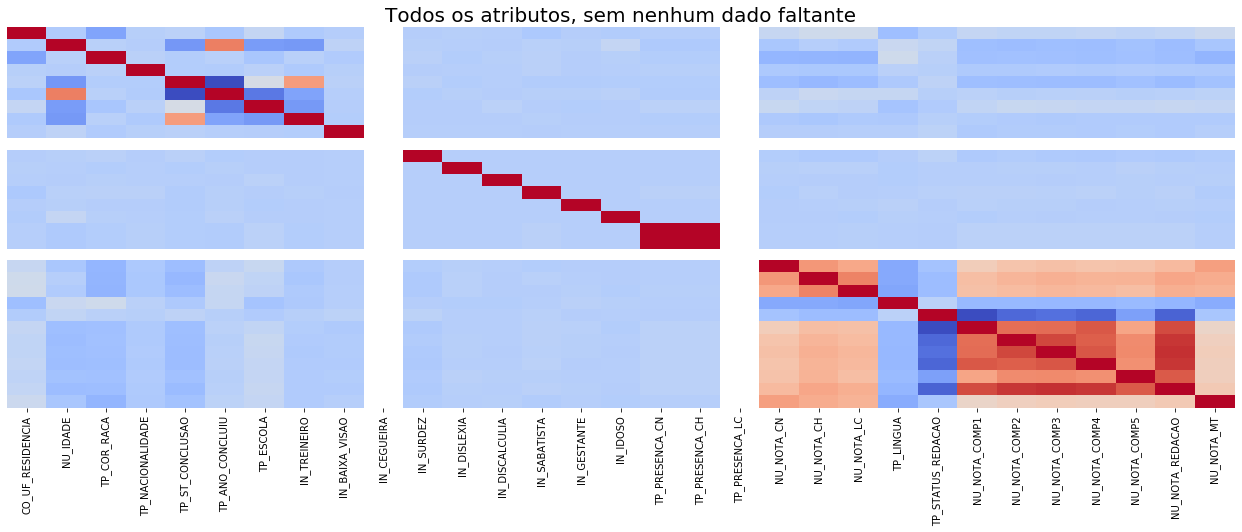

In [45]:
f, ax = plt.subplots(figsize = (22,7))

sns.heatmap(numericas.corr(), annot=False, yticklabels=False, cmap='coolwarm', ax = ax, cbar=False, )
ax.set_title('Todos os atributos, sem nenhum dado faltante', fontsize = 20)
plt.setp(ax.get_xticklabels(), fontsize=10, fontweight="normal", horizontalalignment="center")
plt.show()
#Os valores em branco são de features com apenas um único valor e serão removidos

In [46]:
# Retorna lista com features que possuem apenas um único valor
unicos = [a for a in df.columns if df[a].nunique() == 1]
unicos

['IN_CEGUEIRA', 'TP_PRESENCA_LC']

In [47]:
df.IN_IDOSO.value_counts()

0    10132
1        1
Name: IN_IDOSO, dtype: int64

In [48]:
unicos2 = [a for a in teste.columns if teste[a].nunique() == 1]
unicos2

['IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_IDOSO',
 'TP_PRESENCA_LC']

In [49]:
teste.IN_IDOSO.value_counts()

0    3377
Name: IN_IDOSO, dtype: int64

In [50]:
# Unindo as duas listas para remoção dessas features em ambos os bancos de dados (treino e teste)
remover = list(set(unicos).union(set(unicos2)))
remover

['IN_SURDEZ',
 'IN_IDOSO',
 'IN_CEGUEIRA',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'TP_PRESENCA_LC']

Vamos aproveitar e eliminar também TP_PRESENCA_CN e TP_PRESENCA_CH:

In [51]:
remover.append('TP_PRESENCA_CN')
remover.append('TP_PRESENCA_CH')

In [52]:
remover

['IN_SURDEZ',
 'IN_IDOSO',
 'IN_CEGUEIRA',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'TP_PRESENCA_LC',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_CH']

In [53]:
df.drop(remover, axis=1, inplace=True)
teste.drop(remover, axis=1, inplace=True)

In [54]:
print("Ficamos com {} atributos e {} observações no treino e {} atributos e {} observações no teste!".format(\
df.shape[1], df.shape[0], teste.shape[1], teste.shape[0]))


Ficamos com 37 atributos e 10133 observações no treino e 36 atributos e 3377 observações no teste!


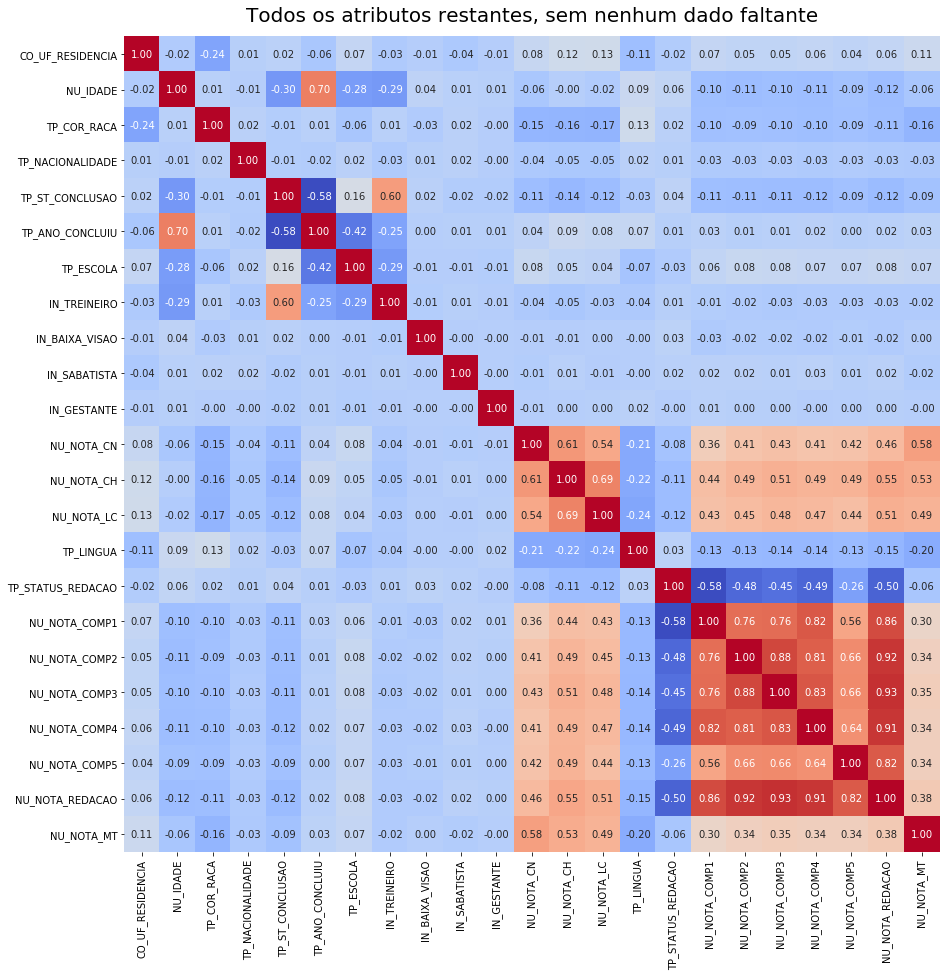

In [55]:
f, ax = plt.subplots(figsize = (15,15))

sns.heatmap(df.corr(), fmt = '0.2f', annot=True, yticklabels=True, cmap='coolwarm', ax = ax, cbar=False, square=True)
ax.set_title('Todos os atributos restantes, sem nenhum dado faltante', fontsize = 20, pad = 15)
plt.setp(ax.get_xticklabels(), fontsize=10, fontweight="normal", horizontalalignment="center")
plt.savefig('imagens/todos.png');

In [56]:
#Tornando variáveis que não são numéricas em categóricas
df.loc[:, df.select_dtypes(exclude=[np.number]).columns] = df.select_dtypes(exclude=[np.number]).astype('category')

In [57]:
teste.loc[:, teste.select_dtypes(exclude=[np.number]).columns] = teste.select_dtypes(exclude=[np.number]).astype('category')

In [58]:
df.TP_SEXO.value_counts()

F    6261
M    3872
Name: TP_SEXO, dtype: int64

In [59]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10133 entries, 0 to 13729
Columns: 37 entries, NU_INSCRICAO to NU_NOTA_MT
dtypes: category(14), float64(11), int64(12)
memory usage: 2.4 MB


In [60]:
teste.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3377 entries, 0 to 4574
Columns: 36 entries, NU_INSCRICAO to Q047
dtypes: category(14), float64(10), int64(12)
memory usage: 847.8 KB


In [61]:
#Exibindo maiores e menores notas das 5 competências, por Estado
por_estado = df.groupby('SG_UF_RESIDENCIA').agg({'NU_NOTA_MT': ['min', 'max'],
                                              'NU_NOTA_CN': ['min', 'max'],
                                                'NU_NOTA_CH': ['min', 'max'],
                                                'NU_NOTA_LC': ['min', 'max'],
                                                'NU_NOTA_REDACAO': ['min', 'max']}).round(2)
por_estado.head(7)

NU_NOTA_MT        NU_NOTA_CN        NU_NOTA_CH         \
                        min    max        min    max        min    max   
SG_UF_RESIDENCIA                                                         
AC                    343.0  651.1      367.0  610.0      358.4  629.1   
AL                    331.3  713.3      368.3  706.3      346.3  759.2   
AM                    334.4  685.1      362.9  712.4      324.4  704.9   
AP                    336.8  688.6      383.1  617.7      339.6  649.4   
BA                    339.8  867.1      354.0  715.1      337.8  744.8   
CE                    334.3  865.5        0.0  760.2      326.7  772.4   
DF                    329.0  896.3      369.3  714.9      344.7  738.6   

                 NU_NOTA_LC        NU_NOTA_REDACAO         
                        min    max             min    max  
SG_UF_RESIDENCIA                                           
AC                    344.4  604.3           180.0  740.0  
AL                    347.2  670.6             0.0  880.0  
AM                    348.4  640.8             0.0  920.0  
AP                    382.3  616.3             0.0  800.0  
BA                    316.1  711.6             0.0  960.0  
CE                    346.0  675.5             0.0  960.0  
DF                    374.4  763.6             0.0  920.0

In [62]:
por_estado.NU_NOTA_MT.std()

min    142.664817
max     93.877569
dtype: float64

É possível ver que as notas mínimas de matemática, por UF, é relativamente homogênea, ao passo que a nota máxima, por estado, varia bastante. No entanto, em alguns estados, a nota mínima em matemática foi zero ou não há informação. Por isso, o desvio padrão para as notas mínimas foi maior que para as notas máximas por estado.

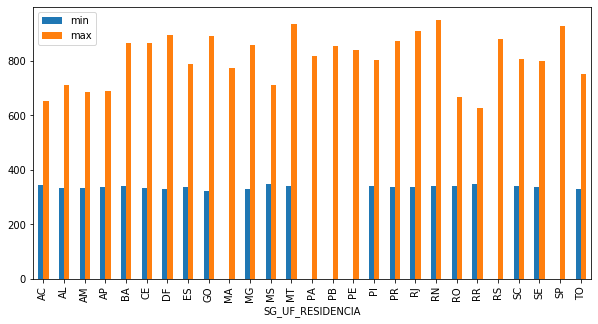

In [63]:
por_estado.NU_NOTA_MT.plot(kind='bar', figsize = (10,5))
plt.savefig('imagens/nota_mat_porUF.png');

Se eliminarmos os estados que tiveram nota mínima zero ou onde não há essa informação, teremos um desvio padrão muito maior para as notas máximas:

In [64]:
por_estado.NU_NOTA_MT.where(cond=por_estado.NU_NOTA_MT > 0, other=np.nan).std()

min     6.546231
max    93.877569
dtype: float64

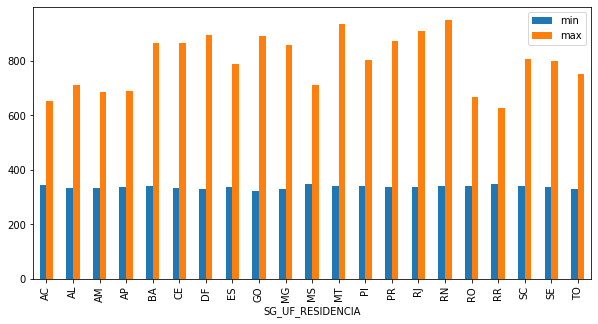

In [65]:
por_estado.NU_NOTA_MT.where(cond=por_estado.NU_NOTA_MT > 0, other=np.nan).dropna().plot(kind='bar', figsize = (10,5));

# Remoção de features não relevantes

In [66]:
co_fe = []
for c in df.columns:
    if 'CO_PROVA' in c:
        co_fe.append(c)
df.drop(co_fe, axis=1, inplace=True)
teste.drop(co_fe, axis=1, inplace=True)

In [67]:
#NU_INSCRICAO não será eliminada de teste, pois será útil no envio do aquivo
df.drop(['NU_INSCRICAO', 'IN_GESTANTE', 'TP_ST_CONCLUSAO'], axis=1, inplace=True)
teste.drop(['IN_GESTANTE', 'TP_ST_CONCLUSAO'], axis=1, inplace=True)

In [68]:
for a in df.columns:
    print(df[a].head(2), '\n')

0    43
1    23
Name: CO_UF_RESIDENCIA, dtype: int64 

0    RS
1    CE
Name: SG_UF_RESIDENCIA, dtype: category
Categories (27, object): [AC, AL, AM, AP, ..., SC, SE, SP, TO] 

0    24
1    17
Name: NU_IDADE, dtype: int64 

0    M
1    F
Name: TP_SEXO, dtype: category
Categories (2, object): [F, M] 

0    1
1    3
Name: TP_COR_RACA, dtype: int64 

0    1
1    1
Name: TP_NACIONALIDADE, dtype: int64 

0    4
1    0
Name: TP_ANO_CONCLUIU, dtype: int64 

0    1
1    2
Name: TP_ESCOLA, dtype: int64 

0    0
1    0
Name: IN_TREINEIRO, dtype: int64 

0    0
1    0
Name: IN_BAIXA_VISAO, dtype: int64 

0    0
1    0
Name: IN_SABATISTA, dtype: int64 

0    436.3
1    474.5
Name: NU_NOTA_CN, dtype: float64 

0    495.4
1    544.1
Name: NU_NOTA_CH, dtype: float64 

0    581.2
1    599.0
Name: NU_NOTA_LC, dtype: float64 

0    1
1    1
Name: TP_LINGUA, dtype: int64 

0    1.0
1    1.0
Name: TP_STATUS_REDACAO, dtype: float64 

0    120.0
1    140.0
Name: NU_NOTA_COMP1, dtype: float64 

0    120.0
1  

# Features binários

In [69]:
#features binários
binarios = [a for a in df.columns if df[a].nunique() == 2]
binarios2 = [a for a in teste.columns if teste[a].nunique() == 2]

In [70]:
for a in binarios:
    print(a, 8*'-', df[a].unique()) 

TP_SEXO -------- [M, F]
Categories (2, object): [M, F]
IN_TREINEIRO -------- [0 1]
IN_BAIXA_VISAO -------- [0 1]
IN_SABATISTA -------- [0 1]
TP_LINGUA -------- [1 0]
Q025 -------- [A, B]
Categories (2, object): [A, B]


In [71]:
for a in binarios2:
    print(a, 8*'-', teste[a].unique()) 

TP_SEXO -------- [F, M]
Categories (2, object): [F, M]
IN_TREINEIRO -------- [0 1]
IN_BAIXA_VISAO -------- [0 1]
IN_SABATISTA -------- [0 1]
TP_LINGUA -------- [0 1]
Q025 -------- [A, B]
Categories (2, object): [A, B]


Há 2 features binários que não são numéricos nos dados de treino e teste: Q025 e TP_SEXO

In [72]:
sb = df.drop(binarios, axis=1) #sb: sem binários
sb.head()

,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ANO_CONCLUIU,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q026,Q047,NU_NOTA_MT
0,43,RS,24,1,1,4,1,436.3,495.4,581.2,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,C,A,C,A,399.4
1,23,CE,17,3,1,0,2,474.5,544.1,599.0,1.0,140.0,120.0,120.0,120.0,80.0,580.0,A,A,B,A,A,A,459.8
5,29,BA,18,1,1,1,1,439.7,583.2,410.9,1.0,120.0,120.0,120.0,160.0,100.0,620.0,E,E,C,B,A,A,364.5
6,51,MT,18,3,1,0,2,420.1,604.2,484.5,1.0,100.0,120.0,120.0,120.0,100.0,560.0,E,D,C,B,C,A,529.2
7,43,RS,18,1,1,1,1,619.6,625.8,611.2,1.0,140.0,120.0,120.0,120.0,120.0,620.0,G,F,L,B,A,D,566.7


## A partir da Matriz de Correlação abaixo, é possível ver que as três variáveis com maior correlação com a nota de matemática são, por ordem decrescente, as notas de ciências naturais, ciências humanas e linguagens e códigos.

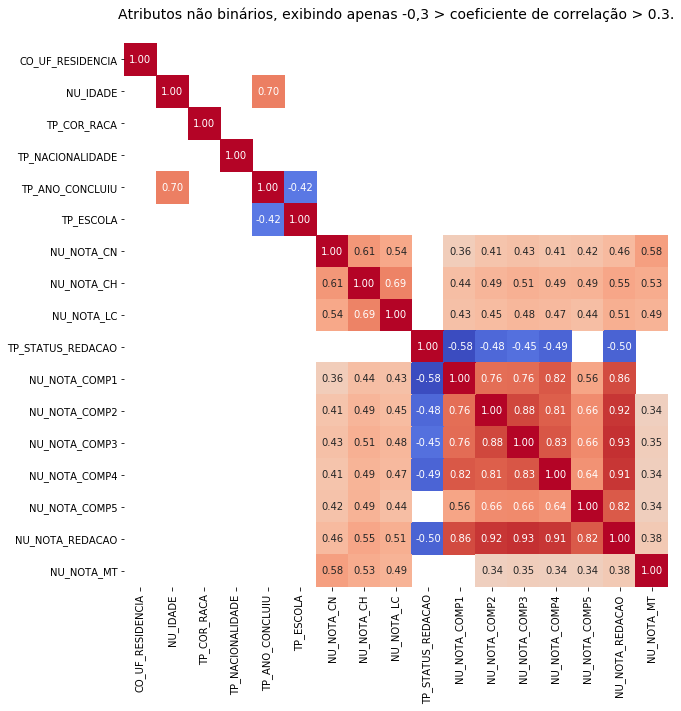

In [73]:
f, ax = plt.subplots(figsize = (10,10))

sns.heatmap(sb.corr().where(((sb.corr().values >.3) | (sb.corr().values < -.3))), fmt='.2f',
            annot=True, yticklabels=True, cmap='coolwarm', ax = ax, cbar=False, square=True)
ax.set_title('Atributos não binários, exibindo apenas -0,3 > coeficiente de correlação > 0.3.', fontsize = 14, pad = 25)
plt.setp(ax.get_xticklabels(), fontsize=10, fontweight= None, horizontalalignment="center")
plt.savefig('imagens/corr_0.3.png');

É possível observar que a feature com maior correlação com a nota de matemática é NU_NOTA_CN, o que é esperado,
uma vez que é bastante usual ver estudantes que possuem boa aptidão em matemática, também tê-la nas ciências naturais. 

# Análise das distribuições

In [74]:
sb.head(2)

,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ANO_CONCLUIU,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q026,Q047,NU_NOTA_MT
0,43,RS,24,1,1,4,1,436.3,495.4,581.2,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,C,A,C,A,399.4
1,23,CE,17,3,1,0,2,474.5,544.1,599.0,1.0,140.0,120.0,120.0,120.0,80.0,580.0,A,A,B,A,A,A,459.8


Aqui, analisamos as distribuições com base no sexo e se tem (B) ou não (A) internet na residência do candidato

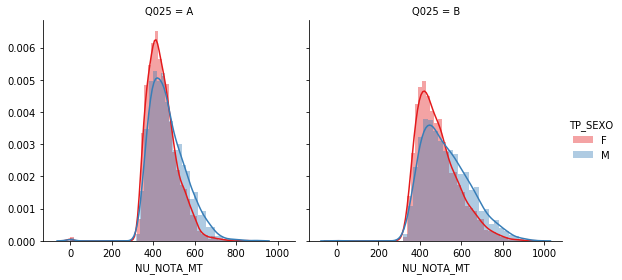

In [75]:
g = sns.FacetGrid(df, col='Q025', hue="TP_SEXO", palette="Set1", height=4)
g = (g.map(sns.distplot, "NU_NOTA_MT", hist=True, rug=False))
g.add_legend()
plt.savefig('imagens/Notamat_dist_gender.png');

Podería-se aplicar um teste paramétrico para verificar se há diferença significativa entre as médias dos estudantes homens e mulheres. No entanto, não focaremos nesses testes de hipóteses, pois o intuito deste trabalho é predizer as notas de matemática.

In [76]:
df[(df.TP_SEXO == 'F')].NU_NOTA_MT.nlargest(10)

3682     935.1
1699     908.8
1034     881.9
3637     877.4
3226     868.2
12177    867.1
10773    862.5
3655     851.0
855      849.3
5939     848.3
Name: NU_NOTA_MT, dtype: float64

In [77]:
df[(df.TP_SEXO == 'M')].NU_NOTA_MT.nlargest(10)

5913     952.0
2858     928.5
10801    916.6
5718     909.5
8445     897.0
7298     896.3
4564     895.5
2548     895.4
13191    893.6
12652    878.3
Name: NU_NOTA_MT, dtype: float64

In [78]:
df[(df.TP_SEXO == 'F')].NU_NOTA_MT.nsmallest(10)

111        0.0
429        0.0
3442       0.0
4927       0.0
7352       0.0
7596       0.0
11945    325.8
1158     326.7
10190    328.0
5335     328.9
Name: NU_NOTA_MT, dtype: float64

In [79]:
df[(df.TP_SEXO == 'M')].NU_NOTA_MT.nsmallest(10)

3783       0.0
8397       0.0
11645      0.0
13600      0.0
6162     320.5
6768     327.6
6286     331.3
2835     334.4
13018    334.6
2325     335.4
Name: NU_NOTA_MT, dtype: float64

É possível ver que há uma diferença grande nas notas das pessoas que possuem internet (A) e as pessoas que não possuem (B). As pessoas com acesso à internet possuem maior homogeneidade no espalhamento da gaussiana, de modo que Há uma maior quantidade de notas proxima da média do grupo, ao passo que pessoas sem acesso à internet, a gaussiana é mais dispersa em torno da média. A gaussiana representando a distribuição das notas das mulheres é mais alta, pq o número de candidatas é quase o dobro do número de candidados. A despeito disto, é possível observar que as 10 maiores notas dos homens são maiores do que as 10 maiores notas das mulheres, além de as 10 menores notas das mulheres também serem menores.

                                            Analisando nacionalidade

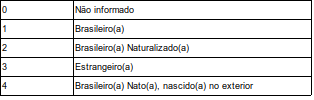

In [80]:
df.TP_NACIONALIDADE.value_counts()

1    9723
2     363
4      31
0      10
3       6
Name: TP_NACIONALIDADE, dtype: int64

In [81]:
df[(df.TP_NACIONALIDADE == 3)].NU_NOTA_MT

1654     377.4
2127     475.7
5537     391.2
6581     840.8
8044     650.4
10487    778.8
Name: NU_NOTA_MT, dtype: float64

Interessante observar que dos poucos estrangeiros (6), no Brasil, 3 tiraram notas acima de 700!

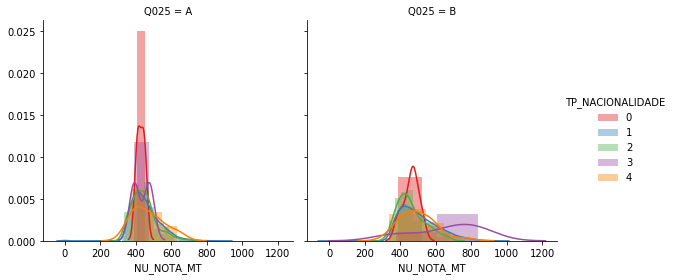

In [82]:
g = sns.FacetGrid(df, col='Q025', hue="TP_NACIONALIDADE", palette="Set1", height=4)
g = (g.map(sns.distplot, "NU_NOTA_MT", hist=True, rug=False))
g.add_legend()
plt.savefig('imagens/Notamat_dist_nacionali.png');

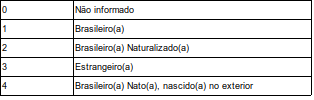

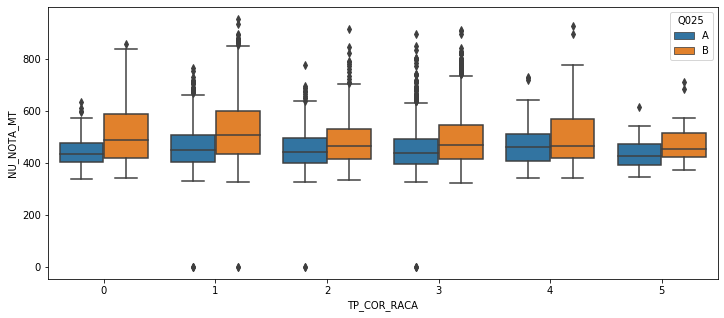

In [83]:
fig, ax  = plt.subplots(figsize = (12, 5))
sns.boxplot(data=df, x='TP_COR_RACA', y ='NU_NOTA_MT',
            hue='Q025', ax=ax);

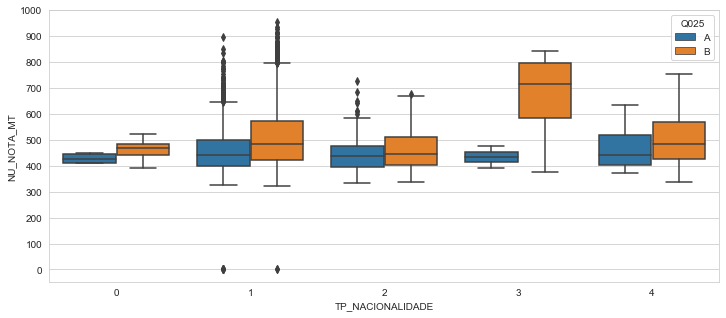

In [84]:
sns.set_style('whitegrid')
fig, ax  = plt.subplots(figsize = (12, 5))
sns.boxplot(data=df, x='TP_NACIONALIDADE', y ='NU_NOTA_MT',
            hue='Q025', ax=ax)
ax.set_yticks(np.arange(0,1001,100));

In [85]:
categoricos = df.select_dtypes(exclude= ['float64']).columns

In [86]:
categoricos

Index(['CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO',
       'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ANO_CONCLUIU', 'TP_ESCOLA',
       'IN_TREINEIRO', 'IN_BAIXA_VISAO', 'IN_SABATISTA', 'TP_LINGUA', 'Q001',
       'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q047'],
      dtype='object')

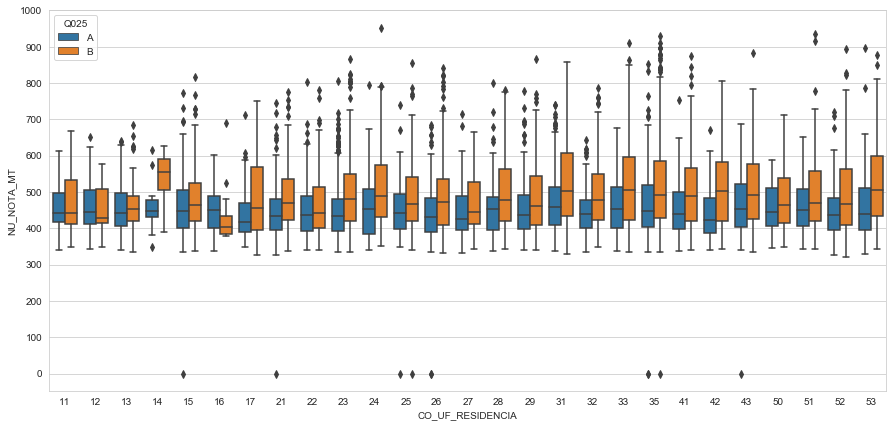

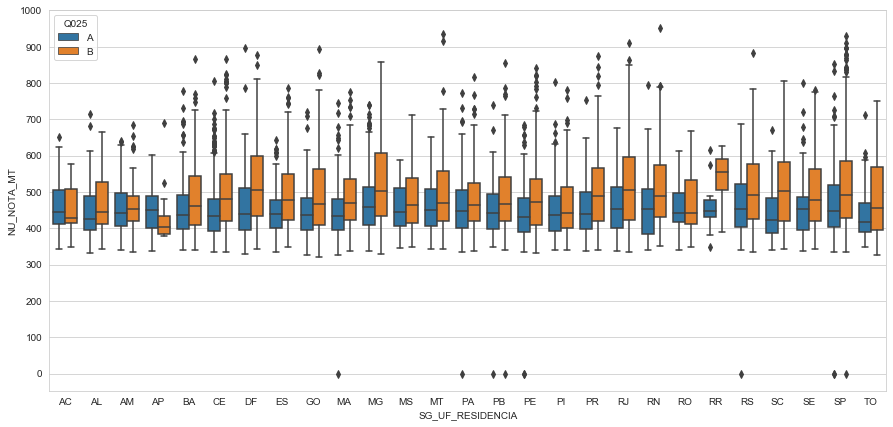

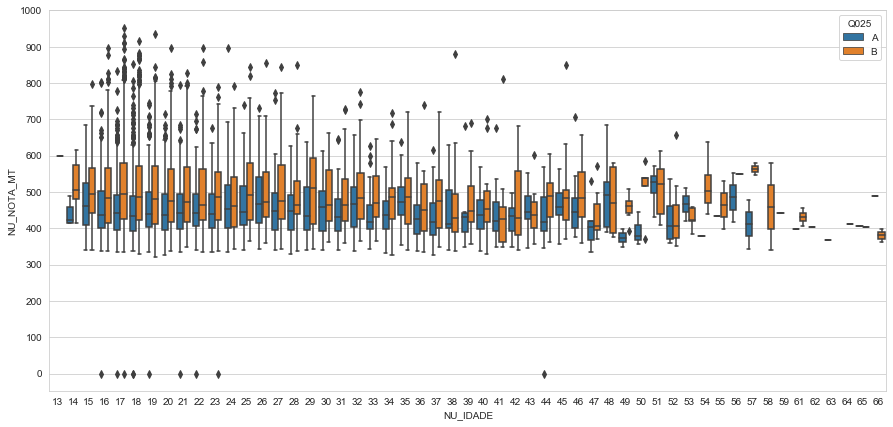

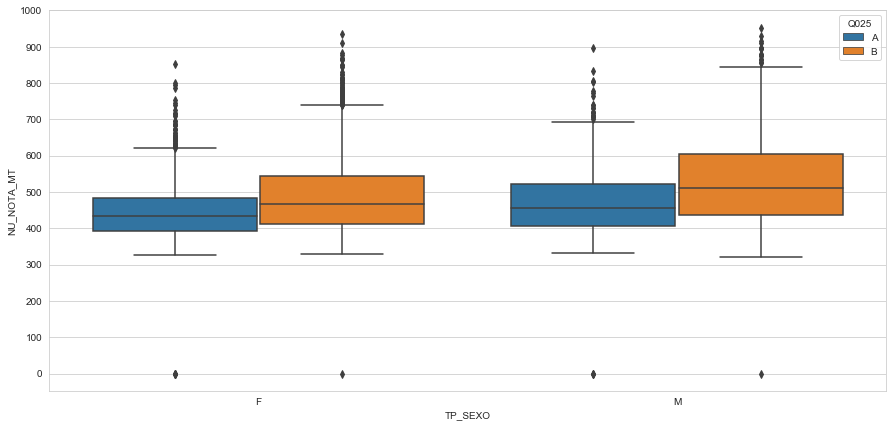

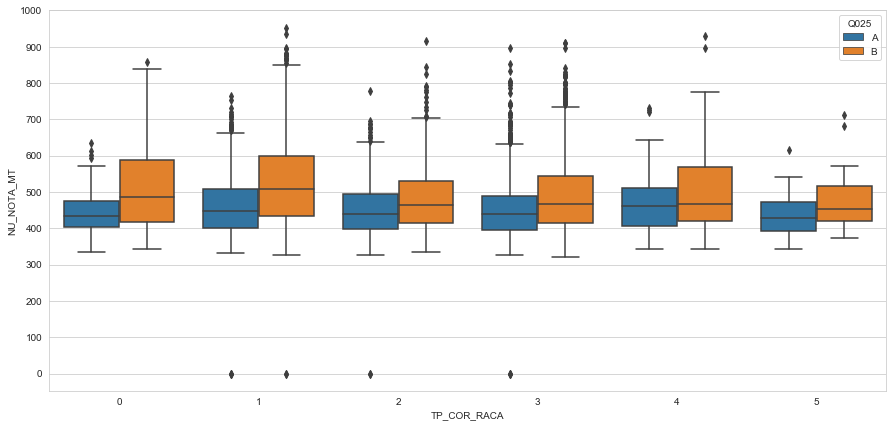

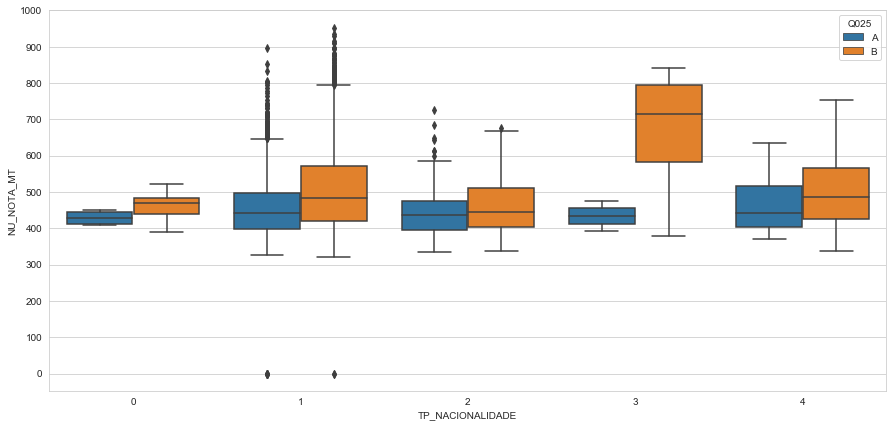

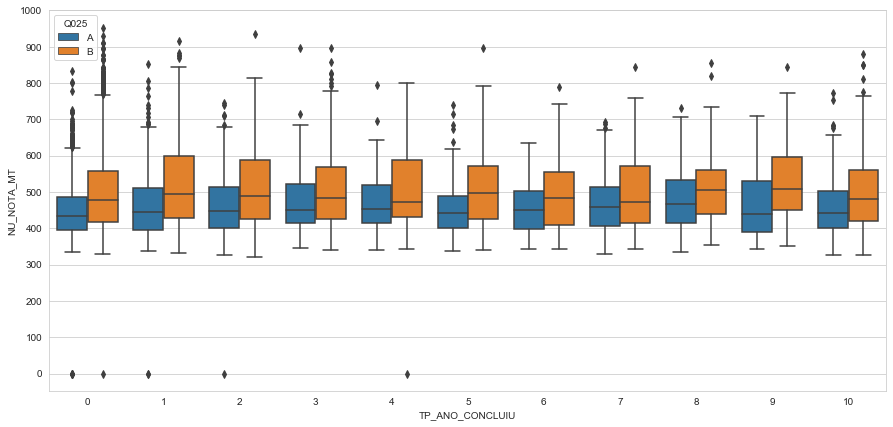

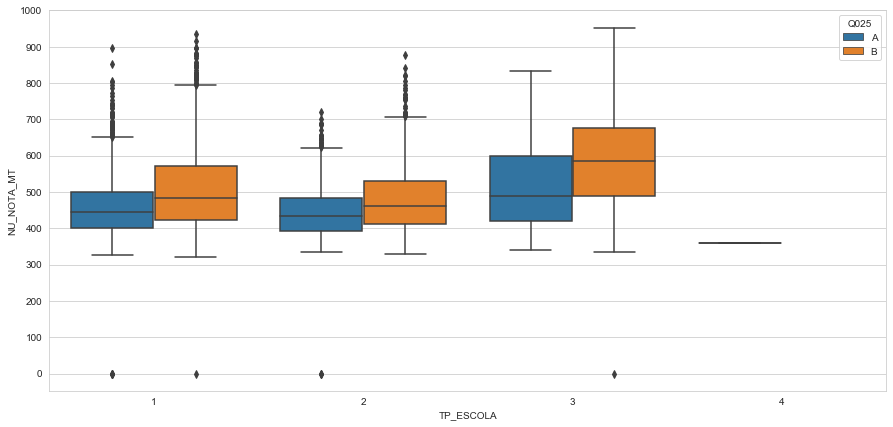

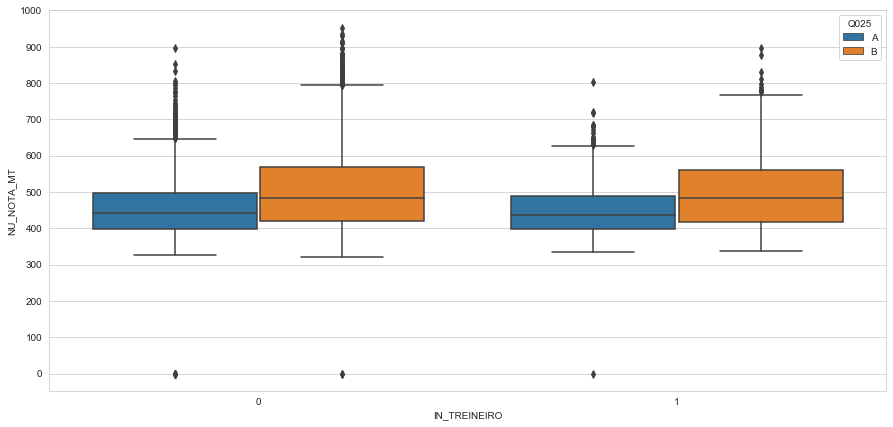

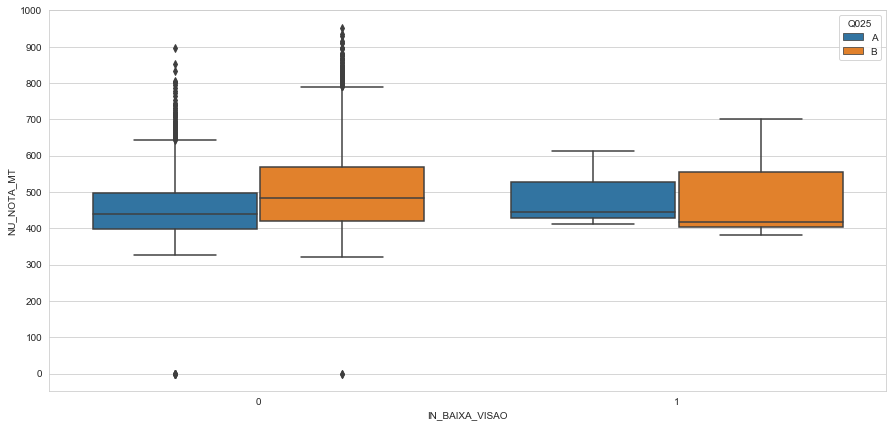

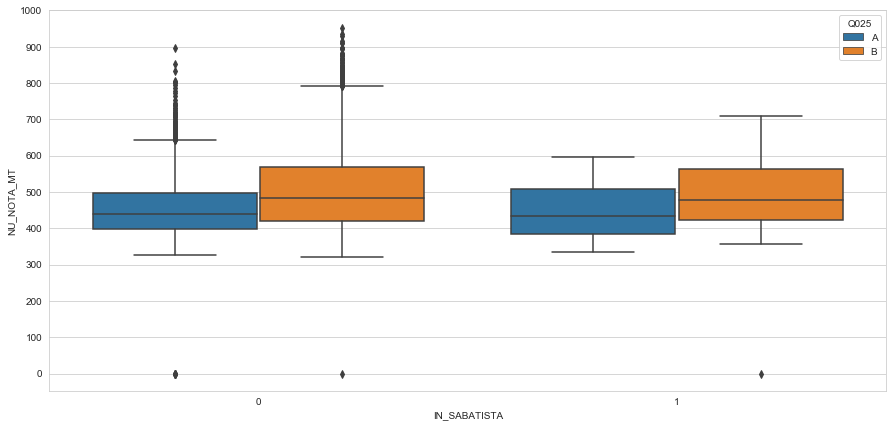

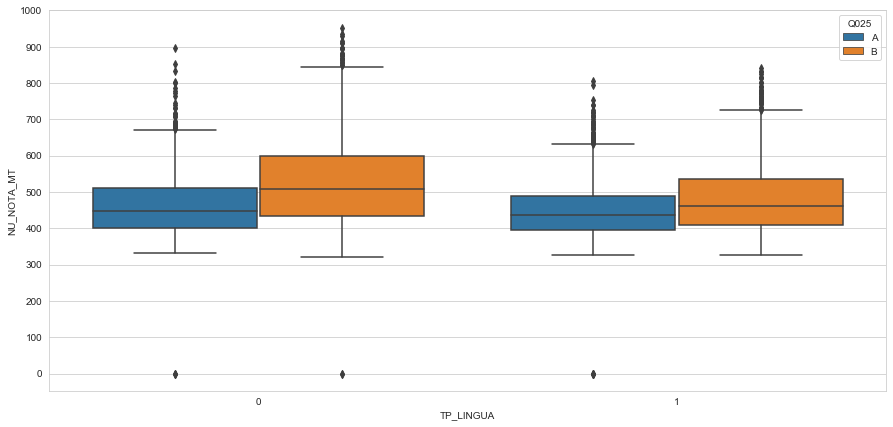

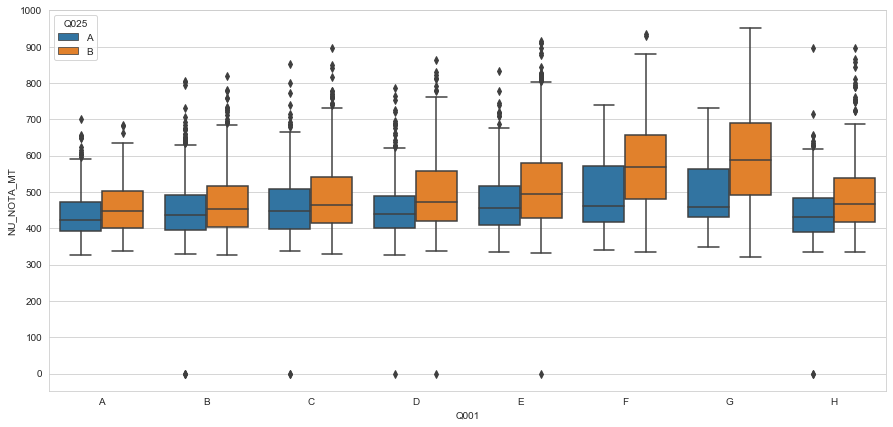

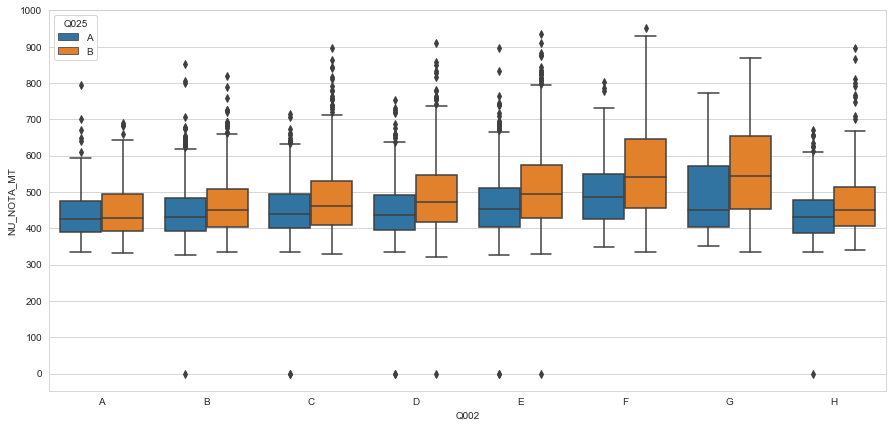

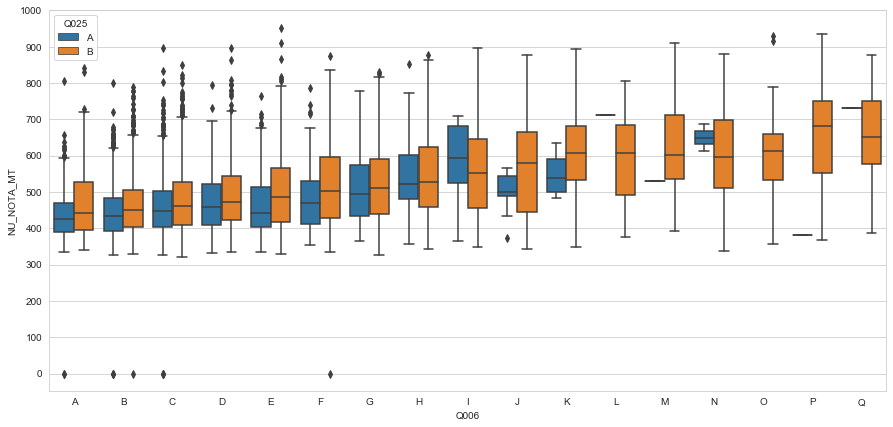

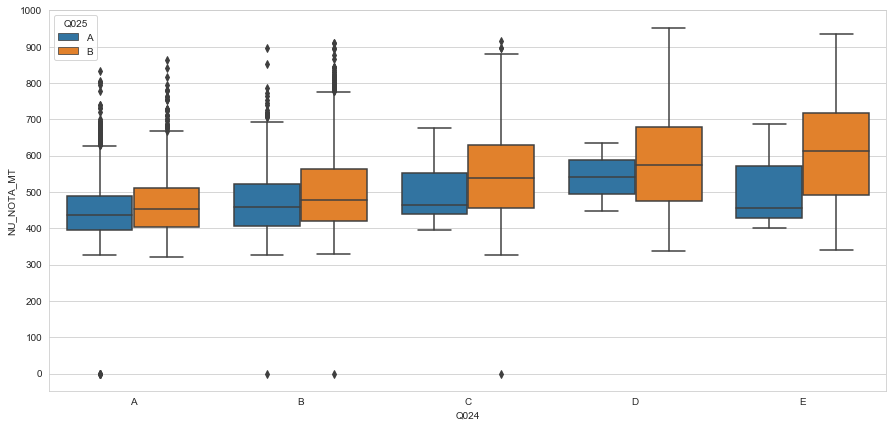

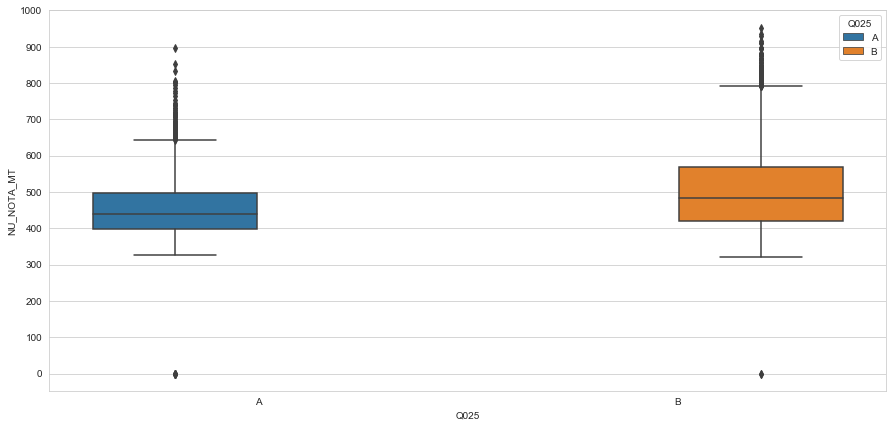

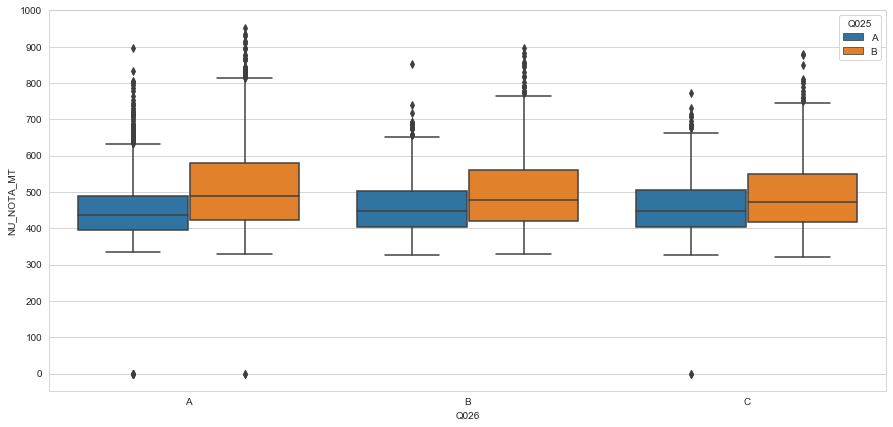

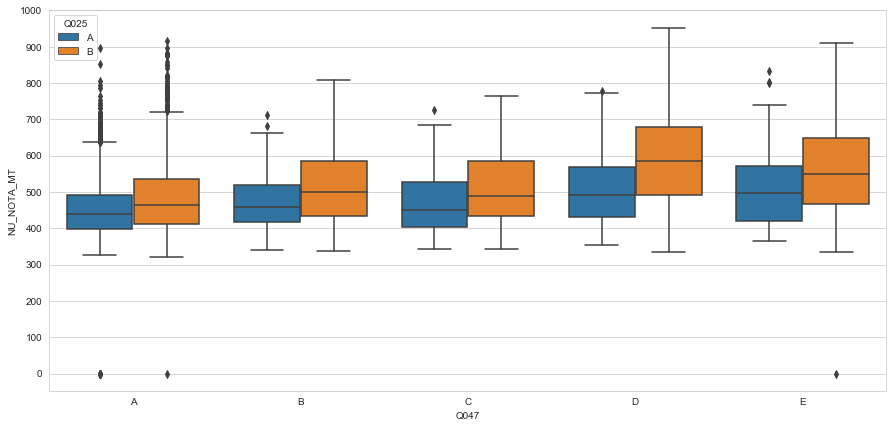

In [87]:
plt.rcParams.update({'figure.max_open_warning': 0})

for i, col in enumerate(categoricos):
    plt.figure(i, figsize=(15,7))
    sns.boxplot(data=df, x=col,y='NU_NOTA_MT', hue='Q025')
    plt.yticks(np.arange(0,1001,100))
    plt.savefig(f'imagens/{i}.png')

Observando a variável Q001 acima e sabendo que ela é o grau de escolaridade que o pai do candidato estudou, poderíamos tratá-la como uma variável qualitativa ordinal, caso fosse até a letra G (pós-graduação completa). No entanto, a letra H quebra a ordinalidade da variável. idem para Q002 (grau de escolaridade da mãe do candidato)

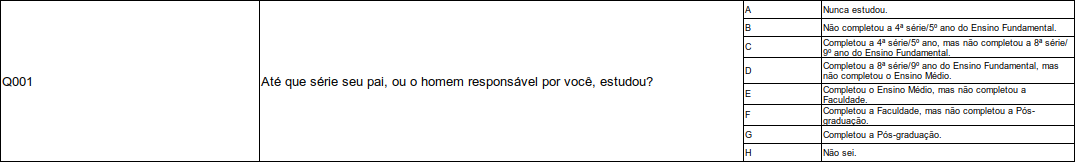

Por outro lado, a variável Q006 é a renda familiar. Como a renda familiar é separada em faixas (classes), trata-se de uma variável qualitativa. Por se tratar de valores ordenados e crescentes, tratamo-na como uma __variável qualitativa ordinal__. É nítido ver que a nota de matemática aumenta à medida que a renda familiar aumenta.

$\;$


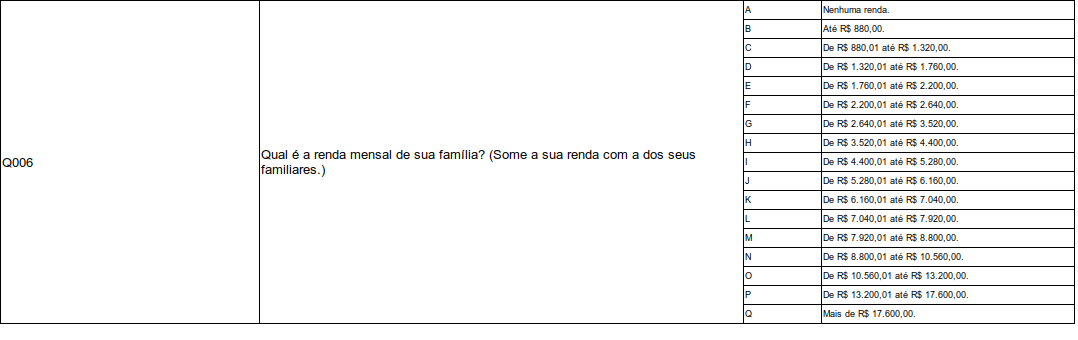

A variável Q024 pode er tratada como __quantitativa discreta__, onde $A = 0, B = 1, C = 2, D = 3 ~\text{e}~ E = 4$ ou mais. Também é notório perceber o aumento da nota de matemática à medida que a quantidade de computadores por casa aumenta. Isso, obviamente, tem relação direta com a variável Q006 (renda familiar), analisada acima.

$\;$

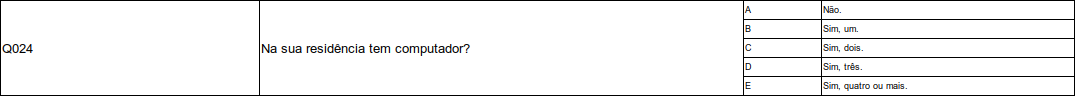

A variável Q047. Essa variável é __categórica nominal__.

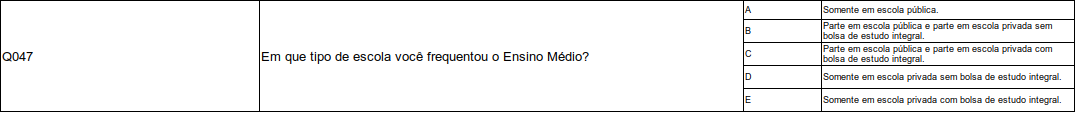

Conclusão dessas varáveis categóricas analizadas: é possível ver que algumas desses features categóricos têm uma boa relação com a nota de matemática dos candidatos. Observa-se, por exemplo, que o grau de instrução dos pais, a renda média familiar, se têm ou não internet em casa, quantidade de computadores que há na casa, entre outras, têm certa relação com a nota de matemática. As features sem qualquer relação aparente, serão removidas. É possível ver ainda que existe bastante outliers para os dados de brasileiros (1) e brasileiros naturalizados (2). Ambos formam a maior base de dados, estando com assimetria positiva (mais valores extremos concentrados acima da mediana do que abaixo), indicando que um número pequeno de pessoas tiram notas acima de 700, ao passo que a grande maioria está abaixo disto. 

In [88]:
deletar = ['TP_ANO_CONCLUIU', 'IN_TREINEIRO', 'TP_LINGUA', 'IN_BAIXA_VISAO', 'IN_SABATISTA', 'SG_UF_RESIDENCIA',
          'NU_IDADE', 'TP_COR_RACA', 'CO_UF_RESIDENCIA', 'Q026', 'TP_NACIONALIDADE', 'Q047']

In [89]:
df.drop(deletar, axis=1, inplace=True)
teste.drop(deletar, axis=1, inplace=True)

A nota da redação é formada por 5 competências NU_NOTA_COMP1,NU_NOTA_COMP2, NU_NOTA_COMP3, NU_NOTA_COMP4 e NU_NOTA_COMP5. Portanto, não faz muito sentido deixar essas competências, já que são diretamente proporcionais à nota da redação.

In [90]:
for col in df.columns:
    if 'COMP' in col.split('_')[-1]:
        df.drop(col, axis=1, inplace=True)
        teste.drop(col, axis=1, inplace=True)

# Vamos verificar agora se a ditribuição do treino e teste têm similaridades

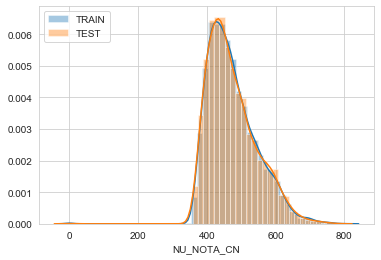

In [91]:
x0 = df['NU_NOTA_CN']
x1 = teste['NU_NOTA_CN']
sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=1, loc='upper left')
plt.savefig('imagens/Nota_mat_dist_train_test.png');

In [92]:
treino_dist = df.copy().select_dtypes(include = ['float64'])
treino_dist.drop('NU_NOTA_MT', axis=1, inplace=True)

test_dist = teste.copy().select_dtypes(include = ['float64'])

In [93]:
treino_dist.head(2)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_STATUS_REDACAO,NU_NOTA_REDACAO
0,436.3,495.4,581.2,1.0,520.0
1,474.5,544.1,599.0,1.0,580.0


In [94]:
treino_dist.TP_STATUS_REDACAO.unique()

array([1., 6., 9., 4., 3., 7., 8., 5., 2.])

In [95]:
test_dist.head(2)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_STATUS_REDACAO,NU_NOTA_REDACAO
0,464.8,443.5,431.8,1.0,420.0
1,391.1,491.1,548.0,1.0,580.0


Vamos remover também a variável TP_STATUS_REDACAO

In [96]:
df.drop('TP_STATUS_REDACAO', axis=1, inplace=True)
teste.drop('TP_STATUS_REDACAO', axis=1, inplace=True)

In [97]:
# Selecionando as variáveis float novamente

treino_dist = df.copy().select_dtypes(include = ['float64'])
treino_dist.drop('NU_NOTA_MT', axis=1, inplace=True)

test_dist = teste.copy().select_dtypes(include = ['float64'])

Análise das distribuições no treino e teste:\
$\;$

É possível ver que as variáveis do tipo float possuem distribuições similares nos dados de treino e teste.
Além disso, é possível ver que as distribuições de frequências das features nos dados de treino e teste são semelhantes, o que é importante para algoritmos de aprendizado de máquina, do ponto de vista da inferência estatística.

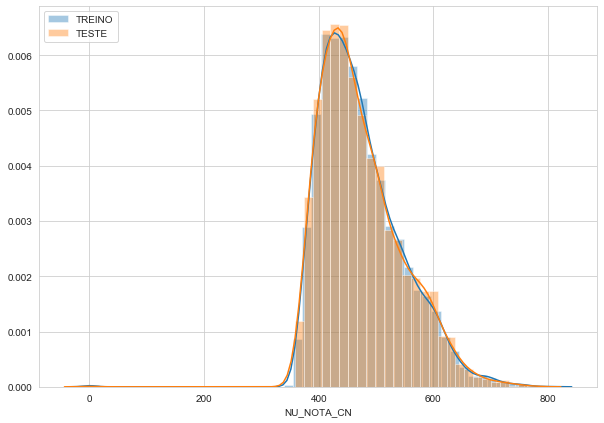

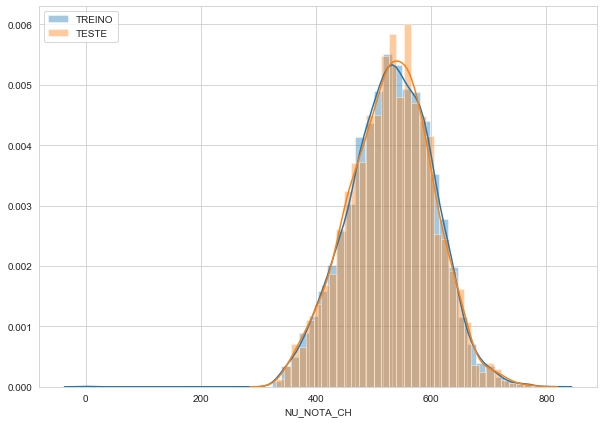

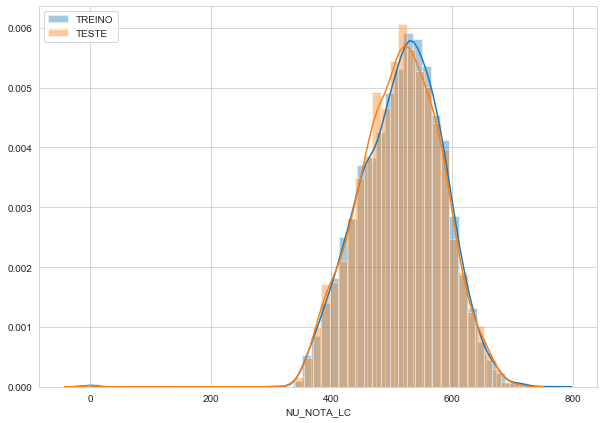

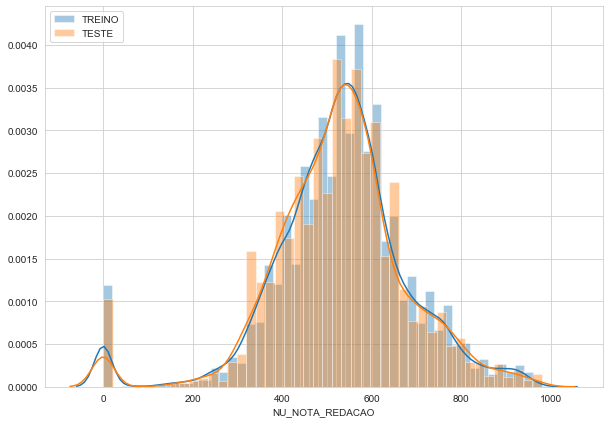

In [98]:
for i, col in enumerate(treino_dist.columns):
    plt.figure(i, figsize=(10,7))
    sns.distplot(a=treino_dist[col])
    sns.distplot(a=test_dist[col])
    plt.legend(labels=['TREINO','TESTE'], ncol=1, loc='upper left');
    plt.savefig(f'imagens/dist_{i}.png');

Analisando agora scatterplots dos pares de variáveis com a nota de matemática no dado de treino

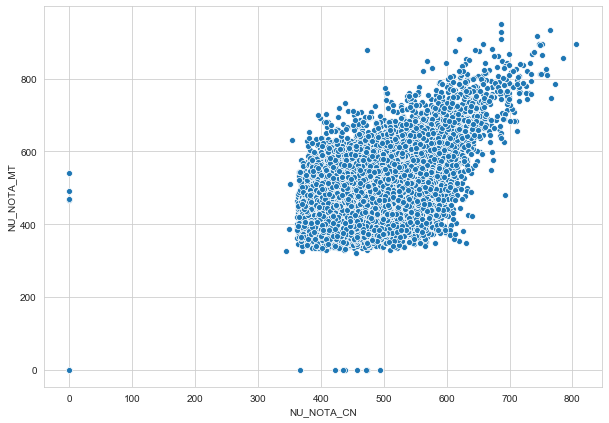

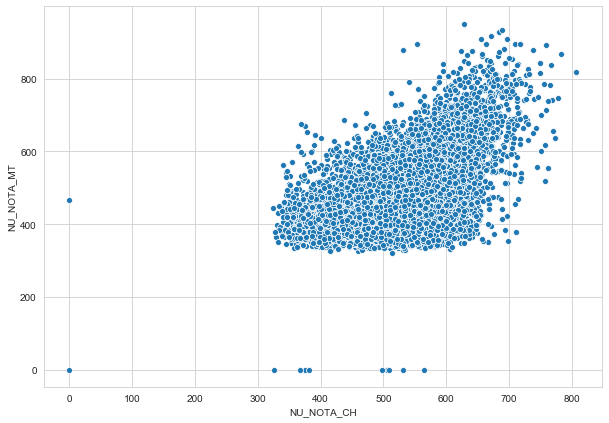

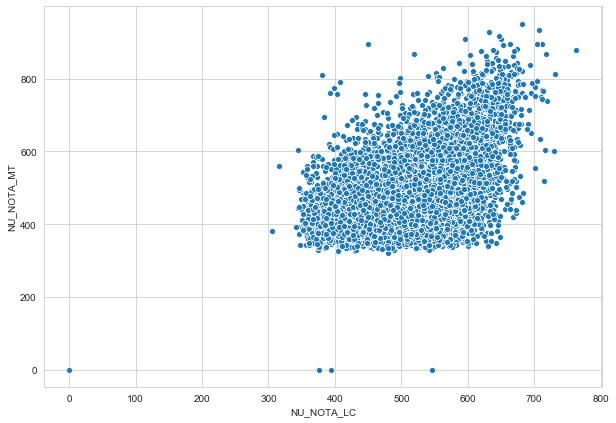

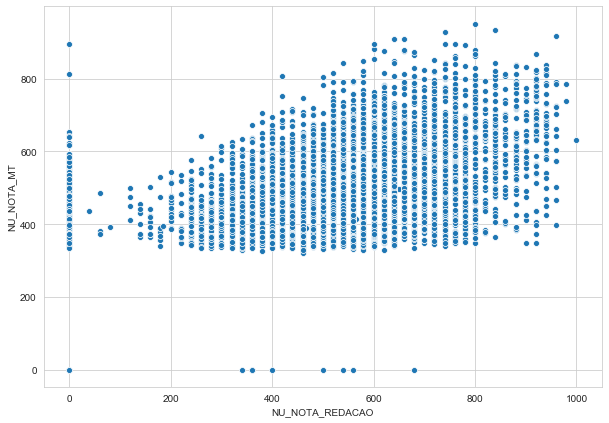

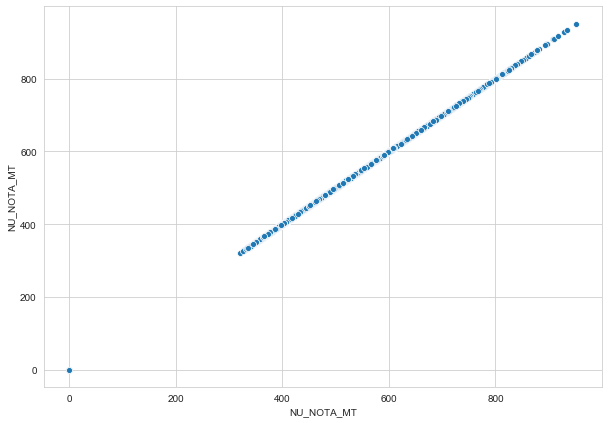

In [99]:
for i, col in enumerate(df.select_dtypes(include=['float64'])):
    plt.figure(i, figsize= (10,7))
    sns.scatterplot(data=df, x= col, y='NU_NOTA_MT')
    plt.savefig(f'imagens/scatter_treino_{i}.png');
    

Pelo scaterplot da nota de matemática com a nota de redação, é plausível pensar que parece muito uma variável quantitativa discreta. No entanto, como são 53 valores diferentes, será tratada como quantitativa contínua, igual às outras notas

In [100]:
print(f"A variável NU_NOTA_REDACAO posui {df.NU_NOTA_REDACAO.nunique()} valore únicos.")

A variável NU_NOTA_REDACAO posui 53 valore únicos.


# Tornar binários não numéricos em numéricos

In [101]:
#features binários
binarios = [a for a in df.columns if df[a].nunique() == 2]
binarios2 = [a for a in teste.columns if teste[a].nunique() == 2]

In [102]:
binarios

['TP_SEXO', 'Q025']

In [103]:
binarios2

['TP_SEXO', 'Q025']

In [104]:
#features binários
binarios = [a for a in df.columns if df[a].nunique() == 2]
binarios2 = [a for a in teste.columns if teste[a].nunique() == 2]

In [105]:
#Tornar binários não numéricos em numéricos:
for c in df[binarios].select_dtypes(exclude=[np.number]).columns:
    df[c] = df[c].cat.codes
    
for g in teste[binarios2].select_dtypes(exclude=[np.number]).columns:
    teste[g] = teste[g].cat.codes

In [106]:
print('treino', 25*' ', 'teste', '\n')
for a, b in zip(binarios, binarios2):
    print('%3s %3s \t\t %s %s' %(a, df[a].unique(), b, df[b].unique()))

treino                           teste 

TP_SEXO [1 0] 		 TP_SEXO [1 0]
Q025 [0 1] 		 Q025 [0 1]


# Analizando outliers das nota de matemática por Desvio padrão

In [107]:
from scipy import stats

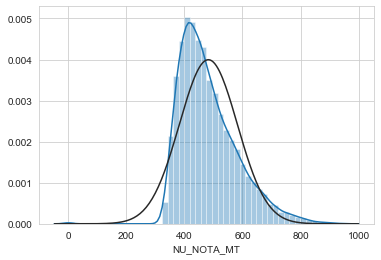

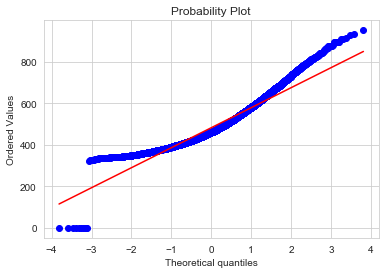

In [108]:
#distribuição com outliers.
sns.distplot(df.NU_NOTA_MT, fit=stats.norm);
fig = plt.figure()
res = stats.probplot(df.NU_NOTA_MT, plot=plt)

In [109]:
n = 2.5
infe= df.NU_NOTA_MT.mean() - n * df.NU_NOTA_MT.std()
supe= df.NU_NOTA_MT.mean() + n * df.NU_NOTA_MT.std()

print('{} notas de matemática podem ser consideradas outliers por dois desvios padrões e meio aquém e além'.format(\
      df[(df.NU_NOTA_MT <= infe) | (df.NU_NOTA_MT >= supe)].shape[0]))

240 notas de matemática podem ser consideradas outliers por dois desvios padrões e meio aquém e além


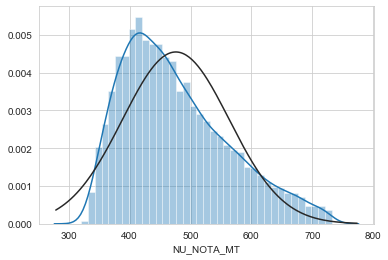

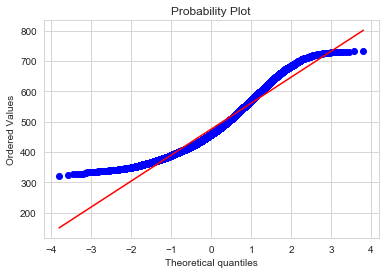

In [110]:
#Distribuição sem outliers
sem = df[(df.NU_NOTA_MT >= infe) & (df.NU_NOTA_MT <= supe)].NU_NOTA_MT

sns.distplot(sem, fit=stats.norm);
fig = plt.figure()
res = stats.probplot(sem, plot=plt)

#gráfico continua relativamente assimétrico à direita

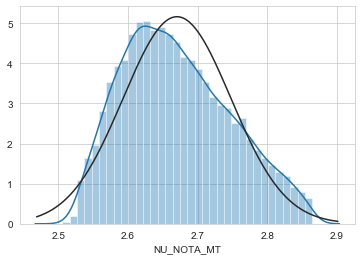

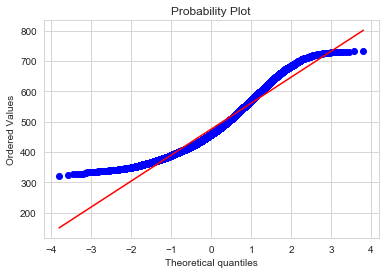

In [111]:
#Distribuição do log sem outliers
sem = df[(df.NU_NOTA_MT >= infe) & (df.NU_NOTA_MT <= supe)].NU_NOTA_MT

sns.distplot(np.log10(sem), fit=stats.norm);
fig = plt.figure()
res = stats.probplot(sem, plot=plt)

É possível observar que, quando são removidos os outliers e utilizando-se o log das notas, a distribuição univariada se aproxima mais de uma distribuição nomal do que nos outros três casos. No entanto, a modelagem será feita a priori sem remover mais dados. 

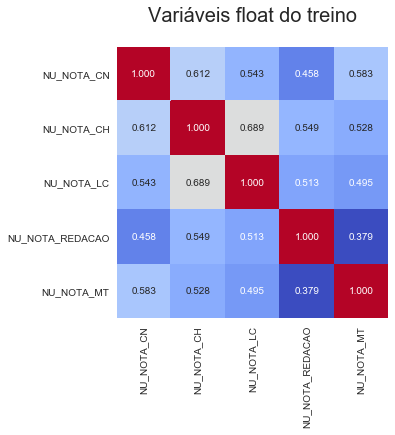

In [112]:
f, ax = plt.subplots(figsize = (5,5))

sns.heatmap(df.select_dtypes(include=['float64']).corr(), fmt='.3f',
            annot=True, yticklabels=1, xticklabels=1, cmap='coolwarm', ax = ax, cbar=False, square=True)
ax.set_title('Variáveis float do treino', fontsize = 20, pad = 25)
#plt.setp(ax.get_xticklabels(), fontsize=10, fontweight= 'normal', horizontalalignment="center")
plt.yticks(rotation=0)
plt.savefig('imagens/float_treino.png');

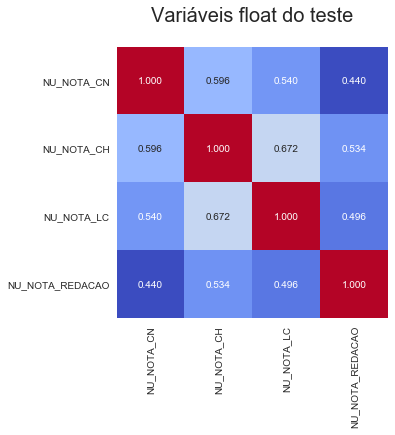

In [113]:
f, ax = plt.subplots(figsize = (5,5))

sns.heatmap(teste.select_dtypes(include=['float64']).corr(), fmt='.3f',
            annot=True, yticklabels=1, xticklabels=1, cmap='coolwarm', ax = ax, cbar=False, square=True)
ax.set_title('Variáveis float do teste', fontsize = 20, pad = 25)
#plt.setp(ax.get_xticklabels(), fontsize=10, fontweight= 'normal', horizontalalignment="center")
plt.yticks(rotation=0)
plt.savefig('imagens/float_teste.png');;

# Random forest com Label Encoder

In [114]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from pprint import pprint

Já sabemos que Q006 é variável categórica ordinal, assim, vamos tratá-la como tal. Primeiramente, criando um dicionário:
d = {A: 1, B: 2...}

In [115]:
import string

d = {}
for x, y in zip(range(1, 18), string.ascii_uppercase):
    d[y] = x

In [116]:
df.loc[:, 'Q006'] = df.loc[:, 'Q006'].map(d)
teste.loc[:, 'Q006'] = teste.loc[:, 'Q006'].map(d)

Já sabemos também que Q024 é quantitativa discreta (quatidade de computadores na casa)

In [117]:
df.Q024.unique()

[A, B, C, D, E]
Categories (5, object): [A, B, C, D, E]

In [118]:
d = {}
for x, y in zip(range(0, 5), string.ascii_uppercase):
    d[y] = x

In [119]:
df.loc[:, 'Q024'] = df.loc[:, 'Q024'].map(d)
teste.loc[:, 'Q024'] = teste.loc[:, 'Q024'].map(d)

In [120]:
df.head()

,TP_SEXO,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,NU_NOTA_MT
0,1,1,436.3,495.4,581.2,520.0,D,D,3,0,0,399.4
1,0,2,474.5,544.1,599.0,580.0,A,A,2,0,0,459.8
5,0,1,439.7,583.2,410.9,620.0,E,E,3,1,1,364.5
6,0,2,420.1,604.2,484.5,560.0,E,D,3,1,1,529.2
7,0,1,619.6,625.8,611.2,620.0,G,F,12,1,1,566.7


As variáveis `TP_ESCOLA`, `TP_SEXO`, `Q001` e `Q002`, iremos tratar com o __pandas.get_dummies__. Esse tratamento é utlizado para tornar variáves categóricas nominais em valores numéricos.

Para este problema, como já temos os dados de treino e teste separados e especificados (se trata de uma competição), se aplicarmos o __get_dummies__ separadamente em cada dataset, pode occorer de alguma classe no dado de treino não ocorrer no dado de teste (vice-versa), de modo que teremos quantidades de colunas diferentes. Isso faz com que o algoritmo XGBoost retorne um erro. Assim, vamos utilizar a simples função abaixo para aplicar o __get_dummies__ do __pandas__, após fazer a concatenaçao dos dados de treino com os dados de teste. Obviamente, esse tipo de tratamento não seria possível para se colocar um modelo real em produção. Outrossim, teríamos que fazer sempre o pré-processamento dos dados, gerando novo modelo.


In [121]:
def get_dummies(train, test):
    comb = pd.get_dummies(data = pd.concat([train,test]), columns=['TP_SEXO', 'TP_ESCOLA', 'Q001', 'Q002'])
    train_rows = train.shape[0]
    train = comb.iloc[:train_rows, :]
    test = comb.iloc[train_rows:, :] 
    return train, test

In [122]:
treino = get_dummies(df, teste)[0]
test = get_dummies(df, teste)[1]

In [123]:
treino.drop('NU_INSCRICAO', axis=1, inplace=True)

In [124]:
X_u = treino.drop('NU_NOTA_MT', axis=1)
X = X_u.values
y = treino.NU_NOTA_MT.values.reshape(-1,1)

In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

In [126]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 30)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 130, num = 12)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,3,4,5,6,7]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2,3,4,5,6,7]
# Method of selecting samples for training each tree
bootstrap = [True]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True],
 'max_depth': [10, 20, 31, 42, 53, 64, 75, 86, 97, 108, 119, 130, None],
 'max_features': ['auto'],
 'min_samples_leaf': [2, 3, 4, 5, 6, 7],
 'min_samples_split': [2, 3, 4, 5, 6, 7],
 'n_estimators': [10,
                  16,
                  23,
                  29,
                  36,
                  42,
                  49,
                  55,
                  62,
                  68,
                  75,
                  82,
                  88,
                  95,
                  101,
                  108,
                  114,
                  121,
                  127,
                  134,
                  141,
                  147,
                  154,
                  160,
                  167,
                  173,
                  180,
                  186,
                  193,
                  200]}


In [127]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter=100,
                               cv = 3, verbose=2, random_state=102, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   55.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.8min finished
/home/apolo/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [10, 20, 31, 42, 53, 64,
                                                      75, 86, 97, 108, 119, 130,
                                                      None],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7],
                                        'n_estimators': [10, 16, 23, 29, 36, 42,
                                                         49, 55, 62, 68, 75, 82,
                                                         88, 95, 101, 108, 114,
                                                         121, 127, 134, 141,
                                                         147, 154, 160,

In [128]:
from sklearn.metrics import mean_squared_error

In [129]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = np.sqrt(mean_squared_error(y_test, predictions))
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))    
    return errors

In [130]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 102)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)
best_random = rf_random.best_estimator_
 
#CHAMANDO FUNÇÃO EVALUATE:
random_accuracy = evaluate(best_random, X_test, y_test)
print('Improvement of {:0.2f}%.'.format(100 * abs(random_accuracy - base_accuracy) / base_accuracy))

/home/apolo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Model Performance
Average Error: 78.2194 degrees.
Model Performance
Average Error: 73.5981 degrees.
Improvement of 5.91%.


In [131]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=4,
                      n_estimators=134)

In [132]:
from sklearn.model_selection import GridSearchCV

In [221]:
# Criando o grid de parâmetros (param_grid) baseado no resultado do random search (RandomizedSearchCV)

param_grid = {
    'bootstrap': [True],
    'max_depth': np.arange(8,12,1),
    'max_features': ['auto'],
    'min_samples_leaf': np.arange(2,4,1),
    'min_samples_split': np.arange(2,7,1),
    'n_estimators': np.arange(110,140,1)
     }

# Criação de um modelo para ser tomado como base
rf = RandomForestRegressor(random_state=102)

# Instanciando o com o GridSearch
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3,  verbose = 2, n_jobs=-1)
pprint(grid_search)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=102), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': array([ 7,  8,  9, 10, 11]),
                         'max_features': ['auto'],
                         'min_samples_leaf': array([2, 3]),
                         'min_samples_split': array([2, 3, 4, 5, 6]),
                         'n_estimators': array([120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136])},
             verbose=2)


In [222]:
#Isso levará algum tempo, pois trata-se de 3600 combinações diferentes de hiperparâmetros.
#Caso você não queira rodar isso, os melhores hiperparâmetros que esse grid retornou estão logo abaixo!

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 850 candidates, totalling 2550 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 35.8min
[Parallel(n_jobs=-1)]: Done 2550 out of 2550 | elapsed: 48.6min finished
/home/apolo/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=102), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': array([ 7,  8,  9, 10, 11]),
                         'max_features': ['auto'],
                         'min_samples_leaf': array([2, 3]),
                         'min_samples_split': array([2, 3, 4, 5, 6]),
                         'n_estimators': array([120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136])},
             verbose=2)

In [ ]:
best = grid_search

In [258]:
#best =  RandomForestRegressor( bootstrap = True, max_depth=8, max_features='auto', min_samples_leaf=2, min_samples_split=6,n_estimators=126, random_state=102 )
#best.fit(X_train,y_train) 

In [256]:
usar = pd.DataFrame(data=np.concatenate((y_test, best.predict(X_test).reshape(-1,1)), axis=1),
            columns=['NOTA_REAL', 'NOTA_PREDITA'])

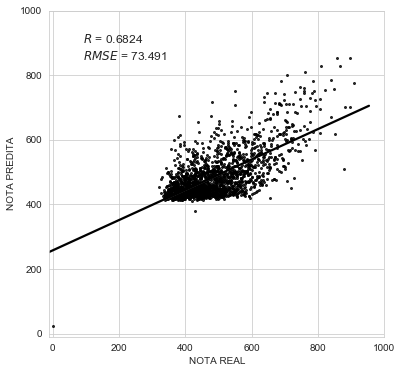

In [257]:
f, ax = plt.subplots(figsize=(6, 6))

sns.regplot(x='NOTA_REAL', y= 'NOTA_PREDITA', data=usar, color='k', ci=False, scatter_kws={'s': 4},
              ax=ax)

r = usar.corr().NOTA_REAL.NOTA_PREDITA
label = r'$R$ = ' + str(round(r, 4))
ax.annotate(label, xy = (0.1, .9), size = 12, xycoords = ax.transAxes)
rmse = np.sqrt(mean_squared_error(y_test, best.predict(X_test)))
label2 = r'$RMSE$ = ' + str(round(rmse, 3))
ax.annotate(label2, xy = (0.1, .85), size = 12, xycoords = ax.transAxes)


ax.set_xlabel('NOTA REAL')
ax.set_ylabel('NOTA PREDITA')
ax.set_xlim(-10,1000)
ax.set_ylim(-10,1000)

In [259]:
df['RF'] = best.predict(X)

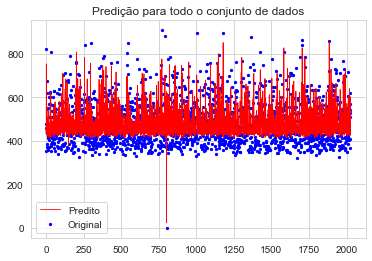

In [261]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="Original")
plt.plot(x_ax, best.predict(X_test), lw=0.8, color="red", label="Predito")
plt.legend()
plt.title('Predição para todo o conjunto de dados')
plt.show()

# Feature importance com o Random Forest (Utilizei o melhor modelo treinado)

In [262]:
pd.DataFrame({'Variable':X_u.columns,
              'Importance':best.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
0,NU_NOTA_CN,0.643154
1,NU_NOTA_CH,0.159255
2,NU_NOTA_LC,0.075215
4,Q006,0.033539
3,NU_NOTA_REDACAO,0.019125
7,TP_SEXO_0,0.010806
5,Q024,0.010490
8,TP_SEXO_1,0.009623
6,Q025,0.004221
26,Q002_F,0.003281


Vemos acima que as variáveis que melhores se relacionam com a energia da variável __NU_NOTA_MT__, é a variável __NU_NOTA_CN__, seguida de __NU_NOTA_CH__ e em terceiro, __NU_NOTA_LC__. No entanto, é possível que um modelo com base apenas na nota de Ciências Naturais já fosse razoavemente bom. Curioso que o sexo do candidato possui mais importância que a Nota de redação, na predição da nota de matemática. Isso, claro, considerando todas as variáveis utilizadas, de uma só vez. Se fosse para extrair um modelo com base apenas em uma dessas duas variáveis, acredito que a nota da redação seria a variável explicativa melhor representativa que o sexo, na predição da nota de matemática.

# E agora, o poderoso XGBoost!!

In [142]:
import sklearn

In [143]:
from scipy.stats import uniform, randint
import xgboost as xgb

In [144]:
#Setando os parâmetros para fazer a busca randômica dos hiperparâmetros

params = {
    "min_child_weight": randint(3, 10),
    "subsample": uniform(0.6, 0.4),
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(3, 10), # default 3
    "n_estimators": randint(90, 150)
}

In [145]:
xgb_model = xgb.XGBRegressor()

search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=102, n_iter=200, cv=3, 
                            verbose=1, n_jobs=-1, return_train_score=True, refit=False,
                            scoring='neg_mean_squared_error')

search.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  6.4min finished


RandomizedSearchCV(cv=3, estimator=XGBRegressor(), n_iter=200, n_jobs=-1,
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb8b477c710>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb8b66c68d0>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb8b66c6950>,
                                        'max_depth':...0>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb8b477cd50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb8b66c6e50>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb8b477cc10>},
                   random_state=102, refit=False, return_train_score=True,
                   scori

In [146]:
search.best_params_

{'colsample_bytree': 0.8615770580302923,
 'gamma': 0.3832752518995461,
 'learning_rate': 0.0769158528197118,
 'max_depth': 3,
 'min_child_weight': 5,
 'n_estimators': 140,
 'subsample': 0.7960728024113715}

In [147]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

#Dicionário para salvar rmse do train e eval

progress = dict()

watchlist  = [(dtrain,'train'), (dtest, 'eval')]

xgb1 = xgb.train(search.best_params_,
                   dtrain,
                   num_boost_round=1000,
                   evals=watchlist,
                   early_stopping_rounds=40, evals_result=progress)

[0]	train-rmse:455.505	eval-rmse:455.692
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 40 rounds.
[1]	train-rmse:421.487	eval-rmse:421.591
[2]	train-rmse:390.173	eval-rmse:390.21
[3]	train-rmse:361.418	eval-rmse:361.405
[4]	train-rmse:334.951	eval-rmse:334.933
[5]	train-rmse:310.607	eval-rmse:310.654
[6]	train-rmse:288.141	eval-rmse:288.188
[7]	train-rmse:267.613	eval-rmse:267.642
[8]	train-rmse:248.753	eval-rmse:248.843
[9]	train-rmse:231.391	eval-rmse:231.393
[10]	train-rmse:215.498	eval-rmse:215.495
[11]	train-rmse:200.965	eval-rmse:200.985
[12]	train-rmse:187.666	eval-rmse:187.696
[13]	train-rmse:175.482	eval-rmse:175.554
[14]	train-rmse:164.364	eval-rmse:164.482
[15]	train-rmse:154.296	eval-rmse:154.413
[16]	train-rmse:145.154	eval-rmse:145.334
[17]	train-rmse:136.866	eval-rmse:137.106
[18]	train-rmse:129.396	eval-rmse:129.677
[19]	train-rmse:122.642	eval-rmse:122.983
[20]	train-rmse:116.556	eval

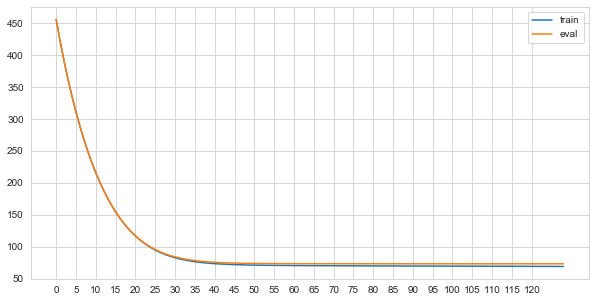

In [148]:
#Gráfico para visualizar decaimento do rmse do treino (train) e validação (eval) ao longo do número de épocas.
#Perceptível que o erro da validação começa à se afastar do treino para 35 épocas, aproximadamente.
fig, ax = plt.subplots(figsize = (10,5))
for k, v in progress.items():
    ax.plot(progress[k]['rmse'], label = k)
    ax.legend()
    ax.set_xticks(np.arange(0,125,5));

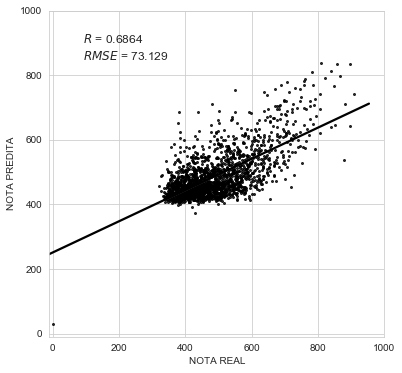

In [150]:
f, ax = plt.subplots(figsize=(6, 6))

usar = pd.DataFrame(data=np.concatenate((y_test, xgb1.predict(dtest).reshape(-1,1)), axis=1),
            columns=['NOTA_REAL', 'NOTA_PREDITA'])

sns.regplot(x='NOTA_REAL', y= 'NOTA_PREDITA', data=usar, color='k', ci=False, scatter_kws={'s': 4},
              ax=ax)

r = usar.corr().NOTA_REAL.NOTA_PREDITA
label = r'$R$ = ' + str(round(r, 4))
ax.annotate(label, xy = (0.1, .9), size = 12, xycoords = ax.transAxes)
rmse = np.sqrt(mean_squared_error(y_test, xgb1.predict(dtest)))
label2 = r'$RMSE$ = ' + str(round(rmse, 3))
ax.annotate(label2, xy = (0.1, .85), size = 12, xycoords = ax.transAxes)


ax.set_xlabel('NOTA REAL')
ax.set_ylabel('NOTA PREDITA')
ax.set_xlim(-10,1000)
ax.set_ylim(-10,1000)

#### É possível ver que já na primeira tentativa temos um menor rmse do que no Random Forest

In [151]:
df['xgb1'] = xgb1.predict(xgb.DMatrix(X))

In [152]:
search.best_params_

{'colsample_bytree': 0.8615770580302923,
 'gamma': 0.3832752518995461,
 'learning_rate': 0.0769158528197118,
 'max_depth': 3,
 'min_child_weight': 5,
 'n_estimators': 140,
 'subsample': 0.7960728024113715}

In [153]:
#Abaixo tem-se os melhores parâmetros obtidos pelo RandomizedSearch para o XGBoost.
'''best_gridsearch = 'colsample_bytree': 0.8615770580302923,
 'gamma': 0.3832752518995461,
 'learning_rate': 0.0769158528197118,
 'max_depth': 3,
 'min_child_weight': 5,
 'n_estimators': 140,
 'subsample': 0.7960728024113715}'''

"best_gridsearch = {'colsample_bytree': 0.7649707460043814,\n 'gamma': 0.24988363932380714,\n 'learning_rate': 0.09337911550467248,\n 'max_depth': 3,\n 'min_child_weight': 5,\n 'n_estimators': 108,\n 'subsample': 0.8211705629105115}"

### A partir da busca randômica de hiperparâmetros acima, seta-se um grid_search para buscar os melhores hiperparâmetros com um range em torno dos hiperparâmetros ótimos retornados pelo RandomizedSearch. 

* OBS: Esse código abaixo demora bastante, pois são mais de 5000 combinações de hiperparâmetros diferentes. Caso não queira rodá-lo, os melhores hiperparâmetros obtidos estão logo abaixo.

In [155]:
params = {}
gridsearch_params = [ 
    (max_depth, min_child_weight, subsample, colsample, eta) 
    for max_depth in range(3,6) 
    for min_child_weight in range(4,6) 
    for subsample in np.arange(0.7,0.95,0.02)
    for colsample in np.arange(0.74,0.96,0.02)
    for eta in [.3, .2, .1, .05, .01, .005]
        ]

min_rmse = float("Inf")
best_params = None
for max_depth, min_child_weight, subsample, colsample, eta in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}, subsample={}, colsample={}, eta = {} ".format(
                             max_depth, min_child_weight, subsample, colsample, eta))
    
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    params['subsample'] = subsample 
    params['colsample'] = colsample 
    params['eta'] = eta 

    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=1500,
        seed=42,
        nfold=3,
        metrics={'rmse'},
        early_stopping_rounds=40
    )    #atualiza com melhor RMSE
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].idxmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (max_depth, min_child_weight, subsample, colsample, eta)
print("Best params: {}, {}, {}, {}, {} RMSE: {}".format(best_params[0], best_params[1], best_params[2], best_params[3],
                                                        best_params[4], min_rmse))

CV with max_depth=3, min_child_weight=4, subsample=0.7, colsample=0.74, eta = 0.3 
	RMSE 72.833435 for 22 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.7, colsample=0.74, eta = 0.2 
	RMSE 72.37279766666666 for 36 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.7, colsample=0.74, eta = 0.1 
	RMSE 72.52698033333333 for 85 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.7, colsample=0.74, eta = 0.05 
	RMSE 72.361565 for 151 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.7, colsample=0.74, eta = 0.01 
	RMSE 72.30954766666666 for 653 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.7, colsample=0.74, eta = 0.005 
	RMSE 72.330325 for 1426 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.7, colsample=0.76, eta = 0.3 
	RMSE 72.833435 for 22 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.7, colsample=0.76, eta = 0.2 
	RMSE 72.37280033333333 for 36 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.7, 

	RMSE 72.30955233333334 for 653 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.7, colsample=0.9400000000000002, eta = 0.005 
	RMSE 72.330325 for 1426 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.72, colsample=0.74, eta = 0.3 
	RMSE 72.832507 for 16 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.72, colsample=0.74, eta = 0.2 
	RMSE 72.63468933333333 for 38 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.72, colsample=0.74, eta = 0.1 
	RMSE 72.59879566666666 for 60 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.72, colsample=0.74, eta = 0.05 
	RMSE 72.33738433333333 for 125 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.72, colsample=0.74, eta = 0.01 
	RMSE 72.32087966666666 for 637 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.72, colsample=0.74, eta = 0.005 
	RMSE 72.340169 for 1429 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.72, colsample=0.76, eta = 0.3 
	RMSE 72.832507 for 16

	RMSE 72.59879566666666 for 60 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.72, colsample=0.9400000000000002, eta = 0.05 
	RMSE 72.33738433333333 for 125 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.72, colsample=0.9400000000000002, eta = 0.01 
	RMSE 72.32087966666666 for 637 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.72, colsample=0.9400000000000002, eta = 0.005 
	RMSE 72.340169 for 1429 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.74, colsample=0.74, eta = 0.3 
	RMSE 72.91997533333334 for 19 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.74, colsample=0.74, eta = 0.2 
	RMSE 72.68557966666667 for 27 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.74, colsample=0.74, eta = 0.1 
	RMSE 72.48366333333333 for 54 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.74, colsample=0.74, eta = 0.05 
	RMSE 72.41543066666667 for 139 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.74, colsamp

	RMSE 72.345553 for 1297 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.74, colsample=0.9400000000000002, eta = 0.3 
	RMSE 72.91997533333334 for 19 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.74, colsample=0.9400000000000002, eta = 0.2 
	RMSE 72.68557966666667 for 27 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.74, colsample=0.9400000000000002, eta = 0.1 
	RMSE 72.48366333333333 for 54 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.74, colsample=0.9400000000000002, eta = 0.05 
	RMSE 72.41543066666667 for 139 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.74, colsample=0.9400000000000002, eta = 0.01 
	RMSE 72.34471133333334 for 677 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.74, colsample=0.9400000000000002, eta = 0.005 
	RMSE 72.345553 for 1297 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.76, colsample=0.74, eta = 0.3 
	RMSE 72.80768366666666 for 24 rounds
CV with max_depth=3, min_child

	RMSE 72.46582033333334 for 67 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.76, colsample=0.9200000000000002, eta = 0.05 
	RMSE 72.36610433333333 for 125 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.76, colsample=0.9200000000000002, eta = 0.01 
	RMSE 72.309263 for 732 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.76, colsample=0.9200000000000002, eta = 0.005 
	RMSE 72.32179500000001 for 1254 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.76, colsample=0.9400000000000002, eta = 0.3 
	RMSE 72.80768366666666 for 24 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.76, colsample=0.9400000000000002, eta = 0.2 
	RMSE 72.57896933333335 for 28 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.76, colsample=0.9400000000000002, eta = 0.1 
	RMSE 72.46582033333334 for 67 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.76, colsample=0.9400000000000002, eta = 0.05 
	RMSE 72.36610433333333 for 125 rounds
CV with 

	RMSE 72.32899466666667 for 1460 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.78, colsample=0.9200000000000002, eta = 0.3 
	RMSE 72.91829966666667 for 16 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.78, colsample=0.9200000000000002, eta = 0.2 
	RMSE 72.60367866666667 for 38 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.78, colsample=0.9200000000000002, eta = 0.1 
	RMSE 72.46943133333333 for 67 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.78, colsample=0.9200000000000002, eta = 0.05 
	RMSE 72.48079666666668 for 139 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.78, colsample=0.9200000000000002, eta = 0.01 
	RMSE 72.33057166666667 for 732 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.78, colsample=0.9200000000000002, eta = 0.005 
	RMSE 72.32899466666667 for 1460 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.78, colsample=0.9400000000000002, eta = 0.3 
	RMSE 72.91829966666667 for 16 rounds


	RMSE 72.39831266666665 for 67 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.8, colsample=0.9000000000000001, eta = 0.05 
	RMSE 72.35642233333333 for 136 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.8, colsample=0.9000000000000001, eta = 0.01 
	RMSE 72.36379733333332 for 750 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.8, colsample=0.9000000000000001, eta = 0.005 
	RMSE 72.360845 for 1257 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.8, colsample=0.9200000000000002, eta = 0.3 
	RMSE 72.86569700000001 for 24 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.8, colsample=0.9200000000000002, eta = 0.2 
	RMSE 72.46685833333333 for 27 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.8, colsample=0.9200000000000002, eta = 0.1 
	RMSE 72.39831266666665 for 67 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.8, colsample=0.9200000000000002, eta = 0.05 
	RMSE 72.35642233333333 for 136 rounds
CV with max_dep

	RMSE 72.605606 for 31 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.8200000000000001, colsample=0.8800000000000001, eta = 0.1 
	RMSE 72.54160833333333 for 62 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.8200000000000001, colsample=0.8800000000000001, eta = 0.05 
	RMSE 72.39499666666667 for 135 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.8200000000000001, colsample=0.8800000000000001, eta = 0.01 
	RMSE 72.35452266666665 for 751 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.8200000000000001, colsample=0.8800000000000001, eta = 0.005 
	RMSE 72.36512499999999 for 1259 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.8200000000000001, colsample=0.9000000000000001, eta = 0.3 
	RMSE 72.736229 for 20 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.8200000000000001, colsample=0.9000000000000001, eta = 0.2 
	RMSE 72.605606 for 31 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.8200000000000001, colsamp

	RMSE 72.35917666666667 for 742 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.8400000000000001, colsample=0.8400000000000001, eta = 0.005 
	RMSE 72.37476333333333 for 1420 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.8400000000000001, colsample=0.8600000000000001, eta = 0.3 
	RMSE 72.85722333333334 for 20 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.8400000000000001, colsample=0.8600000000000001, eta = 0.2 
	RMSE 72.63985166666667 for 30 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.8400000000000001, colsample=0.8600000000000001, eta = 0.1 
	RMSE 72.42945633333333 for 75 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.8400000000000001, colsample=0.8600000000000001, eta = 0.05 
	RMSE 72.39439399999999 for 139 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.8400000000000001, colsample=0.8600000000000001, eta = 0.01 
	RMSE 72.35917933333333 for 742 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.

	RMSE 72.73736066666667 for 26 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.8600000000000001, colsample=0.8200000000000001, eta = 0.1 
	RMSE 72.45421599999999 for 77 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.8600000000000001, colsample=0.8200000000000001, eta = 0.05 
	RMSE 72.43734233333333 for 127 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.8600000000000001, colsample=0.8200000000000001, eta = 0.01 
	RMSE 72.37253066666666 for 731 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.8600000000000001, colsample=0.8200000000000001, eta = 0.005 
	RMSE 72.38887299999999 for 1414 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.8600000000000001, colsample=0.8400000000000001, eta = 0.3 
	RMSE 72.65724933333333 for 23 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.8600000000000001, colsample=0.8400000000000001, eta = 0.2 
	RMSE 72.73736066666667 for 26 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.8

	RMSE 72.39229833333333 for 801 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.8800000000000001, colsample=0.78, eta = 0.005 
	RMSE 72.40426366666667 for 1348 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.8800000000000001, colsample=0.8, eta = 0.3 
	RMSE 72.70051566666666 for 20 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.8800000000000001, colsample=0.8, eta = 0.2 
	RMSE 72.572736 for 35 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.8800000000000001, colsample=0.8, eta = 0.1 
	RMSE 72.47256733333334 for 72 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.8800000000000001, colsample=0.8, eta = 0.05 
	RMSE 72.37802633333332 for 158 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.8800000000000001, colsample=0.8, eta = 0.01 
	RMSE 72.39229833333333 for 801 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.8800000000000001, colsample=0.8, eta = 0.005 
	RMSE 72.40426366666667 for 1348 rounds
CV with max

	RMSE 72.65943166666666 for 28 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.9000000000000001, colsample=0.76, eta = 0.1 
	RMSE 72.546369 for 86 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.9000000000000001, colsample=0.76, eta = 0.05 
	RMSE 72.46862266666666 for 165 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.9000000000000001, colsample=0.76, eta = 0.01 
	RMSE 72.388013 for 798 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.9000000000000001, colsample=0.76, eta = 0.005 
	RMSE 72.391103 for 1441 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.9000000000000001, colsample=0.78, eta = 0.3 
	RMSE 72.75383233333334 for 22 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.9000000000000001, colsample=0.78, eta = 0.2 
	RMSE 72.65943166666666 for 28 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.9000000000000001, colsample=0.78, eta = 0.1 
	RMSE 72.546369 for 86 rounds
CV with max_depth=3, min_child_wei

	RMSE 72.388013 for 798 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.9000000000000001, colsample=0.9400000000000002, eta = 0.005 
	RMSE 72.391103 for 1441 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.9200000000000002, colsample=0.74, eta = 0.3 
	RMSE 72.89398200000001 for 20 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.9200000000000002, colsample=0.74, eta = 0.2 
	RMSE 72.432495 for 33 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.9200000000000002, colsample=0.74, eta = 0.1 
	RMSE 72.52969366666666 for 78 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.9200000000000002, colsample=0.74, eta = 0.05 
	RMSE 72.38511666666666 for 147 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.9200000000000002, colsample=0.74, eta = 0.01 
	RMSE 72.40490733333333 for 727 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.9200000000000002, colsample=0.74, eta = 0.005 
	RMSE 72.41735566666667 for 1492 rounds
CV with

	RMSE 72.43249266666666 for 33 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.9200000000000002, colsample=0.9200000000000002, eta = 0.1 
	RMSE 72.52969366666666 for 78 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.9200000000000002, colsample=0.9200000000000002, eta = 0.05 
	RMSE 72.38511666666666 for 147 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.9200000000000002, colsample=0.9200000000000002, eta = 0.01 
	RMSE 72.40490733333333 for 727 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.9200000000000002, colsample=0.9200000000000002, eta = 0.005 
	RMSE 72.41735566666667 for 1492 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.9200000000000002, colsample=0.9400000000000002, eta = 0.3 
	RMSE 72.89398200000001 for 20 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.9200000000000002, colsample=0.9400000000000002, eta = 0.2 
	RMSE 72.43249266666666 for 33 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.9

	RMSE 72.414795 for 717 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.9400000000000002, colsample=0.8800000000000001, eta = 0.005 
	RMSE 72.42926533333333 for 1340 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.9400000000000002, colsample=0.9000000000000001, eta = 0.3 
	RMSE 72.78679666666666 for 20 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.9400000000000002, colsample=0.9000000000000001, eta = 0.2 
	RMSE 72.49484766666667 for 36 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.9400000000000002, colsample=0.9000000000000001, eta = 0.1 
	RMSE 72.59143833333333 for 66 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.9400000000000002, colsample=0.9000000000000001, eta = 0.05 
	RMSE 72.42183666666666 for 136 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.9400000000000002, colsample=0.9000000000000001, eta = 0.01 
	RMSE 72.414795 for 717 rounds
CV with max_depth=3, min_child_weight=4, subsample=0.9400000000000002

	RMSE 72.94059 for 20 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.7, colsample=0.8800000000000001, eta = 0.2 
	RMSE 72.59366866666666 for 44 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.7, colsample=0.8800000000000001, eta = 0.1 
	RMSE 72.55121866666667 for 58 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.7, colsample=0.8800000000000001, eta = 0.05 
	RMSE 72.50904566666667 for 120 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.7, colsample=0.8800000000000001, eta = 0.01 
	RMSE 72.472023 for 677 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.7, colsample=0.8800000000000001, eta = 0.005 
	RMSE 72.477229 for 1420 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.7, colsample=0.9000000000000001, eta = 0.3 
	RMSE 72.94059 for 20 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.7, colsample=0.9000000000000001, eta = 0.2 
	RMSE 72.59366866666666 for 44 rounds
CV with max_depth=3, min_child_weight=5, su

	RMSE 72.50148766666668 for 1297 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.72, colsample=0.8800000000000001, eta = 0.3 
	RMSE 72.856893 for 16 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.72, colsample=0.8800000000000001, eta = 0.2 
	RMSE 72.73171733333332 for 28 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.72, colsample=0.8800000000000001, eta = 0.1 
	RMSE 72.664248 for 57 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.72, colsample=0.8800000000000001, eta = 0.05 
	RMSE 72.51594033333333 for 125 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.72, colsample=0.8800000000000001, eta = 0.01 
	RMSE 72.49138133333334 for 673 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.72, colsample=0.8800000000000001, eta = 0.005 
	RMSE 72.501485 for 1297 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.72, colsample=0.9000000000000001, eta = 0.3 
	RMSE 72.856893 for 16 rounds
CV with max_depth=3, min_child_w

	RMSE 72.546626 for 138 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.74, colsample=0.8600000000000001, eta = 0.01 
	RMSE 72.50034366666667 for 648 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.74, colsample=0.8600000000000001, eta = 0.005 
	RMSE 72.498988 for 1302 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.74, colsample=0.8800000000000001, eta = 0.3 
	RMSE 72.98518866666666 for 17 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.74, colsample=0.8800000000000001, eta = 0.2 
	RMSE 72.70492566666667 for 28 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.74, colsample=0.8800000000000001, eta = 0.1 
	RMSE 72.57172666666666 for 67 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.74, colsample=0.8800000000000001, eta = 0.05 
	RMSE 72.546626 for 138 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.74, colsample=0.8800000000000001, eta = 0.01 
	RMSE 72.50034366666667 for 648 rounds
CV with max_depth=3, mi

	RMSE 73.05210866666665 for 20 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.76, colsample=0.8600000000000001, eta = 0.2 
	RMSE 72.78570066666667 for 37 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.76, colsample=0.8600000000000001, eta = 0.1 
	RMSE 72.69011666666667 for 62 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.76, colsample=0.8600000000000001, eta = 0.05 
	RMSE 72.54232533333334 for 125 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.76, colsample=0.8600000000000001, eta = 0.01 
	RMSE 72.49461866666667 for 646 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.76, colsample=0.8600000000000001, eta = 0.005 
	RMSE 72.478574 for 1254 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.76, colsample=0.8800000000000001, eta = 0.3 
	RMSE 73.05210866666665 for 20 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.76, colsample=0.8800000000000001, eta = 0.2 
	RMSE 72.78570066666667 for 37 rounds
CV with ma

	RMSE 72.59880833333334 for 127 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.78, colsample=0.8400000000000001, eta = 0.01 
	RMSE 72.50741566666666 for 677 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.78, colsample=0.8400000000000001, eta = 0.005 
	RMSE 72.483447 for 1254 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.78, colsample=0.8600000000000001, eta = 0.3 
	RMSE 73.03430666666668 for 16 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.78, colsample=0.8600000000000001, eta = 0.2 
	RMSE 72.74680599999999 for 28 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.78, colsample=0.8600000000000001, eta = 0.1 
	RMSE 72.59476233333334 for 67 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.78, colsample=0.8600000000000001, eta = 0.05 
	RMSE 72.59881100000001 for 127 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.78, colsample=0.8600000000000001, eta = 0.01 
	RMSE 72.50741566666666 for 677 rounds
CV with

	RMSE 72.71177166666666 for 28 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.8, colsample=0.8400000000000001, eta = 0.1 
	RMSE 72.57599366666666 for 66 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.8, colsample=0.8400000000000001, eta = 0.05 
	RMSE 72.59136699999999 for 139 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.8, colsample=0.8400000000000001, eta = 0.01 
	RMSE 72.49622833333333 for 743 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.8, colsample=0.8400000000000001, eta = 0.005 
	RMSE 72.51529433333333 for 1348 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.8, colsample=0.8600000000000001, eta = 0.3 
	RMSE 72.93695866666665 for 16 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.8, colsample=0.8600000000000001, eta = 0.2 
	RMSE 72.711769 for 28 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.8, colsample=0.8600000000000001, eta = 0.1 
	RMSE 72.57599366666666 for 66 rounds
CV with max_depth

	RMSE 72.60905466666668 for 62 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.8200000000000001, colsample=0.8200000000000001, eta = 0.05 
	RMSE 72.55515833333334 for 135 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.8200000000000001, colsample=0.8200000000000001, eta = 0.01 
	RMSE 72.51686066666666 for 732 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.8200000000000001, colsample=0.8200000000000001, eta = 0.005 
	RMSE 72.52752166666666 for 1260 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.8200000000000001, colsample=0.8400000000000001, eta = 0.3 
	RMSE 73.054334 for 20 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.8200000000000001, colsample=0.8400000000000001, eta = 0.2 
	RMSE 72.68557966666667 for 26 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.8200000000000001, colsample=0.8400000000000001, eta = 0.1 
	RMSE 72.609052 for 62 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.8200000000000001,

	RMSE 72.52243833333334 for 1258 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.8400000000000001, colsample=0.8, eta = 0.3 
	RMSE 73.05883266666666 for 17 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.8400000000000001, colsample=0.8, eta = 0.2 
	RMSE 72.73928566666666 for 35 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.8400000000000001, colsample=0.8, eta = 0.1 
	RMSE 72.635409 for 62 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.8400000000000001, colsample=0.8, eta = 0.05 
	RMSE 72.55109166666666 for 139 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.8400000000000001, colsample=0.8, eta = 0.01 
	RMSE 72.51096366666665 for 732 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.8400000000000001, colsample=0.8, eta = 0.005 
	RMSE 72.52243833333334 for 1258 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.8400000000000001, colsample=0.8200000000000001, eta = 0.3 
	RMSE 73.05883266666666 for 17 rounds


	RMSE 72.581225 for 80 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.8600000000000001, colsample=0.76, eta = 0.05 
	RMSE 72.543152 for 127 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.8600000000000001, colsample=0.76, eta = 0.01 
	RMSE 72.53472900000001 for 706 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.8600000000000001, colsample=0.76, eta = 0.005 
	RMSE 72.53637166666665 for 1387 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.8600000000000001, colsample=0.78, eta = 0.3 
	RMSE 72.89181266666667 for 16 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.8600000000000001, colsample=0.78, eta = 0.2 
	RMSE 72.81998666666667 for 36 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.8600000000000001, colsample=0.78, eta = 0.1 
	RMSE 72.581225 for 80 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.8600000000000001, colsample=0.78, eta = 0.05 
	RMSE 72.543152 for 127 rounds
CV with max_depth=3, min_child_w

	RMSE 72.53637166666665 for 1387 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.8800000000000001, colsample=0.74, eta = 0.3 
	RMSE 72.847913 for 19 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.8800000000000001, colsample=0.74, eta = 0.2 
	RMSE 72.76302866666667 for 36 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.8800000000000001, colsample=0.74, eta = 0.1 
	RMSE 72.56287633333334 for 77 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.8800000000000001, colsample=0.74, eta = 0.05 
	RMSE 72.55192566666666 for 127 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.8800000000000001, colsample=0.74, eta = 0.01 
	RMSE 72.531863 for 801 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.8800000000000001, colsample=0.74, eta = 0.005 
	RMSE 72.55833700000001 for 1264 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.8800000000000001, colsample=0.76, eta = 0.3 
	RMSE 72.847913 for 19 rounds
CV with max_depth=3, min

	RMSE 72.55192566666666 for 127 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.8800000000000001, colsample=0.9200000000000002, eta = 0.01 
	RMSE 72.531863 for 801 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.8800000000000001, colsample=0.9200000000000002, eta = 0.005 
	RMSE 72.55833700000001 for 1264 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.8800000000000001, colsample=0.9400000000000002, eta = 0.3 
	RMSE 72.84791066666666 for 19 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.8800000000000001, colsample=0.9400000000000002, eta = 0.2 
	RMSE 72.76302866666667 for 36 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.8800000000000001, colsample=0.9400000000000002, eta = 0.1 
	RMSE 72.56287633333334 for 77 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.8800000000000001, colsample=0.9400000000000002, eta = 0.05 
	RMSE 72.55192566666666 for 127 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.88000000

	RMSE 72.78862500000001 for 30 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.9000000000000001, colsample=0.9000000000000001, eta = 0.1 
	RMSE 72.68860866666667 for 81 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.9000000000000001, colsample=0.9000000000000001, eta = 0.05 
	RMSE 72.56124133333333 for 143 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.9000000000000001, colsample=0.9000000000000001, eta = 0.01 
	RMSE 72.525528 for 741 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.9000000000000001, colsample=0.9000000000000001, eta = 0.005 
	RMSE 72.53637966666666 for 1395 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.9000000000000001, colsample=0.9200000000000002, eta = 0.3 
	RMSE 73.074066 for 18 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.9000000000000001, colsample=0.9200000000000002, eta = 0.2 
	RMSE 72.78862500000001 for 30 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.9000000000000001,

	RMSE 72.569547 for 1432 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.9200000000000002, colsample=0.8800000000000001, eta = 0.3 
	RMSE 73.029101 for 20 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.9200000000000002, colsample=0.8800000000000001, eta = 0.2 
	RMSE 72.726494 for 35 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.9200000000000002, colsample=0.8800000000000001, eta = 0.1 
	RMSE 72.65318066666667 for 86 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.9200000000000002, colsample=0.8800000000000001, eta = 0.05 
	RMSE 72.57475033333334 for 142 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.9200000000000002, colsample=0.8800000000000001, eta = 0.01 
	RMSE 72.55431866666667 for 752 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.9200000000000002, colsample=0.8800000000000001, eta = 0.005 
	RMSE 72.56954433333333 for 1432 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.9200000000000002, colsa

	RMSE 72.60562633333335 for 142 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.9400000000000002, colsample=0.8400000000000001, eta = 0.01 
	RMSE 72.57206966666666 for 715 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.9400000000000002, colsample=0.8400000000000001, eta = 0.005 
	RMSE 72.57665766666666 for 1343 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.9400000000000002, colsample=0.8600000000000001, eta = 0.3 
	RMSE 72.93750999999999 for 17 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.9400000000000002, colsample=0.8600000000000001, eta = 0.2 
	RMSE 72.652415 for 36 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.9400000000000002, colsample=0.8600000000000001, eta = 0.1 
	RMSE 72.61849466666668 for 82 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.9400000000000002, colsample=0.8600000000000001, eta = 0.05 
	RMSE 72.60562633333335 for 142 rounds
CV with max_depth=3, min_child_weight=5, subsample=0.94000000

	RMSE 72.367147 for 594 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.7, colsample=0.8200000000000001, eta = 0.005 
	RMSE 72.43058266666667 for 1221 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.7, colsample=0.8400000000000001, eta = 0.3 
	RMSE 73.23141733333334 for 16 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.7, colsample=0.8400000000000001, eta = 0.2 
	RMSE 72.76689133333333 for 23 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.7, colsample=0.8400000000000001, eta = 0.1 
	RMSE 72.629893 for 54 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.7, colsample=0.8400000000000001, eta = 0.05 
	RMSE 72.52677433333334 for 113 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.7, colsample=0.8400000000000001, eta = 0.01 
	RMSE 72.367147 for 594 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.7, colsample=0.8400000000000001, eta = 0.005 
	RMSE 72.43058266666667 for 1221 rounds
CV with max_depth=4, min_chi

	RMSE 72.67029600000001 for 55 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.72, colsample=0.8200000000000001, eta = 0.05 
	RMSE 72.35848733333334 for 113 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.72, colsample=0.8200000000000001, eta = 0.01 
	RMSE 72.41119366666665 for 585 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.72, colsample=0.8200000000000001, eta = 0.005 
	RMSE 72.43302399999999 for 1207 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.72, colsample=0.8400000000000001, eta = 0.3 
	RMSE 73.09624000000001 for 18 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.72, colsample=0.8400000000000001, eta = 0.2 
	RMSE 72.98282633333334 for 26 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.72, colsample=0.8400000000000001, eta = 0.1 
	RMSE 72.67029600000001 for 55 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.72, colsample=0.8400000000000001, eta = 0.05 
	RMSE 72.35849 for 113 rounds
CV with m

	RMSE 72.43907166666666 for 1210 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.74, colsample=0.8200000000000001, eta = 0.3 
	RMSE 73.242437 for 12 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.74, colsample=0.8200000000000001, eta = 0.2 
	RMSE 72.95827466666667 for 23 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.74, colsample=0.8200000000000001, eta = 0.1 
	RMSE 72.55556466666667 for 65 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.74, colsample=0.8200000000000001, eta = 0.05 
	RMSE 72.54633833333332 for 113 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.74, colsample=0.8200000000000001, eta = 0.01 
	RMSE 72.41186766666667 for 593 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.74, colsample=0.8200000000000001, eta = 0.005 
	RMSE 72.439069 for 1210 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.74, colsample=0.8400000000000001, eta = 0.3 
	RMSE 73.24243933333334 for 12 rounds
CV with max_dept

	RMSE 72.70773566666666 for 51 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.76, colsample=0.8, eta = 0.05 
	RMSE 72.444364 for 110 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.76, colsample=0.8, eta = 0.01 
	RMSE 72.38397733333333 for 605 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.76, colsample=0.8, eta = 0.005 
	RMSE 72.39810166666668 for 1213 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.76, colsample=0.8200000000000001, eta = 0.3 
	RMSE 73.24097433333334 for 13 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.76, colsample=0.8200000000000001, eta = 0.2 
	RMSE 72.87430333333333 for 23 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.76, colsample=0.8200000000000001, eta = 0.1 
	RMSE 72.70773333333334 for 51 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.76, colsample=0.8200000000000001, eta = 0.05 
	RMSE 72.44436133333333 for 110 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.

	RMSE 72.44374599999999 for 1210 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.78, colsample=0.8, eta = 0.3 
	RMSE 73.05271166666667 for 20 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.78, colsample=0.8, eta = 0.2 
	RMSE 73.021637 for 23 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.78, colsample=0.8, eta = 0.1 
	RMSE 72.68590066666667 for 54 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.78, colsample=0.8, eta = 0.05 
	RMSE 72.46687833333333 for 116 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.78, colsample=0.8, eta = 0.01 
	RMSE 72.471764 for 644 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.78, colsample=0.8, eta = 0.005 
	RMSE 72.44374599999999 for 1210 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.78, colsample=0.8200000000000001, eta = 0.3 
	RMSE 73.05271433333333 for 20 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.78, colsample=0.8200000000000001, eta = 0.2 
	RMSE 73

	RMSE 72.60849266666666 for 53 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.8, colsample=0.78, eta = 0.05 
	RMSE 72.52082066666667 for 113 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.8, colsample=0.78, eta = 0.01 
	RMSE 72.48345166666667 for 626 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.8, colsample=0.78, eta = 0.005 
	RMSE 72.46546199999999 for 1186 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.8, colsample=0.8, eta = 0.3 
	RMSE 73.111046 for 14 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.8, colsample=0.8, eta = 0.2 
	RMSE 72.60743466666666 for 29 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.8, colsample=0.8, eta = 0.1 
	RMSE 72.60849266666666 for 53 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.8, colsample=0.8, eta = 0.05 
	RMSE 72.52082066666667 for 113 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.8, colsample=0.8, eta = 0.01 
	RMSE 72.48345166666667 for 626 ro

	RMSE 72.479642 for 605 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.8200000000000001, colsample=0.76, eta = 0.005 
	RMSE 72.48359166666667 for 1186 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.8200000000000001, colsample=0.78, eta = 0.3 
	RMSE 73.000885 for 15 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.8200000000000001, colsample=0.78, eta = 0.2 
	RMSE 72.65216566666666 for 22 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.8200000000000001, colsample=0.78, eta = 0.1 
	RMSE 72.54697133333333 for 54 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.8200000000000001, colsample=0.78, eta = 0.05 
	RMSE 72.46743033333333 for 112 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.8200000000000001, colsample=0.78, eta = 0.01 
	RMSE 72.479642 for 605 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.8200000000000001, colsample=0.78, eta = 0.005 
	RMSE 72.48359166666667 for 1186 rounds
CV with max_depth=4, 

	RMSE 72.91451533333334 for 26 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.8400000000000001, colsample=0.74, eta = 0.1 
	RMSE 72.66469599999999 for 57 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.8400000000000001, colsample=0.74, eta = 0.05 
	RMSE 72.573578 for 109 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.8400000000000001, colsample=0.74, eta = 0.01 
	RMSE 72.47814699999999 for 594 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.8400000000000001, colsample=0.74, eta = 0.005 
	RMSE 72.458242 for 1180 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.8400000000000001, colsample=0.76, eta = 0.3 
	RMSE 73.20820833333333 for 14 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.8400000000000001, colsample=0.76, eta = 0.2 
	RMSE 72.91451766666667 for 26 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.8400000000000001, colsample=0.76, eta = 0.1 
	RMSE 72.66469599999999 for 57 rounds
CV with max_depth=

	RMSE 72.458242 for 1180 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.8400000000000001, colsample=0.9400000000000002, eta = 0.3 
	RMSE 73.20820833333333 for 14 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.8400000000000001, colsample=0.9400000000000002, eta = 0.2 
	RMSE 72.91451533333334 for 26 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.8400000000000001, colsample=0.9400000000000002, eta = 0.1 
	RMSE 72.66469333333333 for 57 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.8400000000000001, colsample=0.9400000000000002, eta = 0.05 
	RMSE 72.573578 for 109 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.8400000000000001, colsample=0.9400000000000002, eta = 0.01 
	RMSE 72.47814699999999 for 594 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.8400000000000001, colsample=0.9400000000000002, eta = 0.005 
	RMSE 72.458242 for 1180 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.8600000000000001, colsa

	RMSE 72.47081033333333 for 117 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.8600000000000001, colsample=0.9000000000000001, eta = 0.01 
	RMSE 72.491 for 606 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.8600000000000001, colsample=0.9000000000000001, eta = 0.005 
	RMSE 72.490031 for 1254 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.8600000000000001, colsample=0.9200000000000002, eta = 0.3 
	RMSE 73.24505133333334 for 16 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.8600000000000001, colsample=0.9200000000000002, eta = 0.2 
	RMSE 72.915217 for 26 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.8600000000000001, colsample=0.9200000000000002, eta = 0.1 
	RMSE 72.68313633333334 for 68 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.8600000000000001, colsample=0.9200000000000002, eta = 0.05 
	RMSE 72.47081033333333 for 117 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.8600000000000001, colsample

	RMSE 72.88824466666667 for 26 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.8800000000000001, colsample=0.8800000000000001, eta = 0.1 
	RMSE 72.63119233333333 for 54 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.8800000000000001, colsample=0.8800000000000001, eta = 0.05 
	RMSE 72.53784966666666 for 119 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.8800000000000001, colsample=0.8800000000000001, eta = 0.01 
	RMSE 72.432846 for 604 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.8800000000000001, colsample=0.8800000000000001, eta = 0.005 
	RMSE 72.46792333333333 for 1216 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.8800000000000001, colsample=0.9000000000000001, eta = 0.3 
	RMSE 73.33753966666667 for 16 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.8800000000000001, colsample=0.9000000000000001, eta = 0.2 
	RMSE 72.88824466666667 for 26 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.880000000

	RMSE 72.490514 for 1224 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.9000000000000001, colsample=0.8600000000000001, eta = 0.3 
	RMSE 73.24379766666667 for 14 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.9000000000000001, colsample=0.8600000000000001, eta = 0.2 
	RMSE 72.83113833333334 for 23 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.9000000000000001, colsample=0.8600000000000001, eta = 0.1 
	RMSE 72.66050733333333 for 52 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.9000000000000001, colsample=0.8600000000000001, eta = 0.05 
	RMSE 72.55671966666667 for 136 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.9000000000000001, colsample=0.8600000000000001, eta = 0.01 
	RMSE 72.46124999999999 for 613 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.9000000000000001, colsample=0.8600000000000001, eta = 0.005 
	RMSE 72.490514 for 1224 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.900000000000000

	RMSE 72.59600333333333 for 114 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.9200000000000002, colsample=0.8200000000000001, eta = 0.01 
	RMSE 72.479378 for 594 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.9200000000000002, colsample=0.8200000000000001, eta = 0.005 
	RMSE 72.502515 for 1196 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.9200000000000002, colsample=0.8400000000000001, eta = 0.3 
	RMSE 73.07226066666668 for 14 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.9200000000000002, colsample=0.8400000000000001, eta = 0.2 
	RMSE 72.837794 for 23 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.9200000000000002, colsample=0.8400000000000001, eta = 0.1 
	RMSE 72.76850366666666 for 53 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.9200000000000002, colsample=0.8400000000000001, eta = 0.05 
	RMSE 72.59600333333333 for 114 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.9200000000000002, colsam

	RMSE 72.799863 for 27 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.9400000000000002, colsample=0.8, eta = 0.1 
	RMSE 72.67501833333334 for 54 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.9400000000000002, colsample=0.8, eta = 0.05 
	RMSE 72.56158933333334 for 107 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.9400000000000002, colsample=0.8, eta = 0.01 
	RMSE 72.52582033333334 for 594 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.9400000000000002, colsample=0.8, eta = 0.005 
	RMSE 72.54706066666667 for 1145 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.9400000000000002, colsample=0.8200000000000001, eta = 0.3 
	RMSE 72.959287 for 14 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.9400000000000002, colsample=0.8200000000000001, eta = 0.2 
	RMSE 72.799863 for 27 rounds
CV with max_depth=4, min_child_weight=4, subsample=0.9400000000000002, colsample=0.8200000000000001, eta = 0.1 
	RMSE 72.67501833333334 fo

	RMSE 72.56003066666666 for 1220 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.7, colsample=0.78, eta = 0.3 
	RMSE 73.51963033333332 for 16 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.7, colsample=0.78, eta = 0.2 
	RMSE 72.99465433333334 for 23 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.7, colsample=0.78, eta = 0.1 
	RMSE 72.68366733333333 for 54 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.7, colsample=0.78, eta = 0.05 
	RMSE 72.61937733333333 for 109 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.7, colsample=0.78, eta = 0.01 
	RMSE 72.542768 for 569 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.7, colsample=0.78, eta = 0.005 
	RMSE 72.56003066666666 for 1220 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.7, colsample=0.8, eta = 0.3 
	RMSE 73.51963033333332 for 16 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.7, colsample=0.8, eta = 0.2 
	RMSE 72.99465433333334 for 23 r

	RMSE 72.82432833333333 for 55 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.72, colsample=0.76, eta = 0.05 
	RMSE 72.564837 for 113 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.72, colsample=0.76, eta = 0.01 
	RMSE 72.56580100000001 for 594 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.72, colsample=0.76, eta = 0.005 
	RMSE 72.56260166666668 for 1200 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.72, colsample=0.78, eta = 0.3 
	RMSE 73.46962 for 16 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.72, colsample=0.78, eta = 0.2 
	RMSE 72.97561133333333 for 23 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.72, colsample=0.78, eta = 0.1 
	RMSE 72.82432833333333 for 55 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.72, colsample=0.78, eta = 0.05 
	RMSE 72.564837 for 113 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.72, colsample=0.78, eta = 0.01 
	RMSE 72.56580100000001 for 594 rounds

	RMSE 72.57442466666667 for 1210 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.74, colsample=0.76, eta = 0.3 
	RMSE 73.29217266666666 for 16 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.74, colsample=0.76, eta = 0.2 
	RMSE 73.06888566666667 for 26 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.74, colsample=0.76, eta = 0.1 
	RMSE 72.72759266666667 for 49 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.74, colsample=0.76, eta = 0.05 
	RMSE 72.57741566666665 for 112 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.74, colsample=0.76, eta = 0.01 
	RMSE 72.56019066666666 for 593 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.74, colsample=0.76, eta = 0.005 
	RMSE 72.57442733333333 for 1210 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.74, colsample=0.78, eta = 0.3 
	RMSE 73.29217266666666 for 16 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.74, colsample=0.78, eta = 0.2 
	RMSE 73.06888

	RMSE 72.83264933333334 for 49 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.76, colsample=0.74, eta = 0.05 
	RMSE 72.61602766666668 for 113 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.76, colsample=0.74, eta = 0.01 
	RMSE 72.53719333333333 for 586 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.76, colsample=0.74, eta = 0.005 
	RMSE 72.55298133333334 for 1213 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.76, colsample=0.76, eta = 0.3 
	RMSE 73.32979066666667 for 14 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.76, colsample=0.76, eta = 0.2 
	RMSE 73.028211 for 26 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.76, colsample=0.76, eta = 0.1 
	RMSE 72.83265166666666 for 49 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.76, colsample=0.76, eta = 0.05 
	RMSE 72.61602766666668 for 113 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.76, colsample=0.76, eta = 0.01 
	RMSE 72.537193333333

	RMSE 72.55298366666666 for 1213 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.78, colsample=0.74, eta = 0.3 
	RMSE 73.21714033333333 for 16 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.78, colsample=0.74, eta = 0.2 
	RMSE 73.01882666666667 for 24 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.78, colsample=0.74, eta = 0.1 
	RMSE 72.755595 for 54 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.78, colsample=0.74, eta = 0.05 
	RMSE 72.62436433333333 for 116 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.78, colsample=0.74, eta = 0.01 
	RMSE 72.60968000000001 for 622 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.78, colsample=0.74, eta = 0.005 
	RMSE 72.56545 for 1155 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.78, colsample=0.76, eta = 0.3 
	RMSE 73.21714033333333 for 16 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.78, colsample=0.76, eta = 0.2 
	RMSE 73.01882666666667 for 24 

	RMSE 72.62436666666667 for 116 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.78, colsample=0.9400000000000002, eta = 0.01 
	RMSE 72.60967733333332 for 622 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.78, colsample=0.9400000000000002, eta = 0.005 
	RMSE 72.56545 for 1155 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.8, colsample=0.74, eta = 0.3 
	RMSE 73.230001 for 14 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.8, colsample=0.74, eta = 0.2 
	RMSE 72.87681333333333 for 27 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.8, colsample=0.74, eta = 0.1 
	RMSE 72.68397033333333 for 57 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.8, colsample=0.74, eta = 0.05 
	RMSE 72.66799933333333 for 119 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.8, colsample=0.74, eta = 0.01 
	RMSE 72.62327066666667 for 567 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.8, colsample=0.74, eta = 0.005 
	RMSE 

	RMSE 72.87681333333333 for 27 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.8, colsample=0.9400000000000002, eta = 0.1 
	RMSE 72.68397033333333 for 57 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.8, colsample=0.9400000000000002, eta = 0.05 
	RMSE 72.668002 for 119 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.8, colsample=0.9400000000000002, eta = 0.01 
	RMSE 72.623268 for 567 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.8, colsample=0.9400000000000002, eta = 0.005 
	RMSE 72.58737966666666 for 1177 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.8200000000000001, colsample=0.74, eta = 0.3 
	RMSE 73.10666666666667 for 15 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.8200000000000001, colsample=0.74, eta = 0.2 
	RMSE 72.86714933333333 for 24 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.8200000000000001, colsample=0.74, eta = 0.1 
	RMSE 72.86132033333332 for 49 rounds
CV with max_depth=4, m

	RMSE 72.60809566666667 for 605 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.8200000000000001, colsample=0.9000000000000001, eta = 0.005 
	RMSE 72.63074466666667 for 1108 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.8200000000000001, colsample=0.9200000000000002, eta = 0.3 
	RMSE 73.10666666666667 for 15 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.8200000000000001, colsample=0.9200000000000002, eta = 0.2 
	RMSE 72.86714933333333 for 24 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.8200000000000001, colsample=0.9200000000000002, eta = 0.1 
	RMSE 72.86132033333332 for 49 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.8200000000000001, colsample=0.9200000000000002, eta = 0.05 
	RMSE 72.72364033333332 for 117 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.8200000000000001, colsample=0.9200000000000002, eta = 0.01 
	RMSE 72.60809566666667 for 605 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.

	RMSE 73.02367633333333 for 29 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.8400000000000001, colsample=0.8800000000000001, eta = 0.1 
	RMSE 72.81933099999999 for 55 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.8400000000000001, colsample=0.8800000000000001, eta = 0.05 
	RMSE 72.71391033333333 for 110 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.8400000000000001, colsample=0.8800000000000001, eta = 0.01 
	RMSE 72.61768833333333 for 603 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.8400000000000001, colsample=0.8800000000000001, eta = 0.005 
	RMSE 72.60173266666668 for 1196 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.8400000000000001, colsample=0.9000000000000001, eta = 0.3 
	RMSE 73.347585 for 15 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.8400000000000001, colsample=0.9000000000000001, eta = 0.2 
	RMSE 73.02367633333333 for 29 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.840000000

	RMSE 72.63858266666666 for 604 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.8600000000000001, colsample=0.8400000000000001, eta = 0.005 
	RMSE 72.64152033333333 for 1202 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.8600000000000001, colsample=0.8600000000000001, eta = 0.3 
	RMSE 73.14066333333334 for 15 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.8600000000000001, colsample=0.8600000000000001, eta = 0.2 
	RMSE 72.69582366666667 for 26 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.8600000000000001, colsample=0.8600000000000001, eta = 0.1 
	RMSE 72.83144366666666 for 62 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.8600000000000001, colsample=0.8600000000000001, eta = 0.05 
	RMSE 72.66064466666666 for 117 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.8600000000000001, colsample=0.8600000000000001, eta = 0.01 
	RMSE 72.63858 for 604 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.860000000

	RMSE 72.76849866666667 for 64 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.8800000000000001, colsample=0.8200000000000001, eta = 0.05 
	RMSE 72.73594666666666 for 117 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.8800000000000001, colsample=0.8200000000000001, eta = 0.01 
	RMSE 72.580124 for 604 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.8800000000000001, colsample=0.8200000000000001, eta = 0.005 
	RMSE 72.63325233333333 for 1159 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.8800000000000001, colsample=0.8400000000000001, eta = 0.3 
	RMSE 73.38498433333334 for 15 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.8800000000000001, colsample=0.8400000000000001, eta = 0.2 
	RMSE 72.922376 for 24 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.8800000000000001, colsample=0.8400000000000001, eta = 0.1 
	RMSE 72.76849600000001 for 64 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.8800000000000001,

	RMSE 72.65128333333334 for 1221 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.9000000000000001, colsample=0.8, eta = 0.3 
	RMSE 73.191523 for 16 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.9000000000000001, colsample=0.8, eta = 0.2 
	RMSE 72.895729 for 24 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.9000000000000001, colsample=0.8, eta = 0.1 
	RMSE 72.76678433333335 for 52 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.9000000000000001, colsample=0.8, eta = 0.05 
	RMSE 72.68535866666666 for 121 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.9000000000000001, colsample=0.8, eta = 0.01 
	RMSE 72.58280933333333 for 613 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.9000000000000001, colsample=0.8, eta = 0.005 
	RMSE 72.65128333333334 for 1221 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.9000000000000001, colsample=0.8200000000000001, eta = 0.3 
	RMSE 73.191523 for 16 rounds
CV with max_dept

	RMSE 72.90046199999999 for 53 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.9200000000000002, colsample=0.76, eta = 0.05 
	RMSE 72.76545466666666 for 131 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.9200000000000002, colsample=0.76, eta = 0.01 
	RMSE 72.62344833333333 for 620 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.9200000000000002, colsample=0.76, eta = 0.005 
	RMSE 72.64492266666667 for 1145 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.9200000000000002, colsample=0.78, eta = 0.3 
	RMSE 73.300649 for 14 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.9200000000000002, colsample=0.78, eta = 0.2 
	RMSE 72.878507 for 27 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.9200000000000002, colsample=0.78, eta = 0.1 
	RMSE 72.90046199999999 for 53 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.9200000000000002, colsample=0.78, eta = 0.05 
	RMSE 72.76545466666666 for 131 rounds
CV with max_dept

	RMSE 72.64492266666667 for 1145 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.9400000000000002, colsample=0.74, eta = 0.3 
	RMSE 73.29434733333333 for 14 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.9400000000000002, colsample=0.74, eta = 0.2 
	RMSE 72.865537 for 25 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.9400000000000002, colsample=0.74, eta = 0.1 
	RMSE 72.83798233333333 for 57 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.9400000000000002, colsample=0.74, eta = 0.05 
	RMSE 72.62933633333333 for 117 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.9400000000000002, colsample=0.74, eta = 0.01 
	RMSE 72.64607966666667 for 597 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.9400000000000002, colsample=0.74, eta = 0.005 
	RMSE 72.65245566666667 for 1213 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.9400000000000002, colsample=0.76, eta = 0.3 
	RMSE 73.29434733333333 for 14 rounds
CV with 

	RMSE 72.83798233333333 for 57 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.9400000000000002, colsample=0.9200000000000002, eta = 0.05 
	RMSE 72.62933633333333 for 117 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.9400000000000002, colsample=0.9200000000000002, eta = 0.01 
	RMSE 72.64607966666667 for 597 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.9400000000000002, colsample=0.9200000000000002, eta = 0.005 
	RMSE 72.65245566666667 for 1213 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.9400000000000002, colsample=0.9400000000000002, eta = 0.3 
	RMSE 73.29434466666667 for 14 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.9400000000000002, colsample=0.9400000000000002, eta = 0.2 
	RMSE 72.865537 for 25 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.9400000000000002, colsample=0.9400000000000002, eta = 0.1 
	RMSE 72.83798233333333 for 57 rounds
CV with max_depth=4, min_child_weight=5, subsample=0.940000000

	RMSE 72.51919299999999 for 570 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.7, colsample=0.9000000000000001, eta = 0.005 
	RMSE 72.59619433333333 for 1213 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.7, colsample=0.9200000000000002, eta = 0.3 
	RMSE 73.64801266666667 for 12 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.7, colsample=0.9200000000000002, eta = 0.2 
	RMSE 72.98436466666666 for 22 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.7, colsample=0.9200000000000002, eta = 0.1 
	RMSE 72.80579133333333 for 51 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.7, colsample=0.9200000000000002, eta = 0.05 
	RMSE 72.69620733333333 for 113 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.7, colsample=0.9200000000000002, eta = 0.01 
	RMSE 72.51919299999999 for 570 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.7, colsample=0.9200000000000002, eta = 0.005 
	RMSE 72.59619666666667 for 1213 rounds
CV w

	RMSE 73.15756733333335 for 20 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.72, colsample=0.9000000000000001, eta = 0.1 
	RMSE 72.963992 for 49 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.72, colsample=0.9000000000000001, eta = 0.05 
	RMSE 72.65366366666666 for 113 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.72, colsample=0.9000000000000001, eta = 0.01 
	RMSE 72.55258433333334 for 535 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.72, colsample=0.9000000000000001, eta = 0.005 
	RMSE 72.554357 for 1115 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.72, colsample=0.9200000000000002, eta = 0.3 
	RMSE 73.37526933333334 for 12 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.72, colsample=0.9200000000000002, eta = 0.2 
	RMSE 73.15756499999999 for 20 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.72, colsample=0.9200000000000002, eta = 0.1 
	RMSE 72.963992 for 49 rounds
CV with max_depth=5, min_c

	RMSE 72.53398666666668 for 552 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.74, colsample=0.8800000000000001, eta = 0.005 
	RMSE 72.58698233333332 for 1119 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.74, colsample=0.9000000000000001, eta = 0.3 
	RMSE 73.94158933333333 for 13 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.74, colsample=0.9000000000000001, eta = 0.2 
	RMSE 73.152517 for 21 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.74, colsample=0.9000000000000001, eta = 0.1 
	RMSE 72.841413 for 47 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.74, colsample=0.9000000000000001, eta = 0.05 
	RMSE 72.72500866666667 for 102 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.74, colsample=0.9000000000000001, eta = 0.01 
	RMSE 72.53398399999999 for 552 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.74, colsample=0.9000000000000001, eta = 0.005 
	RMSE 72.58698500000001 for 1119 rounds
CV with max_d

	RMSE 73.34871933333334 for 22 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.76, colsample=0.8800000000000001, eta = 0.1 
	RMSE 72.86262 for 47 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.76, colsample=0.8800000000000001, eta = 0.05 
	RMSE 72.63733933333333 for 104 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.76, colsample=0.8800000000000001, eta = 0.01 
	RMSE 72.54767866666667 for 563 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.76, colsample=0.8800000000000001, eta = 0.005 
	RMSE 72.57136033333333 for 1195 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.76, colsample=0.9000000000000001, eta = 0.3 
	RMSE 73.65860533333334 for 12 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.76, colsample=0.9000000000000001, eta = 0.2 
	RMSE 73.34871933333334 for 22 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.76, colsample=0.9000000000000001, eta = 0.1 
	RMSE 72.86262 for 47 rounds
CV with max_depth=5,

	RMSE 72.57982866666667 for 1111 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.78, colsample=0.8800000000000001, eta = 0.3 
	RMSE 73.492386 for 15 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.78, colsample=0.8800000000000001, eta = 0.2 
	RMSE 73.21992999999999 for 23 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.78, colsample=0.8800000000000001, eta = 0.1 
	RMSE 72.86987566666666 for 53 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.78, colsample=0.8800000000000001, eta = 0.05 
	RMSE 72.686401 for 115 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.78, colsample=0.8800000000000001, eta = 0.01 
	RMSE 72.64020266666667 for 569 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.78, colsample=0.8800000000000001, eta = 0.005 
	RMSE 72.57982866666667 for 1111 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.78, colsample=0.9000000000000001, eta = 0.3 
	RMSE 73.492386 for 15 rounds
CV with max_depth=5, min

	RMSE 72.70441966666667 for 102 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.8, colsample=0.8600000000000001, eta = 0.01 
	RMSE 72.601377 for 567 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.8, colsample=0.8600000000000001, eta = 0.005 
	RMSE 72.59299466666667 for 1098 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.8, colsample=0.8800000000000001, eta = 0.3 
	RMSE 73.537117 for 16 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.8, colsample=0.8800000000000001, eta = 0.2 
	RMSE 73.262929 for 24 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.8, colsample=0.8800000000000001, eta = 0.1 
	RMSE 72.92485833333333 for 53 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.8, colsample=0.8800000000000001, eta = 0.05 
	RMSE 72.70441966666667 for 102 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.8, colsample=0.8800000000000001, eta = 0.01 
	RMSE 72.601377 for 567 rounds
CV with max_depth=5, min_child_weight=

	RMSE 72.722847 for 113 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.8200000000000001, colsample=0.8400000000000001, eta = 0.01 
	RMSE 72.61022433333333 for 567 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.8200000000000001, colsample=0.8400000000000001, eta = 0.005 
	RMSE 72.60796133333334 for 1108 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.8200000000000001, colsample=0.8600000000000001, eta = 0.3 
	RMSE 73.39354466666667 for 14 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.8200000000000001, colsample=0.8600000000000001, eta = 0.2 
	RMSE 73.12934366666667 for 22 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.8200000000000001, colsample=0.8600000000000001, eta = 0.1 
	RMSE 72.97048933333333 for 46 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.8200000000000001, colsample=0.8600000000000001, eta = 0.05 
	RMSE 72.722847 for 113 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.8200000000000001

	RMSE 73.72464233333334 for 13 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.8400000000000001, colsample=0.8200000000000001, eta = 0.2 
	RMSE 73.20046733333334 for 24 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.8400000000000001, colsample=0.8200000000000001, eta = 0.1 
	RMSE 72.893359 for 54 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.8400000000000001, colsample=0.8200000000000001, eta = 0.05 
	RMSE 72.78497066666667 for 106 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.8400000000000001, colsample=0.8200000000000001, eta = 0.01 
	RMSE 72.63940433333335 for 569 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.8400000000000001, colsample=0.8200000000000001, eta = 0.005 
	RMSE 72.62828833333333 for 1111 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.8400000000000001, colsample=0.8400000000000001, eta = 0.3 
	RMSE 73.72464233333334 for 13 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.840000000

	RMSE 72.76520533333333 for 103 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.8600000000000001, colsample=0.78, eta = 0.01 
	RMSE 72.60523733333333 for 565 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.8600000000000001, colsample=0.78, eta = 0.005 
	RMSE 72.638613 for 1121 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.8600000000000001, colsample=0.8, eta = 0.3 
	RMSE 73.47572566666666 for 13 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.8600000000000001, colsample=0.8, eta = 0.2 
	RMSE 73.257571 for 24 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.8600000000000001, colsample=0.8, eta = 0.1 
	RMSE 72.92718533333334 for 50 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.8600000000000001, colsample=0.8, eta = 0.05 
	RMSE 72.76520266666667 for 103 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.8600000000000001, colsample=0.8, eta = 0.01 
	RMSE 72.60523466666666 for 565 rounds
CV with max_depth=5,

	RMSE 73.386805 for 18 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.8800000000000001, colsample=0.76, eta = 0.2 
	RMSE 73.494011 for 22 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.8800000000000001, colsample=0.76, eta = 0.1 
	RMSE 72.93050633333333 for 50 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.8800000000000001, colsample=0.76, eta = 0.05 
	RMSE 72.75290899999999 for 118 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.8800000000000001, colsample=0.76, eta = 0.01 
	RMSE 72.611422 for 564 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.8800000000000001, colsample=0.76, eta = 0.005 
	RMSE 72.61902400000001 for 1122 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.8800000000000001, colsample=0.78, eta = 0.3 
	RMSE 73.38680766666667 for 18 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.8800000000000001, colsample=0.78, eta = 0.2 
	RMSE 73.494011 for 22 rounds
CV with max_depth=5, min_child_wei

	RMSE 72.75290899999999 for 118 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.8800000000000001, colsample=0.9400000000000002, eta = 0.01 
	RMSE 72.61141966666666 for 564 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.8800000000000001, colsample=0.9400000000000002, eta = 0.005 
	RMSE 72.61902400000001 for 1122 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.9000000000000001, colsample=0.74, eta = 0.3 
	RMSE 73.63115433333334 for 13 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.9000000000000001, colsample=0.74, eta = 0.2 
	RMSE 73.23908 for 24 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.9000000000000001, colsample=0.74, eta = 0.1 
	RMSE 72.93423700000001 for 49 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.9000000000000001, colsample=0.74, eta = 0.05 
	RMSE 72.68985500000001 for 114 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.9000000000000001, colsample=0.74, eta = 0.01 
	RMSE 72.6737896666

	RMSE 73.63115433333334 for 13 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.9000000000000001, colsample=0.9200000000000002, eta = 0.2 
	RMSE 73.23907733333333 for 24 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.9000000000000001, colsample=0.9200000000000002, eta = 0.1 
	RMSE 72.93423700000001 for 49 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.9000000000000001, colsample=0.9200000000000002, eta = 0.05 
	RMSE 72.68985500000001 for 114 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.9000000000000001, colsample=0.9200000000000002, eta = 0.01 
	RMSE 72.67378966666668 for 588 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.9000000000000001, colsample=0.9200000000000002, eta = 0.005 
	RMSE 72.66570266666666 for 1122 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.9000000000000001, colsample=0.9400000000000002, eta = 0.3 
	RMSE 73.63115433333334 for 13 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.9

	RMSE 72.73054733333333 for 106 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.9200000000000002, colsample=0.8800000000000001, eta = 0.01 
	RMSE 72.65014666666666 for 590 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.9200000000000002, colsample=0.8800000000000001, eta = 0.005 
	RMSE 72.68053433333334 for 1142 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.9200000000000002, colsample=0.9000000000000001, eta = 0.3 
	RMSE 73.650599 for 14 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.9200000000000002, colsample=0.9000000000000001, eta = 0.2 
	RMSE 73.00403633333333 for 24 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.9200000000000002, colsample=0.9000000000000001, eta = 0.1 
	RMSE 73.02871966666667 for 53 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.9200000000000002, colsample=0.9000000000000001, eta = 0.05 
	RMSE 72.73054733333333 for 106 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.92000000

	RMSE 73.31493633333334 for 12 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.9400000000000002, colsample=0.8600000000000001, eta = 0.2 
	RMSE 73.13869966666668 for 24 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.9400000000000002, colsample=0.8600000000000001, eta = 0.1 
	RMSE 73.00726033333333 for 57 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.9400000000000002, colsample=0.8600000000000001, eta = 0.05 
	RMSE 72.76081833333333 for 106 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.9400000000000002, colsample=0.8600000000000001, eta = 0.01 
	RMSE 72.69142900000001 for 567 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.9400000000000002, colsample=0.8600000000000001, eta = 0.005 
	RMSE 72.676193 for 1143 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.9400000000000002, colsample=0.8800000000000001, eta = 0.3 
	RMSE 73.31493633333334 for 12 rounds
CV with max_depth=5, min_child_weight=4, subsample=0.940000000

	RMSE 73.21730566666668 for 23 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.7, colsample=0.8400000000000001, eta = 0.1 
	RMSE 72.94636266666667 for 51 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.7, colsample=0.8400000000000001, eta = 0.05 
	RMSE 72.837743 for 110 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.7, colsample=0.8400000000000001, eta = 0.01 
	RMSE 72.686503 for 565 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.7, colsample=0.8400000000000001, eta = 0.005 
	RMSE 72.73073566666666 for 1100 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.7, colsample=0.8600000000000001, eta = 0.3 
	RMSE 73.680595 for 16 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.7, colsample=0.8600000000000001, eta = 0.2 
	RMSE 73.21730566666668 for 23 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.7, colsample=0.8600000000000001, eta = 0.1 
	RMSE 72.94636266666667 for 51 rounds
CV with max_depth=5, min_child_we

	RMSE 72.70772533333333 for 1070 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.72, colsample=0.8400000000000001, eta = 0.3 
	RMSE 73.47913366666666 for 15 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.72, colsample=0.8400000000000001, eta = 0.2 
	RMSE 73.32399500000001 for 21 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.72, colsample=0.8400000000000001, eta = 0.1 
	RMSE 73.00997666666667 for 49 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.72, colsample=0.8400000000000001, eta = 0.05 
	RMSE 72.80054200000001 for 119 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.72, colsample=0.8400000000000001, eta = 0.01 
	RMSE 72.71771 for 535 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.72, colsample=0.8400000000000001, eta = 0.005 
	RMSE 72.70772533333333 for 1070 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.72, colsample=0.8600000000000001, eta = 0.3 
	RMSE 73.47913366666666 for 15 rounds
CV with m

	RMSE 72.87186666666666 for 102 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.74, colsample=0.8200000000000001, eta = 0.01 
	RMSE 72.702001 for 543 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.74, colsample=0.8200000000000001, eta = 0.005 
	RMSE 72.724734 for 1070 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.74, colsample=0.8400000000000001, eta = 0.3 
	RMSE 73.81645200000001 for 13 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.74, colsample=0.8400000000000001, eta = 0.2 
	RMSE 73.441358 for 23 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.74, colsample=0.8400000000000001, eta = 0.1 
	RMSE 73.05301433333334 for 49 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.74, colsample=0.8400000000000001, eta = 0.05 
	RMSE 72.87186433333333 for 102 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.74, colsample=0.8400000000000001, eta = 0.01 
	RMSE 72.702001 for 543 rounds
CV with max_depth=5, min_child_

	RMSE 73.33585066666667 for 23 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.76, colsample=0.8200000000000001, eta = 0.1 
	RMSE 73.08465566666666 for 48 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.76, colsample=0.8200000000000001, eta = 0.05 
	RMSE 72.71267233333333 for 102 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.76, colsample=0.8200000000000001, eta = 0.01 
	RMSE 72.717982 for 533 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.76, colsample=0.8200000000000001, eta = 0.005 
	RMSE 72.69659166666666 for 1115 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.76, colsample=0.8400000000000001, eta = 0.3 
	RMSE 73.668284 for 13 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.76, colsample=0.8400000000000001, eta = 0.2 
	RMSE 73.33585333333333 for 23 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.76, colsample=0.8400000000000001, eta = 0.1 
	RMSE 73.08465333333334 for 48 rounds
CV with max_depth=

	RMSE 72.75129466666667 for 569 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.78, colsample=0.8, eta = 0.005 
	RMSE 72.71192666666667 for 1110 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.78, colsample=0.8200000000000001, eta = 0.3 
	RMSE 73.58822900000001 for 14 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.78, colsample=0.8200000000000001, eta = 0.2 
	RMSE 73.29083733333333 for 23 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.78, colsample=0.8200000000000001, eta = 0.1 
	RMSE 72.922208 for 46 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.78, colsample=0.8200000000000001, eta = 0.05 
	RMSE 72.84173566666668 for 116 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.78, colsample=0.8200000000000001, eta = 0.01 
	RMSE 72.75129466666667 for 569 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.78, colsample=0.8200000000000001, eta = 0.005 
	RMSE 72.71192666666667 for 1110 rounds
CV with max_depth=5,

	RMSE 73.41152699999999 for 22 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.8, colsample=0.8, eta = 0.1 
	RMSE 72.98580433333332 for 49 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.8, colsample=0.8, eta = 0.05 
	RMSE 72.89800533333333 for 112 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.8, colsample=0.8, eta = 0.01 
	RMSE 72.75344333333334 for 555 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.8, colsample=0.8, eta = 0.005 
	RMSE 72.730423 for 1103 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.8, colsample=0.8200000000000001, eta = 0.3 
	RMSE 73.29236833333333 for 16 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.8, colsample=0.8200000000000001, eta = 0.2 
	RMSE 73.41152699999999 for 22 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.8, colsample=0.8200000000000001, eta = 0.1 
	RMSE 72.98580433333332 for 49 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.8, colsample=0.820000000

	RMSE 72.75486233333334 for 108 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.8200000000000001, colsample=0.78, eta = 0.01 
	RMSE 72.74102266666667 for 567 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.8200000000000001, colsample=0.78, eta = 0.005 
	RMSE 72.73714199999999 for 1108 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.8200000000000001, colsample=0.8, eta = 0.3 
	RMSE 73.524297 for 13 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.8200000000000001, colsample=0.8, eta = 0.2 
	RMSE 73.18204233333333 for 22 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.8200000000000001, colsample=0.8, eta = 0.1 
	RMSE 73.02431966666667 for 46 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.8200000000000001, colsample=0.8, eta = 0.05 
	RMSE 72.75486233333334 for 108 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.8200000000000001, colsample=0.8, eta = 0.01 
	RMSE 72.74102033333332 for 567 rounds
CV with max_

	RMSE 73.75596366666666 for 17 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.8400000000000001, colsample=0.76, eta = 0.2 
	RMSE 73.280823 for 22 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.8400000000000001, colsample=0.76, eta = 0.1 
	RMSE 72.98956033333333 for 54 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.8400000000000001, colsample=0.76, eta = 0.05 
	RMSE 72.843404 for 112 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.8400000000000001, colsample=0.76, eta = 0.01 
	RMSE 72.745351 for 569 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.8400000000000001, colsample=0.76, eta = 0.005 
	RMSE 72.76716866666668 for 1120 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.8400000000000001, colsample=0.78, eta = 0.3 
	RMSE 73.75596366666666 for 17 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.8400000000000001, colsample=0.78, eta = 0.2 
	RMSE 73.280823 for 22 rounds
CV with max_depth=5, min_child_wei

	RMSE 72.745351 for 569 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.8400000000000001, colsample=0.9400000000000002, eta = 0.005 
	RMSE 72.76716866666668 for 1120 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.8600000000000001, colsample=0.74, eta = 0.3 
	RMSE 73.595942 for 15 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.8600000000000001, colsample=0.74, eta = 0.2 
	RMSE 73.28373966666668 for 22 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.8600000000000001, colsample=0.74, eta = 0.1 
	RMSE 73.07273099999999 for 52 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.8600000000000001, colsample=0.74, eta = 0.05 
	RMSE 72.83933 for 117 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.8600000000000001, colsample=0.74, eta = 0.01 
	RMSE 72.76560466666666 for 561 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.8600000000000001, colsample=0.74, eta = 0.005 
	RMSE 72.79375966666666 for 1080 rounds
CV with 

	RMSE 72.83933 for 117 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.8600000000000001, colsample=0.9200000000000002, eta = 0.01 
	RMSE 72.76560466666666 for 561 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.8600000000000001, colsample=0.9200000000000002, eta = 0.005 
	RMSE 72.793762 for 1080 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.8600000000000001, colsample=0.9400000000000002, eta = 0.3 
	RMSE 73.59594466666665 for 15 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.8600000000000001, colsample=0.9400000000000002, eta = 0.2 
	RMSE 73.283737 for 22 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.8600000000000001, colsample=0.9400000000000002, eta = 0.1 
	RMSE 73.07273366666666 for 52 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.8600000000000001, colsample=0.9400000000000002, eta = 0.05 
	RMSE 72.83933 for 117 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.8600000000000001, colsample=0.9400

	RMSE 73.22420733333333 for 26 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.8800000000000001, colsample=0.9000000000000001, eta = 0.1 
	RMSE 72.85565733333334 for 49 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.8800000000000001, colsample=0.9000000000000001, eta = 0.05 
	RMSE 73.00925433333333 for 114 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.8800000000000001, colsample=0.9000000000000001, eta = 0.01 
	RMSE 72.762665 for 564 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.8800000000000001, colsample=0.9000000000000001, eta = 0.005 
	RMSE 72.783211 for 1122 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.8800000000000001, colsample=0.9200000000000002, eta = 0.3 
	RMSE 73.06369033333333 for 15 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.8800000000000001, colsample=0.9200000000000002, eta = 0.2 
	RMSE 73.22420466666667 for 26 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.8800000000000001,

	RMSE 73.789383 for 14 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.9000000000000001, colsample=0.8800000000000001, eta = 0.2 
	RMSE 73.41672733333334 for 27 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.9000000000000001, colsample=0.8800000000000001, eta = 0.1 
	RMSE 73.04681133333334 for 51 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.9000000000000001, colsample=0.8800000000000001, eta = 0.05 
	RMSE 72.848869 for 102 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.9000000000000001, colsample=0.8800000000000001, eta = 0.01 
	RMSE 72.777288 for 580 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.9000000000000001, colsample=0.8800000000000001, eta = 0.005 
	RMSE 72.793701 for 1132 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.9000000000000001, colsample=0.9000000000000001, eta = 0.3 
	RMSE 73.789383 for 14 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.9000000000000001, colsample=0.90000000000

	RMSE 72.77692166666667 for 564 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.9200000000000002, colsample=0.8400000000000001, eta = 0.005 
	RMSE 72.82509599999999 for 1141 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.9200000000000002, colsample=0.8600000000000001, eta = 0.3 
	RMSE 73.54989599999999 for 14 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.9200000000000002, colsample=0.8600000000000001, eta = 0.2 
	RMSE 73.08542899999999 for 24 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.9200000000000002, colsample=0.8600000000000001, eta = 0.1 
	RMSE 73.137113 for 54 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.9200000000000002, colsample=0.8600000000000001, eta = 0.05 
	RMSE 72.80638633333332 for 103 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.9200000000000002, colsample=0.8600000000000001, eta = 0.01 
	RMSE 72.77691933333334 for 564 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.92000000

	RMSE 73.08018 for 54 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.9400000000000002, colsample=0.8200000000000001, eta = 0.05 
	RMSE 72.837372 for 107 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.9400000000000002, colsample=0.8200000000000001, eta = 0.01 
	RMSE 72.80714666666667 for 565 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.9400000000000002, colsample=0.8200000000000001, eta = 0.005 
	RMSE 72.811976 for 1129 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.9400000000000002, colsample=0.8400000000000001, eta = 0.3 
	RMSE 73.63412199999999 for 14 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.9400000000000002, colsample=0.8400000000000001, eta = 0.2 
	RMSE 73.03613266666667 for 23 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.9400000000000002, colsample=0.8400000000000001, eta = 0.1 
	RMSE 73.08018 for 54 rounds
CV with max_depth=5, min_child_weight=5, subsample=0.9400000000000002, colsample=0.84000

In [156]:
print("Melhores parâmetros: {} \n\n Menor RMSE: {}".format(params, min_rmse))

Melhores parâmetros: {'max_depth': 5, 'min_child_weight': 5, 'subsample': 0.9400000000000002, 'colsample': 0.9400000000000002, 'eta': 0.005} 

 Menor RMSE: 72.30926266666665


In [176]:
#Melhores parâmetros: 

#paramns = {'max_depth': 5, 'min_child_weight': 5, 'subsample': 0.9400000000000002, 'colsample': 0.9400000000000002, 'eta': 0.005} 

In [158]:
xgb2 = xgb.train(
    params,
    dtrain,
    num_boost_round=1500,
    evals=[(dtest, "Test")],
    early_stopping_rounds=30
)

[0]	Test-rmse:489.988
Will train until Test-rmse hasn't improved in 30 rounds.
[1]	Test-rmse:487.594
[2]	Test-rmse:485.214
[3]	Test-rmse:482.847
[4]	Test-rmse:480.496
[5]	Test-rmse:478.156
[6]	Test-rmse:475.826
[7]	Test-rmse:473.506
[8]	Test-rmse:471.199
[9]	Test-rmse:468.904
[10]	Test-rmse:466.617
[11]	Test-rmse:464.347
[12]	Test-rmse:462.085
[13]	Test-rmse:459.836
[14]	Test-rmse:457.598
[15]	Test-rmse:455.367
[16]	Test-rmse:453.152
[17]	Test-rmse:450.948
[18]	Test-rmse:448.755
[19]	Test-rmse:446.574
[20]	Test-rmse:444.401
[21]	Test-rmse:442.241
[22]	Test-rmse:440.095
[23]	Test-rmse:437.961
[24]	Test-rmse:435.834
[25]	Test-rmse:433.722
[26]	Test-rmse:431.619
[27]	Test-rmse:429.526
[28]	Test-rmse:427.445
[29]	Test-rmse:425.376
[30]	Test-rmse:423.31
[31]	Test-rmse:421.26
[32]	Test-rmse:419.221
[33]	Test-rmse:417.192
[34]	Test-rmse:415.172
[35]	Test-rmse:413.162
[36]	Test-rmse:411.164
[37]	Test-rmse:409.175
[38]	Test-rmse:407.196
[39]	Test-rmse:405.226
[40]	Test-rmse:403.269
[41]	Test-rm

[346]	Test-rmse:112.395
[347]	Test-rmse:112.069
[348]	Test-rmse:111.745
[349]	Test-rmse:111.421
[350]	Test-rmse:111.1
[351]	Test-rmse:110.78
[352]	Test-rmse:110.466
[353]	Test-rmse:110.153
[354]	Test-rmse:109.844
[355]	Test-rmse:109.535
[356]	Test-rmse:109.229
[357]	Test-rmse:108.927
[358]	Test-rmse:108.622
[359]	Test-rmse:108.321
[360]	Test-rmse:108.025
[361]	Test-rmse:107.732
[362]	Test-rmse:107.438
[363]	Test-rmse:107.149
[364]	Test-rmse:106.858
[365]	Test-rmse:106.572
[366]	Test-rmse:106.285
[367]	Test-rmse:106.002
[368]	Test-rmse:105.721
[369]	Test-rmse:105.44
[370]	Test-rmse:105.163
[371]	Test-rmse:104.89
[372]	Test-rmse:104.62
[373]	Test-rmse:104.351
[374]	Test-rmse:104.081
[375]	Test-rmse:103.813
[376]	Test-rmse:103.549
[377]	Test-rmse:103.284
[378]	Test-rmse:103.024
[379]	Test-rmse:102.766
[380]	Test-rmse:102.508
[381]	Test-rmse:102.255
[382]	Test-rmse:102.001
[383]	Test-rmse:101.752
[384]	Test-rmse:101.507
[385]	Test-rmse:101.26
[386]	Test-rmse:101.013
[387]	Test-rmse:100.768

[690]	Test-rmse:74.5031
[691]	Test-rmse:74.4884
[692]	Test-rmse:74.4716
[693]	Test-rmse:74.4561
[694]	Test-rmse:74.4417
[695]	Test-rmse:74.4265
[696]	Test-rmse:74.4128
[697]	Test-rmse:74.3985
[698]	Test-rmse:74.3855
[699]	Test-rmse:74.3734
[700]	Test-rmse:74.3597
[701]	Test-rmse:74.3446
[702]	Test-rmse:74.3322
[703]	Test-rmse:74.3199
[704]	Test-rmse:74.3059
[705]	Test-rmse:74.294
[706]	Test-rmse:74.282
[707]	Test-rmse:74.2708
[708]	Test-rmse:74.258
[709]	Test-rmse:74.2469
[710]	Test-rmse:74.2313
[711]	Test-rmse:74.2192
[712]	Test-rmse:74.2061
[713]	Test-rmse:74.1946
[714]	Test-rmse:74.1809
[715]	Test-rmse:74.1689
[716]	Test-rmse:74.1591
[717]	Test-rmse:74.1491
[718]	Test-rmse:74.1366
[719]	Test-rmse:74.1241
[720]	Test-rmse:74.113
[721]	Test-rmse:74.1008
[722]	Test-rmse:74.0912
[723]	Test-rmse:74.0802
[724]	Test-rmse:74.0684
[725]	Test-rmse:74.0572
[726]	Test-rmse:74.047
[727]	Test-rmse:74.0361
[728]	Test-rmse:74.0265
[729]	Test-rmse:74.0149
[730]	Test-rmse:74.0043
[731]	Test-rmse:73.99

[1032]	Test-rmse:73.1061
[1033]	Test-rmse:73.1056
[1034]	Test-rmse:73.1049
[1035]	Test-rmse:73.1027
[1036]	Test-rmse:73.1028
[1037]	Test-rmse:73.1017
[1038]	Test-rmse:73.1008
[1039]	Test-rmse:73.1012
[1040]	Test-rmse:73.1002
[1041]	Test-rmse:73.0995
[1042]	Test-rmse:73.0995
[1043]	Test-rmse:73.0997
[1044]	Test-rmse:73.0992
[1045]	Test-rmse:73.0992
[1046]	Test-rmse:73.0984
[1047]	Test-rmse:73.0983
[1048]	Test-rmse:73.0977
[1049]	Test-rmse:73.0976
[1050]	Test-rmse:73.0974
[1051]	Test-rmse:73.0979
[1052]	Test-rmse:73.0971
[1053]	Test-rmse:73.0989
[1054]	Test-rmse:73.0976
[1055]	Test-rmse:73.0967
[1056]	Test-rmse:73.0967
[1057]	Test-rmse:73.0978
[1058]	Test-rmse:73.0968
[1059]	Test-rmse:73.0969
[1060]	Test-rmse:73.0966
[1061]	Test-rmse:73.0948
[1062]	Test-rmse:73.0957
[1063]	Test-rmse:73.0953
[1064]	Test-rmse:73.0959
[1065]	Test-rmse:73.0964
[1066]	Test-rmse:73.0966
[1067]	Test-rmse:73.097
[1068]	Test-rmse:73.0969
[1069]	Test-rmse:73.0956
[1070]	Test-rmse:73.0952
[1071]	Test-rmse:73.0944
[

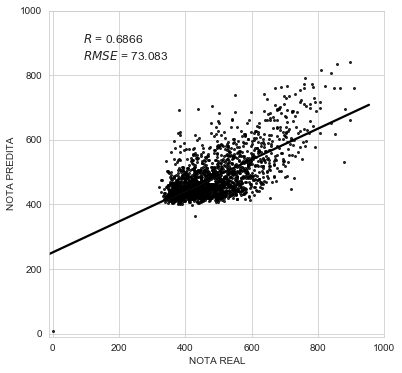

In [159]:
f, ax = plt.subplots(figsize=(6, 6))

usar = pd.DataFrame(data=np.concatenate((y_test, xgb2.predict(dtest).reshape(-1,1)), axis=1),
            columns=['NOTA_REAL', 'NOTA_PREDITA'])

sns.regplot(x='NOTA_REAL', y= 'NOTA_PREDITA', data=usar, color='k', ci=False, scatter_kws={'s': 4},
              ax=ax)

r = usar.corr().NOTA_REAL.NOTA_PREDITA
label = r'$R$ = ' + str(round(r, 4))
ax.annotate(label, xy = (0.1, .9), size = 12, xycoords = ax.transAxes)
rmse = np.sqrt(mean_squared_error(y_test, xgb2.predict(dtest)))
label2 = r'$RMSE$ = ' + str(round(rmse, 3))
ax.annotate(label2, xy = (0.1, .85), size = 12, xycoords = ax.transAxes)


ax.set_xlabel('NOTA REAL')
ax.set_ylabel('NOTA PREDITA')
ax.set_xlim(-10,1000)
ax.set_ylim(-10,1000)

In [161]:
df['xgb2'] = xgb2.predict(xgb.DMatrix(X)) 

Agora, uma segunda forma de fazer um _Tuning hyperparameter_ para o XGB. Desta vez, irei fazer a busca de melhores hiperparâmetros aos pares, variando em torno dos valores dos melhores hiperparametros, até agora. Caso não queira rodar esses códigos, logo após essas etapas estão os valores dos melhores hipermarâmetros já obtidos.

In [163]:
params

{'max_depth': 5,
 'min_child_weight': 5,
 'subsample': 0.9400000000000002,
 'colsample': 0.9400000000000002,
 'eta': 0.005}

In [165]:
#Aqui, iniciamos um gridsearch otimizando apenas dois hiperparâmetros, mantendo os outros estáticos.
#Os outros serão otimizados nas células seguintes.

params = {} #inicializando o dicionário vazio

gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(3,8)
    for min_child_weight in range(2,10)
]

min_rmse = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))    # Atualiza os hiperparâetros
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight    # validação cruzada
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=1500,
        seed=42,
        nfold=3,
        metrics={'rmse'},
        early_stopping_rounds=20
    )    # Atualiza RMSE
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].idxmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (max_depth, min_child_weight)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

CV with max_depth=3, min_child_weight=2
	RMSE 72.57732366666666 for 20 rounds
CV with max_depth=3, min_child_weight=3
	RMSE 72.75859066666668 for 24 rounds
CV with max_depth=3, min_child_weight=4
	RMSE 72.78998566666667 for 24 rounds
CV with max_depth=3, min_child_weight=5
	RMSE 72.90985866666666 for 17 rounds
CV with max_depth=3, min_child_weight=6
	RMSE 73.02907833333333 for 19 rounds
CV with max_depth=3, min_child_weight=7
	RMSE 73.24755833333334 for 16 rounds
CV with max_depth=3, min_child_weight=8
	RMSE 73.248731 for 16 rounds
CV with max_depth=3, min_child_weight=9
	RMSE 73.28533166666666 for 20 rounds
CV with max_depth=4, min_child_weight=2
	RMSE 73.03299966666667 for 20 rounds
CV with max_depth=4, min_child_weight=3
	RMSE 72.917506 for 18 rounds
CV with max_depth=4, min_child_weight=4
	RMSE 73.05610133333334 for 18 rounds
CV with max_depth=4, min_child_weight=5
	RMSE 73.27610233333333 for 13 rounds
CV with max_depth=4, min_child_weight=6
	RMSE 73.466169 for 15 rounds
CV with ma

In [166]:
params['max_depth'] = best_params[0]
params['min_child_weight'] = best_params[1]

In [167]:
params

{'max_depth': 3, 'min_child_weight': 2}

In [168]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in np.arange(.7,1.01,.02)
    for colsample in np.arange(.7,1.01,.02)
]


min_rmse = float("Inf")
best_params = None# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=1500,
        seed=42,
        nfold=3,
        metrics={'rmse'},
        early_stopping_rounds=20
    )    # Update best score
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].idxmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (subsample,colsample)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

CV with subsample=1.0000000000000002, colsample=1.0000000000000002
	RMSE 72.57732366666666 for 20 rounds
CV with subsample=1.0000000000000002, colsample=0.9800000000000002
	RMSE 72.484375 for 17 rounds
CV with subsample=1.0000000000000002, colsample=0.9600000000000002
	RMSE 72.51289100000001 for 18 rounds
CV with subsample=1.0000000000000002, colsample=0.9400000000000002
	RMSE 72.51289100000001 for 18 rounds
CV with subsample=1.0000000000000002, colsample=0.9200000000000002
	RMSE 72.48182666666668 for 22 rounds
CV with subsample=1.0000000000000002, colsample=0.9000000000000001
	RMSE 72.48182666666668 for 22 rounds
CV with subsample=1.0000000000000002, colsample=0.8800000000000001
	RMSE 72.51757833333333 for 18 rounds
CV with subsample=1.0000000000000002, colsample=0.8600000000000001
	RMSE 72.59208166666666 for 22 rounds
CV with subsample=1.0000000000000002, colsample=0.8400000000000001
	RMSE 72.59208166666666 for 22 rounds
CV with subsample=1.0000000000000002, colsample=0.8200000000000

	RMSE 72.50701666666667 for 23 rounds
CV with subsample=0.9000000000000001, colsample=0.9200000000000002
	RMSE 72.52184033333333 for 18 rounds
CV with subsample=0.9000000000000001, colsample=0.9000000000000001
	RMSE 72.521838 for 18 rounds
CV with subsample=0.9000000000000001, colsample=0.8800000000000001
	RMSE 72.490845 for 25 rounds
CV with subsample=0.9000000000000001, colsample=0.8600000000000001
	RMSE 72.506579 for 27 rounds
CV with subsample=0.9000000000000001, colsample=0.8400000000000001
	RMSE 72.506579 for 27 rounds
CV with subsample=0.9000000000000001, colsample=0.8200000000000001
	RMSE 72.533732 for 18 rounds
CV with subsample=0.9000000000000001, colsample=0.8
	RMSE 72.533732 for 18 rounds
CV with subsample=0.9000000000000001, colsample=0.78
	RMSE 72.58027933333334 for 22 rounds
CV with subsample=0.9000000000000001, colsample=0.76
	RMSE 72.58028166666666 for 22 rounds
CV with subsample=0.9000000000000001, colsample=0.74
	RMSE 72.55480933333332 for 26 rounds
CV with subsample

	RMSE 72.576645 for 22 rounds
CV with subsample=0.8, colsample=0.78
	RMSE 72.525772 for 16 rounds
CV with subsample=0.8, colsample=0.76
	RMSE 72.52577433333333 for 16 rounds
CV with subsample=0.8, colsample=0.74
	RMSE 72.61154900000001 for 16 rounds
CV with subsample=0.8, colsample=0.72
	RMSE 72.61107633333334 for 18 rounds
CV with subsample=0.8, colsample=0.7
	RMSE 72.61107633333334 for 18 rounds
CV with subsample=0.78, colsample=1.0000000000000002
	RMSE 72.915141 for 18 rounds
CV with subsample=0.78, colsample=0.9800000000000002
	RMSE 72.75497666666666 for 16 rounds
CV with subsample=0.78, colsample=0.9600000000000002
	RMSE 72.7161 for 16 rounds
CV with subsample=0.78, colsample=0.9400000000000002
	RMSE 72.7161 for 16 rounds
CV with subsample=0.78, colsample=0.9200000000000002
	RMSE 72.46752933333333 for 18 rounds
CV with subsample=0.78, colsample=0.9000000000000001
	RMSE 72.46752933333333 for 18 rounds
CV with subsample=0.78, colsample=0.8800000000000001
	RMSE 72.59514600000001 for 

In [169]:
params['subsample'] = best_params[0]
params['colsample_bytree'] = best_params[1]

In [170]:
params

{'max_depth': 3,
 'min_child_weight': 2,
 'subsample': 0.74,
 'colsample_bytree': 0.8800000000000001}

In [171]:
%time #This can take some time…

min_rmse = float("Inf")
best_params = None 
for eta in [.3, .2, .1, .05, .01, .005, 0.003, 0.002]:
    print("CV with eta={}".format(eta))   
    
    # We update our parameters
    params['eta'] = eta    
    
    # Run and time CV
    %time cv_results = xgb.cv(params, dtrain, num_boost_round=1500,\
    seed=42,nfold=3, metrics=['rmse'], early_stopping_rounds=10)    
 
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].idxmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))

    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = eta
print("Best params: {}, RMSE: {}".format(best_params, min_rmse))

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.34 µs
CV with eta=0.3
CPU times: user 1.31 s, sys: 35.8 ms, total: 1.35 s
Wall time: 386 ms
	RMSE 72.344233 for 16 rounds
CV with eta=0.2
CPU times: user 2.09 s, sys: 39.7 ms, total: 2.13 s
Wall time: 557 ms
	RMSE 72.376429 for 35 rounds
CV with eta=0.1
CPU times: user 3.2 s, sys: 47.9 ms, total: 3.25 s
Wall time: 833 ms
	RMSE 72.18734766666667 for 67 rounds
CV with eta=0.05
CPU times: user 5.52 s, sys: 66.1 ms, total: 5.59 s
Wall time: 1.43 s
	RMSE 72.13435366666666 for 127 rounds
CV with eta=0.01
CPU times: user 26.3 s, sys: 301 ms, total: 26.6 s
Wall time: 6.77 s
	RMSE 72.07717633333334 for 679 rounds
CV with eta=0.005
CPU times: user 50.8 s, sys: 928 ms, total: 51.7 s
Wall time: 13.5 s
	RMSE 72.09963233333333 for 1257 rounds
CV with eta=0.003
CPU times: user 56.9 s, sys: 736 ms, total: 57.6 s
Wall time: 14.6 s
	RMSE 72.407023 for 1499 rounds
CV with eta=0.002
CPU times: user 56.6 s, sys: 669 ms, total: 57.3 s
Wall time: 14.5

Aqui, é possível ver que o valor do `RMSE` para a validação `(72.077)` foi menor que no primeiro método `(72.3092)`. Além disso, buscando os hiperparâmetros par-a-par reduz-se em muito o custo computacional. Ou seja, neste caso aqui foi um "ganha-ganha". Óbvio que, como tudo em Ciência de Dados, não quer dizer que isso ocorrerá para outros problemas e outros datasets!

In [172]:
params['eta'] = best_params

In [173]:
params

{'max_depth': 3,
 'min_child_weight': 2,
 'subsample': 0.74,
 'colsample_bytree': 0.8800000000000001,
 'eta': 0.01}

In [174]:
#Melhores hiperparâmetro para a segunda metodologia:

'''params = {'max_depth': 3,
 'min_child_weight': 2,
 'subsample': 0.74,
 'colsample_bytree': 0.8800000000000001,
 'eta': 0.01}'''

"params = {'max_depth': 3,\n 'min_child_weight': 2,\n 'subsample': 0.74,\n 'colsample_bytree': 0.8800000000000001,\n 'eta': 0.01}"

In [175]:
xgb3 = xgb.train(params= params, dtrain= dtrain, num_boost_round=1500, evals=[(dtest, "Test")],
    early_stopping_rounds=20
)

[0]	Test-rmse:487.586
Will train until Test-rmse hasn't improved in 20 rounds.
[1]	Test-rmse:482.823
[2]	Test-rmse:478.111
[3]	Test-rmse:473.451
[4]	Test-rmse:468.843
[5]	Test-rmse:464.301
[6]	Test-rmse:459.786
[7]	Test-rmse:455.326
[8]	Test-rmse:450.921
[9]	Test-rmse:446.542
[10]	Test-rmse:442.207
[11]	Test-rmse:437.923
[12]	Test-rmse:433.677
[13]	Test-rmse:429.474
[14]	Test-rmse:425.307
[15]	Test-rmse:421.183
[16]	Test-rmse:417.107
[17]	Test-rmse:413.071
[18]	Test-rmse:409.086
[19]	Test-rmse:405.132
[20]	Test-rmse:401.224
[21]	Test-rmse:397.359
[22]	Test-rmse:393.538
[23]	Test-rmse:389.752
[24]	Test-rmse:385.996
[25]	Test-rmse:382.283
[26]	Test-rmse:378.606
[27]	Test-rmse:374.973
[28]	Test-rmse:371.382
[29]	Test-rmse:367.832
[30]	Test-rmse:364.308
[31]	Test-rmse:360.82
[32]	Test-rmse:357.375
[33]	Test-rmse:353.955
[34]	Test-rmse:350.563
[35]	Test-rmse:347.237
[36]	Test-rmse:343.93
[37]	Test-rmse:340.655
[38]	Test-rmse:337.416
[39]	Test-rmse:334.213
[40]	Test-rmse:331.032
[41]	Test-rm

[345]	Test-rmse:74.6602
[346]	Test-rmse:74.6298
[347]	Test-rmse:74.5963
[348]	Test-rmse:74.5653
[349]	Test-rmse:74.5335
[350]	Test-rmse:74.5039
[351]	Test-rmse:74.4786
[352]	Test-rmse:74.4468
[353]	Test-rmse:74.4188
[354]	Test-rmse:74.3912
[355]	Test-rmse:74.365
[356]	Test-rmse:74.3437
[357]	Test-rmse:74.317
[358]	Test-rmse:74.2907
[359]	Test-rmse:74.2661
[360]	Test-rmse:74.2451
[361]	Test-rmse:74.2252
[362]	Test-rmse:74.2035
[363]	Test-rmse:74.1815
[364]	Test-rmse:74.1639
[365]	Test-rmse:74.1392
[366]	Test-rmse:74.1175
[367]	Test-rmse:74.0947
[368]	Test-rmse:74.0753
[369]	Test-rmse:74.0579
[370]	Test-rmse:74.0357
[371]	Test-rmse:74.0175
[372]	Test-rmse:73.9972
[373]	Test-rmse:73.9765
[374]	Test-rmse:73.9535
[375]	Test-rmse:73.9365
[376]	Test-rmse:73.9165
[377]	Test-rmse:73.8999
[378]	Test-rmse:73.8832
[379]	Test-rmse:73.8651
[380]	Test-rmse:73.85
[381]	Test-rmse:73.8302
[382]	Test-rmse:73.8136
[383]	Test-rmse:73.7991
[384]	Test-rmse:73.7812
[385]	Test-rmse:73.7661
[386]	Test-rmse:73.7

[688]	Test-rmse:72.9131
[689]	Test-rmse:72.9098
[690]	Test-rmse:72.9094
[691]	Test-rmse:72.9096
[692]	Test-rmse:72.9095
[693]	Test-rmse:72.9079
[694]	Test-rmse:72.9082
[695]	Test-rmse:72.9074
[696]	Test-rmse:72.9062
[697]	Test-rmse:72.9082
[698]	Test-rmse:72.9082
[699]	Test-rmse:72.9093
[700]	Test-rmse:72.91
[701]	Test-rmse:72.9097
[702]	Test-rmse:72.9091
[703]	Test-rmse:72.9086
[704]	Test-rmse:72.9081
[705]	Test-rmse:72.9075
[706]	Test-rmse:72.9066
[707]	Test-rmse:72.9076
[708]	Test-rmse:72.9073
[709]	Test-rmse:72.9076
[710]	Test-rmse:72.9054
[711]	Test-rmse:72.9036
[712]	Test-rmse:72.9062
[713]	Test-rmse:72.908
[714]	Test-rmse:72.9042
[715]	Test-rmse:72.9027
[716]	Test-rmse:72.9026
[717]	Test-rmse:72.9006
[718]	Test-rmse:72.8994
[719]	Test-rmse:72.8998
[720]	Test-rmse:72.8977
[721]	Test-rmse:72.8986
[722]	Test-rmse:72.8978
[723]	Test-rmse:72.8976
[724]	Test-rmse:72.8978
[725]	Test-rmse:72.9005
[726]	Test-rmse:72.9013
[727]	Test-rmse:72.9011
[728]	Test-rmse:72.9026
[729]	Test-rmse:72.

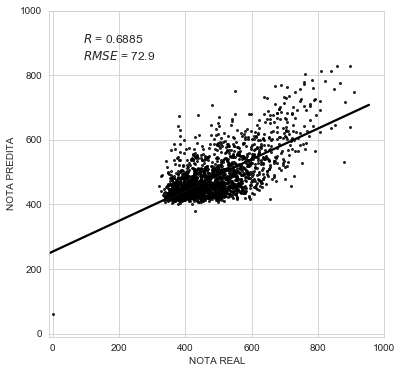

In [178]:
f, ax = plt.subplots(figsize=(6, 6))

usar = pd.DataFrame(data=np.concatenate((y_test, xgb3.predict(dtest).reshape(-1,1)), axis=1),
            columns=['NOTA_REAL', 'NOTA_PREDITA'])

sns.regplot(x='NOTA_REAL', y= 'NOTA_PREDITA', data=usar, color='k', ci=False, scatter_kws={'s': 4},
              ax=ax)

r = usar.corr().NOTA_REAL.NOTA_PREDITA
label = r'$R$ = ' + str(round(r, 4))
ax.annotate(label, xy = (0.1, .9), size = 12, xycoords = ax.transAxes)
rmse = np.sqrt(mean_squared_error(y_test, xgb3.predict(dtest)))
label2 = r'$RMSE$ = ' + str(round(rmse, 3))
ax.annotate(label2, xy = (0.1, .85), size = 12, xycoords = ax.transAxes)


ax.set_xlabel('NOTA REAL')
ax.set_ylabel('NOTA PREDITA')
ax.set_xlim(-10,1000)
ax.set_ylim(-10,1000)

In [180]:
df['xgb3'] = xgb3.predict(xgb.DMatrix(X))

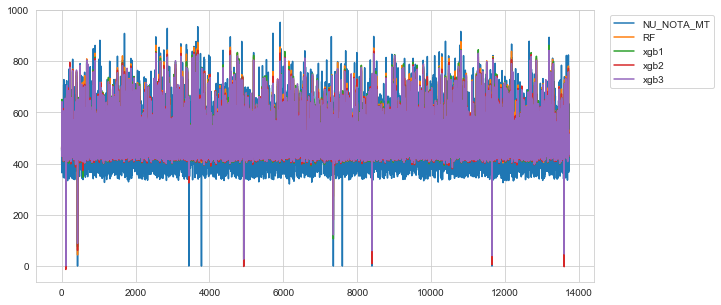

In [420]:
f, ax = plt.subplots(figsize=(10,5))

df.iloc[::, -5:].plot(kind='line', ax=f.gca())
plt.legend(bbox_to_anchor=(1.02, 1.0))
plt.savefig('imagens/todos.png');

 __Para pensar um pouco__: <code style="background:yellow;color:black">Você saberia dizer por que os valores ajustados para todos os modelos são maiores que 400? (superestimação)</code>

In [398]:
#dataframe com real vs preditos

usar2 = pd.DataFrame(
    data=np.concatenate(
                        (y_test,  
                         best.predict(X_test).reshape(-1,1), 
                         xgb1.predict(dtest).reshape(-1,1), 
                         xgb2.predict(dtest).reshape(-1,1), 
                         xgb3.predict(dtest).reshape(-1,1)), axis=1),
                        columns=['NOTA_REAL', 'RF', 'XGB1', 'XGB2','XGB3'])

In [418]:
print("Quantidade de observações menores que 400")
print(usar2.loc[usar2.NOTA_REAL < 400].shape[0], '\n')
print("Quantidade de ajustes por RF menores que 400")
print(usar2.loc[usar2.RF < 400].shape[0], '\n')
print("Quantidade de ajustes pelo XGB1 menores que 400")
print(usar2.loc[usar2.XGB1 < 400].shape[0], '\n')
print("Quantidade de ajustes pelo XGB2 menores que 400")
print(usar2.loc[usar2.XGB2 < 400].shape[0], '\n')
print("Quantidade de ajustes pelo XGB3 menores que 400")
print(usar2.loc[usar2.XGB3 < 400].shape[0], '\n')

Quantidade de observações menores que 400
434 

Quantidade de ajustes por RF menores que 400
2 

Quantidade de ajustes pelo XGB1 menores que 400
4 

Quantidade de ajustes pelo XGB2 menores que 400
3 

Quantidade de ajustes pelo XGB3 menores que 400
2 



In [365]:
corr = list(usar2.corr().values[:1,1:][0])

In [366]:
rmse = []
for a in usar2.columns[1:]:
    rmse.append(np.sqrt(mean_squared_error(usar2.NOTA_REAL.values.reshape(-1,1),usar2[a].values.reshape(-1,1))))

In [374]:
final = pd.DataFrame(index=['Correlacao', 'RMSE'], data=[corr, rmse], columns=usar2.drop('NOTA_REAL', axis=1).columns).round(3)
final

,RF,XGB1,XGB2,XGB3
Correlacao,0.682,0.686,0.687,0.689
RMSE,73.491,73.129,73.083,72.900


In [391]:
print('O RMSE para o RF é {} e para o terceiro modelo do XGB foi de {}, correspondendo a uma reduçao de {}%'.format(
final.loc['RMSE', 'RF'], final.loc['RMSE', 'XGB3'], 
round((final.loc['RMSE', 'RF'] - final.loc['RMSE', 'XGB3'])*100/final.loc['RMSE', 'RF'],2)))

O RMSE para o RF é 73.491 e para o terceiro modelo do XGB foi de 72.9, correspondendo a uma reduçao de 0.8%


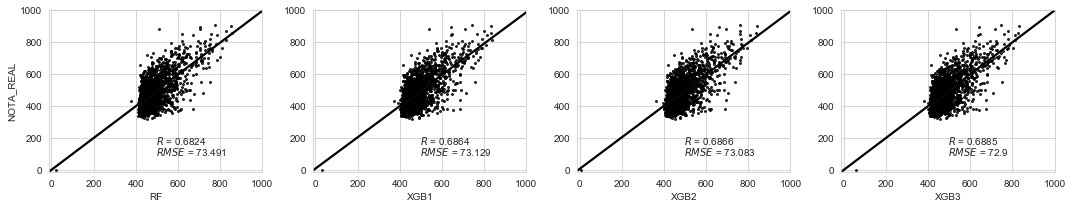

In [362]:
sns.set_style('whitegrid')
f, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 3))
for ax, col in zip(axes, usar2.columns[1:]):
    f.subplots_adjust(wspace = .2)
    r = usar2.corr()[col]['NOTA_REAL']
    label = r'$R$ = ' + str(round(r, 4))
    ax.annotate(label, xy = (0.5, .17), size = 10, xycoords = ax.transAxes)
    rmse = np.sqrt(mean_squared_error(usar2.NOTA_REAL, usar2[col]))
    label2 = r'$RMSE$ = ' + str(round(rmse, 3))
    ax.annotate(label2, xy = (0.5, .1), size = 10, xycoords = ax.transAxes)
    ax.set_xlim(-10,1000)
    ax.set_ylim(-10,1000)
    sns.regplot(x= col, y= 'NOTA_REAL', data=usar2, color='k', ci=False, scatter_kws={'s': 4},
              ax=ax)
    
    if ax != axes[0]:
        ax.set_ylabel(None)

f.tight_layout()
f.savefig('imagens/todas.png')

# Modelo escolhido XGB3

aplicar modelo em todo o dado de treino:

In [392]:
params = {'max_depth': 3,
 'min_child_weight': 2,
 'subsample': 0.74,
 'colsample_bytree': 0.88,
 'eta': 0.01}

In [393]:
#Treinando o XGB em todo o conjunto de dados de treino

regressor = xgb.XGBRegressor(**params, 
                             num_boost_round=1500, 
                             early_stopping_rounds=30,
                            )

regressor.fit(X,y=y)

[23:11:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.88, early_stopping_rounds=30, eta=0.01,
             min_child_weight=2, num_boost_round=1500, subsample=0.74)

### Salvar em arquivo answer.csv com duas colunas: 
`NU_INSCRICAO` e `NU_NOTA_MT`.


In [429]:
NU_INSCRICO = test.NU_INSCRICAO.values 
test.drop(['NU_INSCRICAO', 'NU_NOTA_MT'], axis=1, inplace=True)

In [432]:
X_test = test.values

In [435]:
#predição das notas de matemática no dado de teste
y_predito = regressor.predict(X_test)

In [448]:
test['NU_NOTA_MT'] = np.round(y_predito, decimals=2)

In [449]:
test.NU_NOTA_MT.describe()

count    3377.000000
mean      481.690308
std        69.434875
min        15.770000
25%       435.880005
50%       459.720001
75%       504.269989
max       878.890015
Name: NU_NOTA_MT, dtype: float64

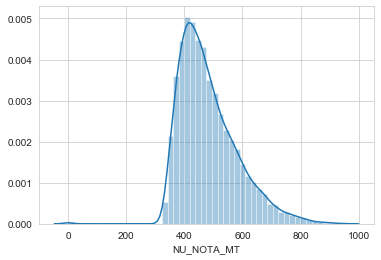

In [441]:
#Distribuição das notas de matemática no treino
sns.distplot(df.NU_NOTA_MT);

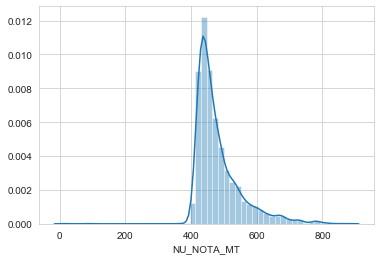

In [450]:
#Distribuição das notas de matemática no teste
sns.distplot(test.NU_NOTA_MT);

In [451]:
test['NU_INSCRICAO'] = NU_INSCRICO

In [452]:
test[['NU_INSCRICAO', 'NU_NOTA_MT']].to_csv('answer.csv', sep = ';', decimal = '.',
                                             index = False, header = True)

## Referências:

* [How to solve mismatch in train and test set after categorical encoding?](https://medium.com/@vaibhavshukla182/how-to-solve-mismatch-in-train-and-test-set-after-categorical-encoding-8320ed03552f)

* [XGBoost with one hot encoding](https://www.kaggle.com/ankitkuls/xgboost-with-one-hot-encoding)

* [Complete Guide to Parameter Tuning in XGBoost with codes in Python](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/)